# Multi label prediction with Neural Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the CSV

In [ ]:
#csv_file = 'train.csv'
csv_file = 'smiles_descriptors_processed_minmax.csv' # import this file to the local folder, from the datasets folder
df = pd.read_csv(csv_file)

## Work the data

### List all the odors

In [ ]:
all_classes = df['SENTENCE'].str.split(',').sum()
unique_classes_series = pd.Series(np.unique(all_classes))
unique_classes_series

0        alcoholic
1        aldehydic
2       alliaceous
3           almond
4        ambergris
          ...     
104         watery
105           waxy
106    whiteflower
107           wine
108          woody
Length: 109, dtype: object

We have **109** different odors. We will keep this order for the one hot encoding.

## Find an input

### Descriptors

List all the smiles:

In [ ]:
all_smiles = df['SMILES']
unique_smiles_series = pd.Series(np.unique(all_smiles))
unique_smiles_series

0                                *OCOC
1                      Br/C=C/c1ccccc1
2                  C#CC(C)(CCC=C(C)C)O
3       C#CC(CC/C=C(/CCC=C(C)C)\C)(O)C
4                  C#CC(CCC=C(C)C)(O)C
                     ...              
4311                    c1ccc2cnccc2c1
4312                      c1ccnc(c1)CS
4313                      c1cnc(cn1)CS
4314                       c1cnc(nc1)S
4315                          c1cnccn1
Length: 4316, dtype: object

In [ ]:
longest_element = max(unique_smiles_series, key=len)
longest_element

'CCNC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](NC(=O)[C@H](Cc1ccc(cc1)O)NC(=O)[C@@H](NC(=O)[C@H](Cc1c[nH]c2c1cccc2)NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)[C@@H]1CCC(=O)N1)CO)COC(C)(C)C)CC(C)C)CCCN=C(N)N'

We see that the longest element is very long and would take many bits to encode it. Plus, we can never know how long the input will be, so we can't use them. We have to look for other input values. These will be the descriptors.

The input will be the descriptors

In [ ]:
inputSize = df.shape[1]-2 #-2 because the first 2 columns are the SMILES and expected output
df.shape

(4316, 191)

## Define the output

We do a one hot encoding, as mentioned in the beginning. Each output represent an odor. 1 if present and 0 if not present.

In [ ]:
unique_classes_series

0        alcoholic
1        aldehydic
2       alliaceous
3           almond
4        ambergris
          ...     
104         watery
105           waxy
106    whiteflower
107           wine
108          woody
Length: 109, dtype: object

In [ ]:
def one_hot_encoding_scents(scents, base=unique_classes_series):
  scents_encoding = [0 for _ in range(base.size)]
  scents_list = scents.split(",")
  for scent in scents_list:
    try:
      indice = np.where(unique_classes_series == scent)[0][0]
      scents_encoding[indice] = 1
    except IndexError: # case when scent not in the list
      raise BaseException("The scents are not inputted correctly, or one of the scents doesn't exist!")

  return np.array(scents_encoding)

test_one_hot_encoding_output = one_hot_encoding_scents("alcoholic,alliaceous,wine")
print(test_one_hot_encoding_output)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


Transform a one hot encoded output to a list of odors:

In [ ]:
def output_to_scent(output, base=unique_classes_series):
  resp = []
  for i in range(len(output)):
    if output[i] == 1:
      resp.append(unique_classes_series[i])

  return resp

output_to_scent(test_one_hot_encoding_output)

['alcoholic', 'alliaceous', 'wine']

## Build the models

With Tensor Flow

Build multiple models

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
models = []

We try out different neural networks, with different hidden layer numbers and sizes and we compare the results.

For each model, the input layer is the descriptors and the output layer is the one hot encoded probabulity list for each scent.

Model 1

In [ ]:
# Model architecture
model1 = Sequential()
model1.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model1)

Model 2

In [ ]:
model2 = Sequential()
model2.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model2)

Model 3

In [ ]:
model3 = Sequential()
model3.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model3)

Model 4

In [ ]:
model4 = Sequential()
model4.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model4)

Model 5

In [ ]:
model5 = Sequential()
model5.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model5)

Model 6

In [ ]:
model6 = Sequential()
model6.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model6)

Model 7

In [ ]:
model7 = Sequential()
model7.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model7)

Model 8

In [ ]:
model8 = Sequential()
model8.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model8.add(Dense(64, activation='relu'))
model8.add(Dense(64, activation='relu'))
model8.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model8)

Model 9

In [ ]:
model9 = Sequential()
model9.add(Dense(inputSize, input_dim=inputSize, activation='relu'))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(128, activation='relu'))
model9.add(Dense(len(unique_classes_series), activation='sigmoid'))  # Output layer

models.append(model9)

## Train the models

### Divide the dataset into train and test subsets

In [ ]:
train_size = 0.9
test_size = 0.1

In [ ]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
outputSize = unique_classes_series.size
all_inputs = matrix_empty = np.empty((df.shape[0], inputSize+1), dtype=object) # each line is an input, contains smiles as well
outputs = matrix_empty = np.empty((df.shape[0], outputSize))
input_smiles = np.empty((df.shape[0], 1), dtype=object)
#print(input_smiles)

for i in range(df.shape[0]): # iterate thougt the size of the input layer, and train for each different input value
  input = df.iloc[i, np.r_[0, 2:df.shape[1]]] # input values
  target = one_hot_encoding_scents(df["SENTENCE"][i], base=unique_classes_series) # expected output for the input value
  all_inputs[i] = input
  outputs[i] = target
  input_smiles[i] = df["SMILES"][i]

In [ ]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

# Split the data into train and test sets
#train_df, test_df = train_test_split(df, test_size=test_size, stratify=unique_classes_series)
all_training_inputs, training_outputs, all_test_inputs, test_outputs = iterative_train_test_split(all_inputs, outputs, test_size = test_size)

training_inputs = tf.convert_to_tensor(all_training_inputs[:, 1:], dtype=tf.float32) # contain only the training input
test_inputs = tf.convert_to_tensor(all_test_inputs[:, 1:], dtype=tf.float32) # contain only the test input
training_smiles = all_training_inputs[:, 0] # contain only the training smiles
test_smiles = all_test_inputs[:, 0] # contain only the test smiles

### Train the models

#### Initialize the sizes and the learning rate

In [ ]:
inputSize = inputSize
outputSize = unique_classes_series.size
learning_rate = 0.1

#### Define the loss function

We are using the focal loss function. This is an advanced version of the Binary Cross-Entropy Loss. It is useful for handling class imbalance by reducing the loss contribution from easy examples and increasing the importance of correcting misclassified examples.

In [ ]:
import tensorflow as tf
import keras.backend as K

def FocalLoss(y_true, y_pred):

    alpha = 0.8
    gamma = 2

    # cast to float32 datatype
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    inputs = K.flatten(y_pred)
    targets = K.flatten(y_true)

    BCE = K.binary_crossentropy(targets, inputs)
    BCE_EXP = K.exp(-BCE)
    focal_loss = K.mean(alpha * K.pow((1-BCE_EXP), gamma) * BCE)

    return focal_loss

# source: https://github.com/Mr-TalhaIlyas/Loss-Functions-Package-Tensorflow-Keras-PyTorch


### Instantiate the neural network

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

for model in models:
  #model = SimpleNN(inputSize, hiddenSize, outputSize)
  # Compile model
  #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])
  # try jaccard score as loss function
  #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Recall(), Precision(), CategoricalAccuracy()])
  #model.compile(loss=jaccard_loss, optimizer='adam', metrics=[Recall(), Precision(), CategoricalAccuracy()])
  model.compile(loss=FocalLoss, optimizer='adam', metrics=[Recall(), Precision(), CategoricalAccuracy()])
  # try penalizing labels that should be 1, but are predicted 0. Make the error bigger for those labels (rewrite the binary crossentropy)

#### Select the maximum number of iteractions

In [ ]:
epochs = 50

#### Set up the convergence treshold (not used)

In [ ]:
convergence = 0

#### Compute the weights for each class from the training set (not used)

In [ ]:
def compute_class_weights_2d(labels_2d):
    # Count the number of instances for each class
    class_counts = np.sum(labels_2d, axis=0)

    # Avoid division by zero in case some class has zero instances
    class_counts[class_counts == 0] = 1

    # Compute class weights (inverse frequency)
    weights = 1. / class_counts

    # Normalize weights so that they sum to the number of classes
    weights = weights / np.sum(weights) * len(class_counts)

    weights = dict(enumerate(weights))

    return weights

class_weight_dict = compute_class_weights_2d(training_outputs)
class_weight_dict

{0: 2.1776138108926384,
 1: 0.4126005115375525,
 2: 0.46663153090556536,
 3: 0.6758111826908189,
 4: 2.1776138108926384,
 5: 0.5850305760607089,
 6: 5.599578370866784,
 7: 5.599578370866784,
 8: 0.4126005115375525,
 9: 0.9560255755138413,
 10: 0.33790559134540943,
 11: 0.16469348149608187,
 12: 0.9332630618111307,
 13: 0.28821359261814333,
 14: 0.8908420135469884,
 15: 7.839409719213498,
 16: 1.1528543704725733,
 17: 2.613136573071166,
 18: 0.3563368054187953,
 19: 0.8710455243570554,
 20: 0.5850305760607089,
 21: 0.2630674402420637,
 22: 0.3733052247244523,
 23: 1.306568286535583,
 24: 0.8166051790847393,
 25: 0.3919704859606749,
 26: 1.3516223653816377,
 27: 0.9115592696759882,
 28: 0.20849493934078453,
 29: 0.6322104612268951,
 30: 1.399894592716696,
 31: 0.9799262149016873,
 32: 0.7126736108375906,
 33: 3.5633680541879538,
 34: 0.8710455243570554,
 35: 0.8521097520884238,
 36: 0.699947296358348,
 37: 2.3057087409451467,
 38: 0.5599578370866785,
 39: 0.3919704859606749,
 40: 0.18754

#### Train the models

In [ ]:
c = 0
histories = []
for model in models:
  c+=1
  print("Model",c)
  # Train model
  history = model.fit(training_inputs, training_outputs, epochs=epochs, batch_size=32, validation_split=0.15)
  #history =  model.fit(training_inputs, training_outputs, epochs=epochs, batch_size=32, validation_split=0.15, class_weight=class_weight_dict)

  histories.append(history)

  print("")
  print("")

Model 1
Epoch 1/50
102/102 [==============================] - 13s 25ms/step - loss: 0.0343 - recall: 0.0175 - precision: 0.0313 - categorical_accuracy: 0.0553 - val_loss: 0.0255 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_categorical_accuracy: 0.0730
Epoch 2/50
102/102 [==============================] - 1s 9ms/step - loss: 0.0244 - recall: 0.0036 - precision: 0.4861 - categorical_accuracy: 0.0768 - val_loss: 0.0241 - val_recall: 0.0040 - val_precision: 0.3333 - val_categorical_accuracy: 0.0835
Epoch 3/50
102/102 [==============================] - 1s 8ms/step - loss: 0.0230 - recall: 0.0143 - precision: 0.4660 - categorical_accuracy: 0.0940 - val_loss: 0.0232 - val_recall: 0.0058 - val_precision: 0.3704 - val_categorical_accuracy: 0.0783
Epoch 4/50
102/102 [==============================] - 1s 8ms/step - loss: 0.0220 - recall: 0.0204 - precision: 0.4527 - categorical_accuracy: 0.0979 - val_loss: 0.0227 - val_recall: 0.0110 - val_precision: 0.3455 - val_categorical_accurac

#### Visualize the metrics

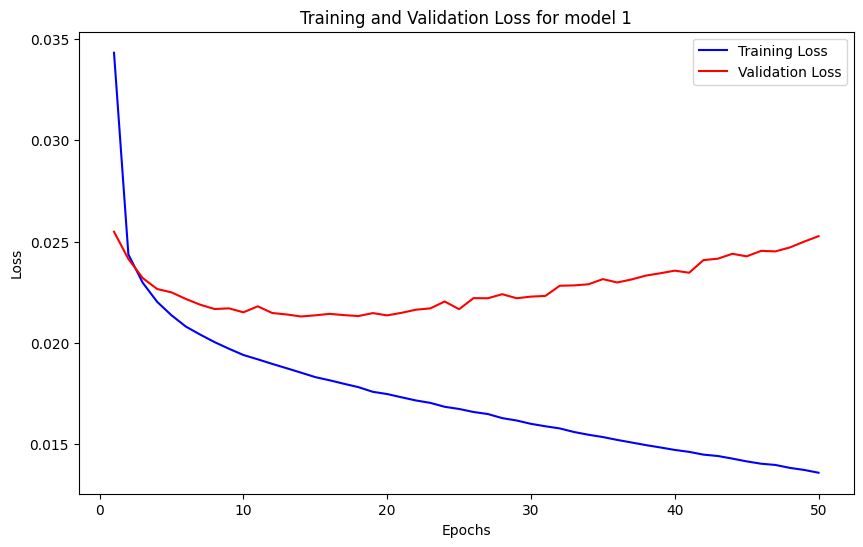

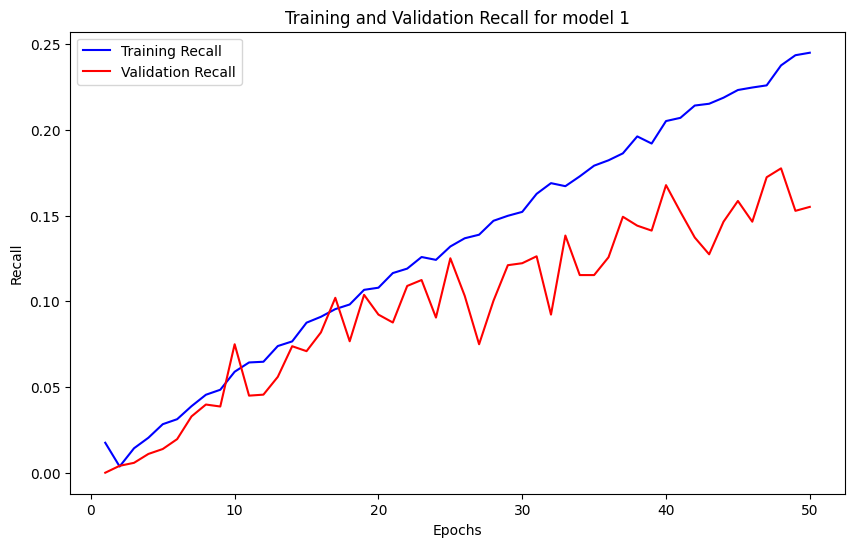

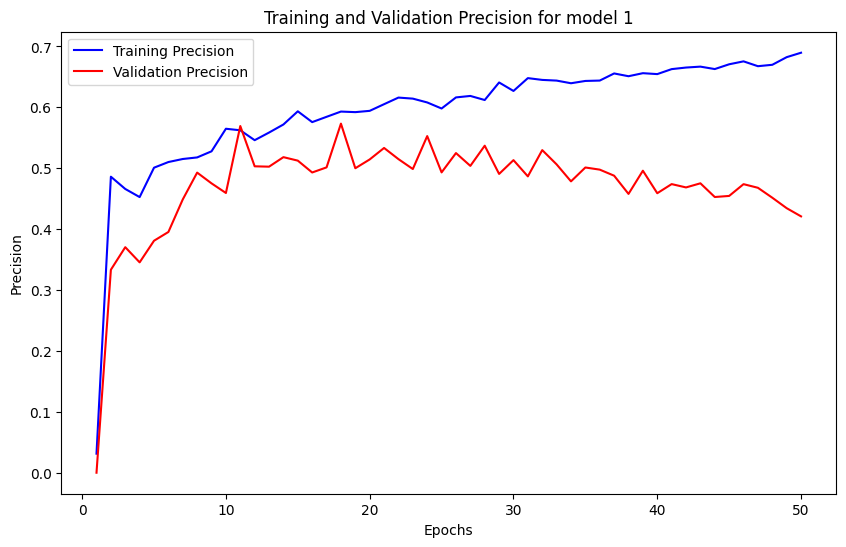

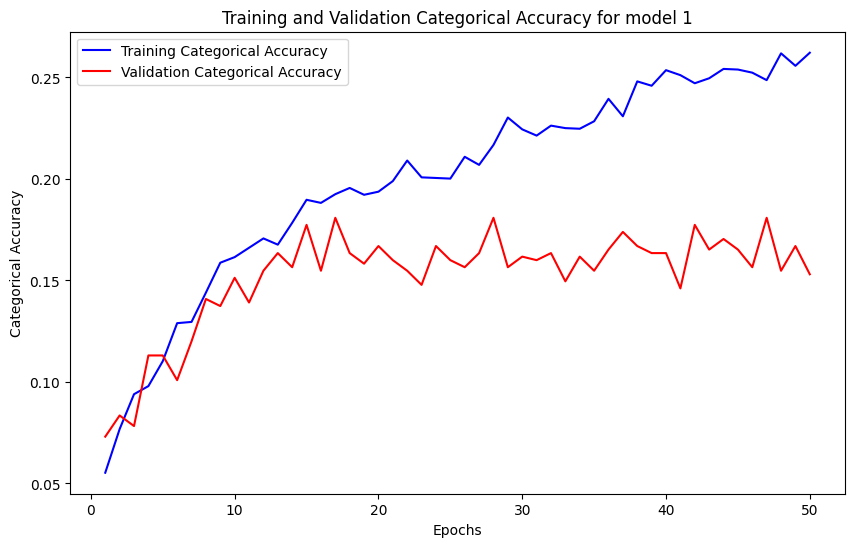

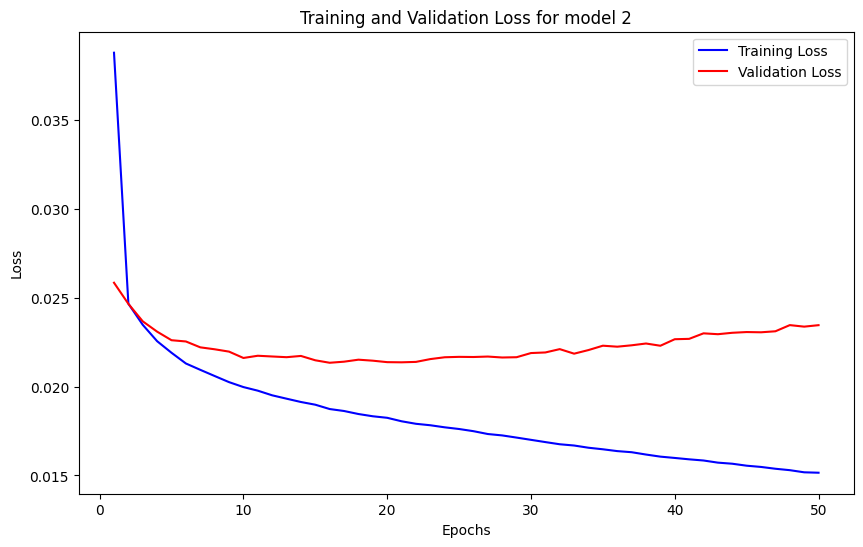

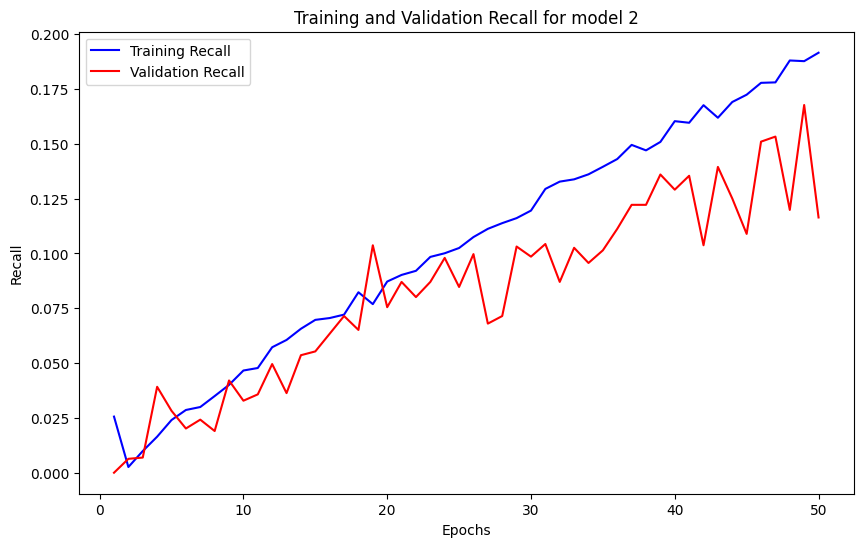

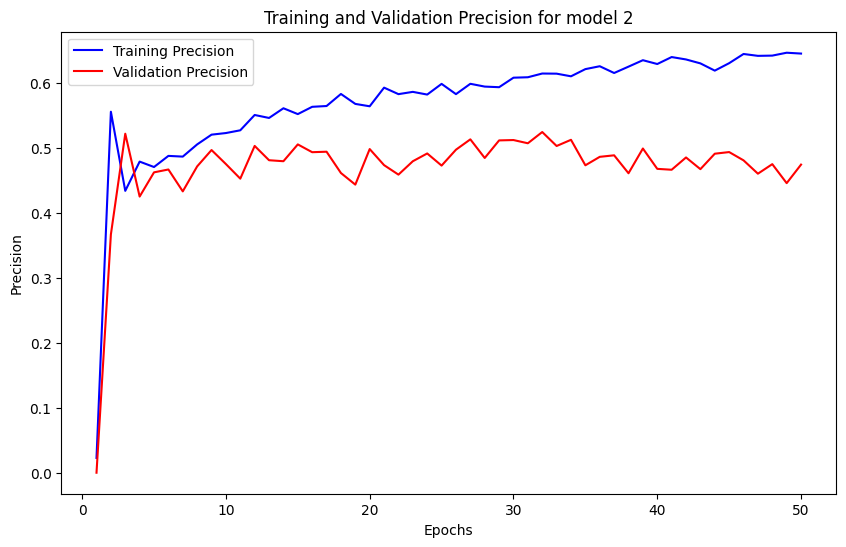

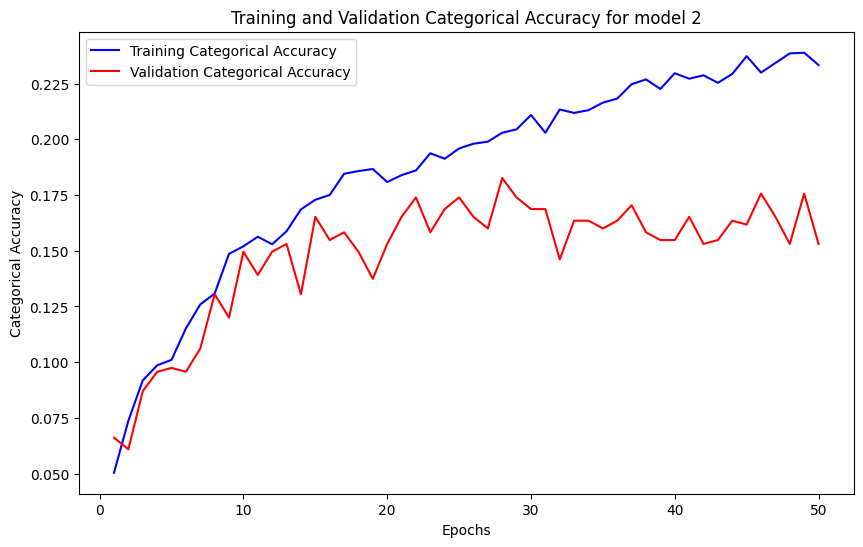

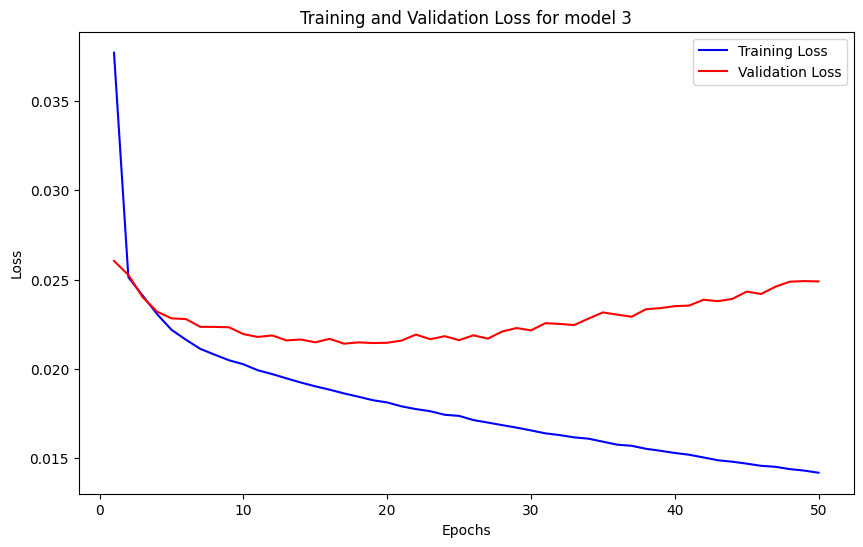

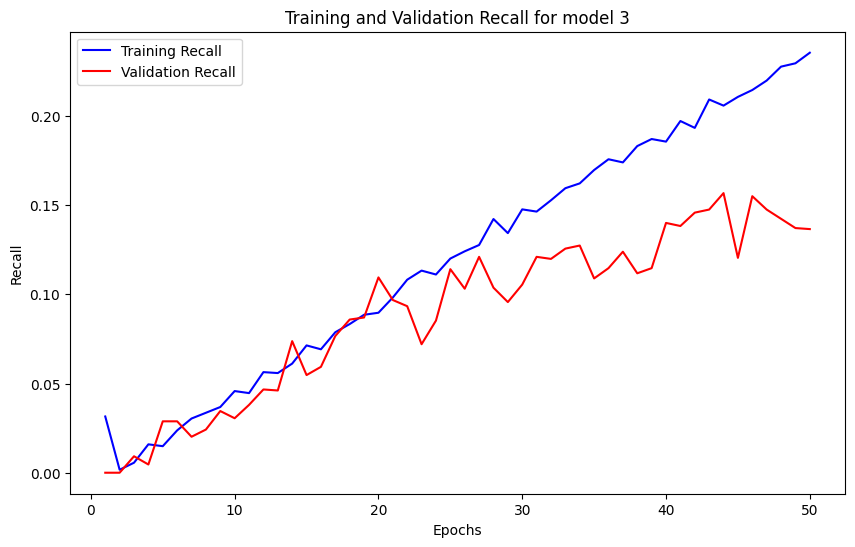

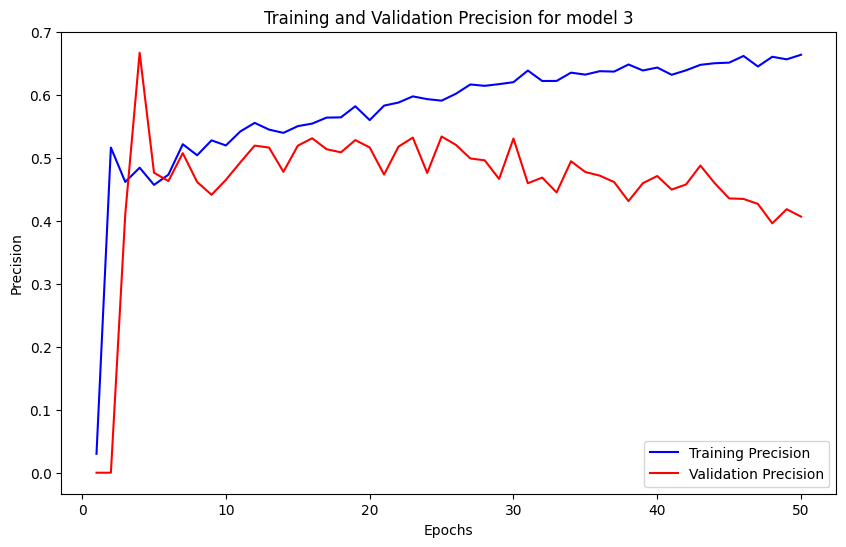

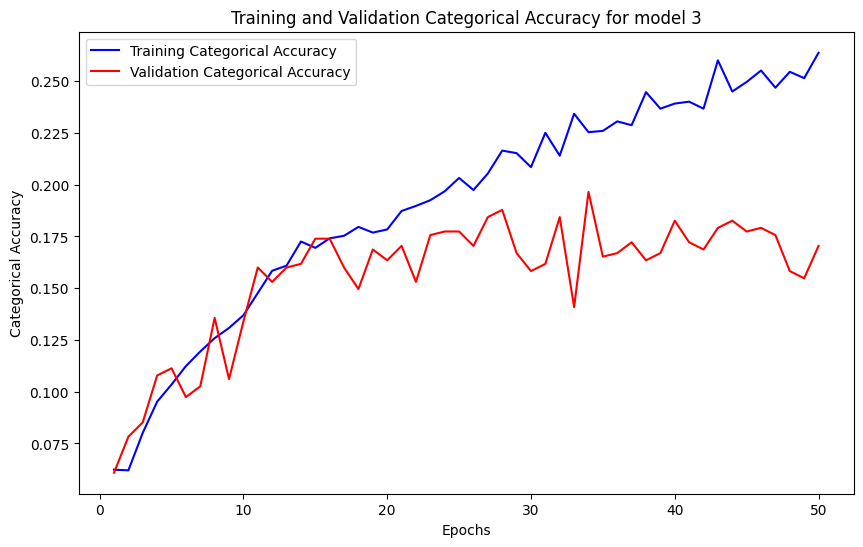

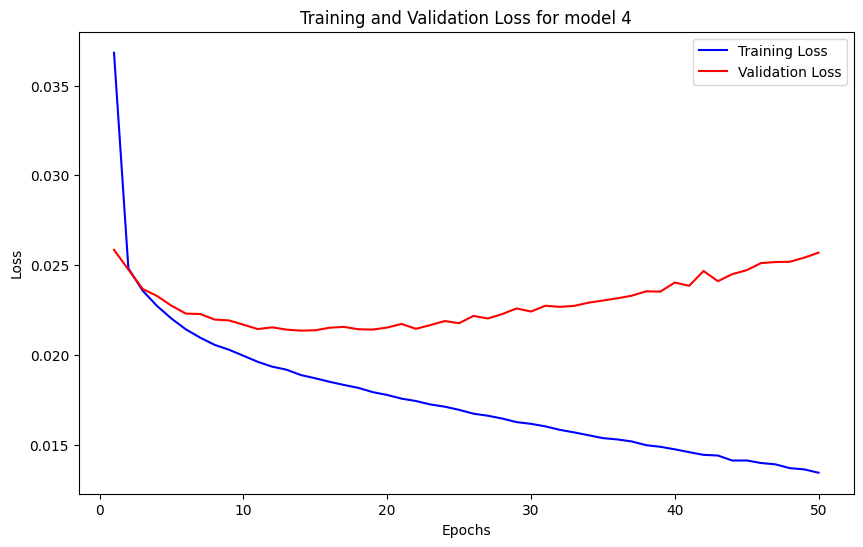

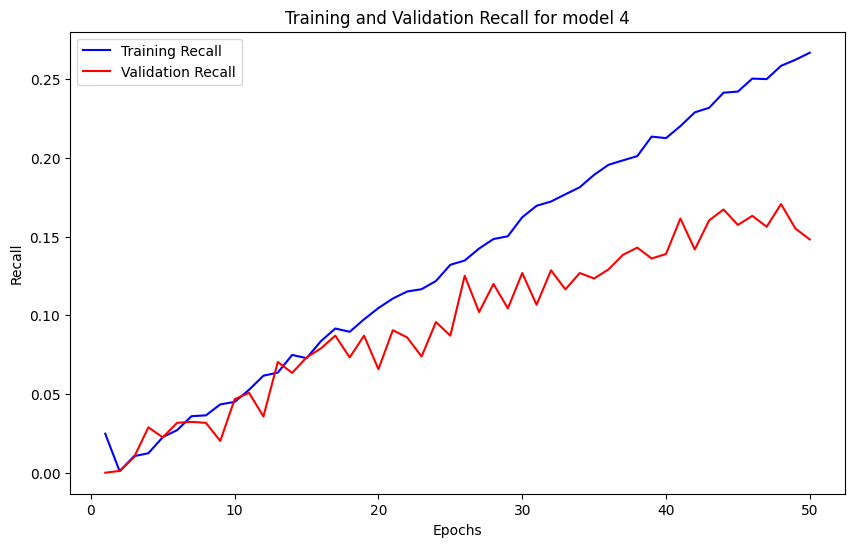

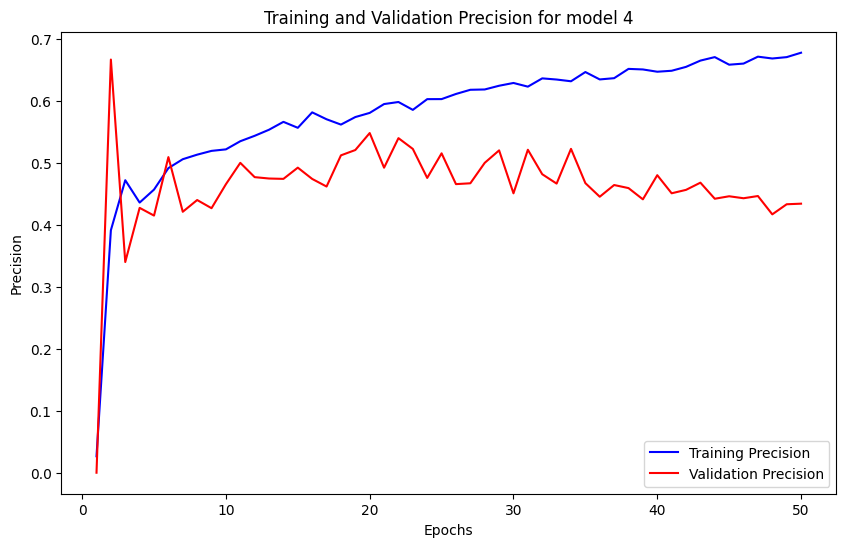

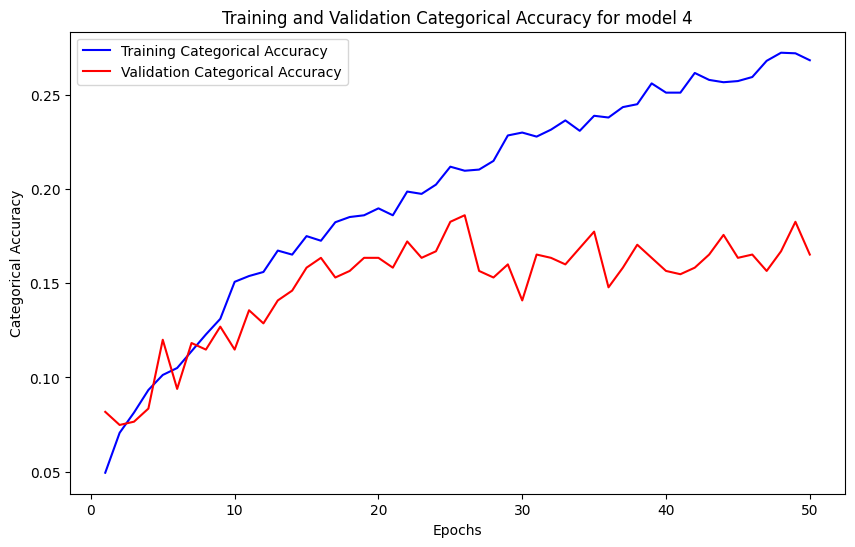

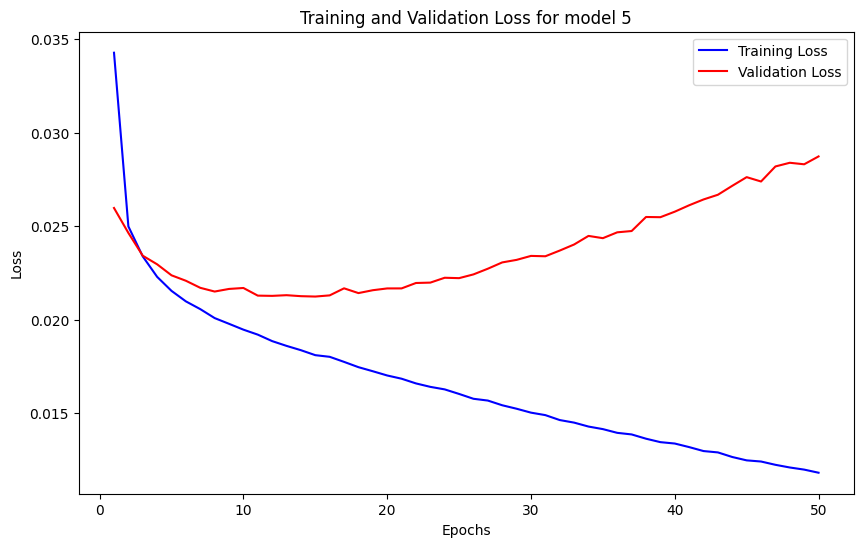

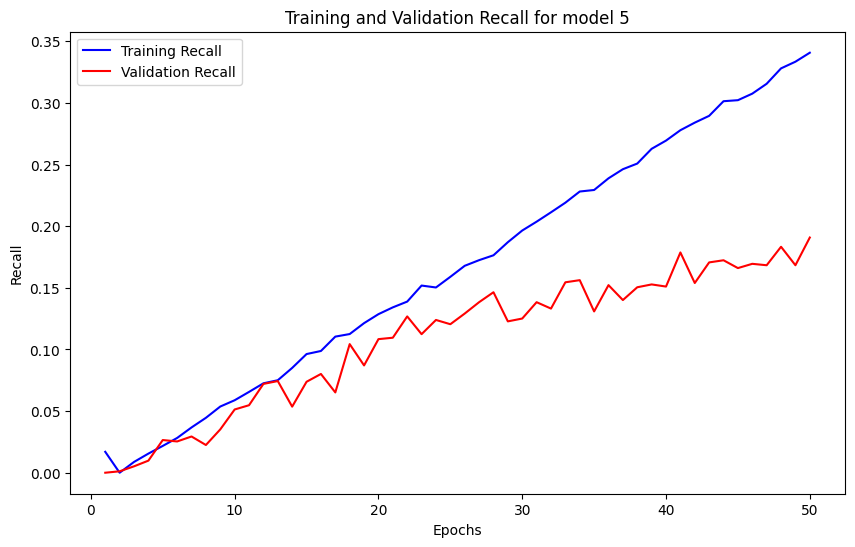

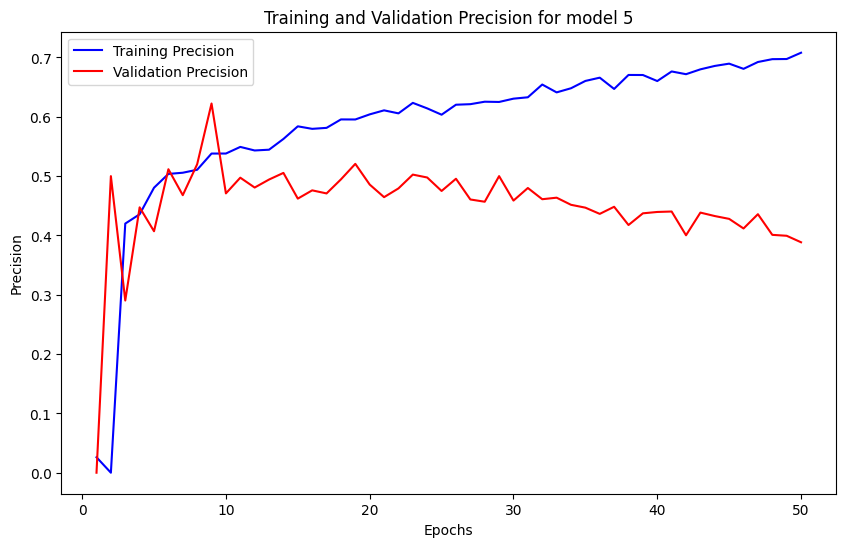

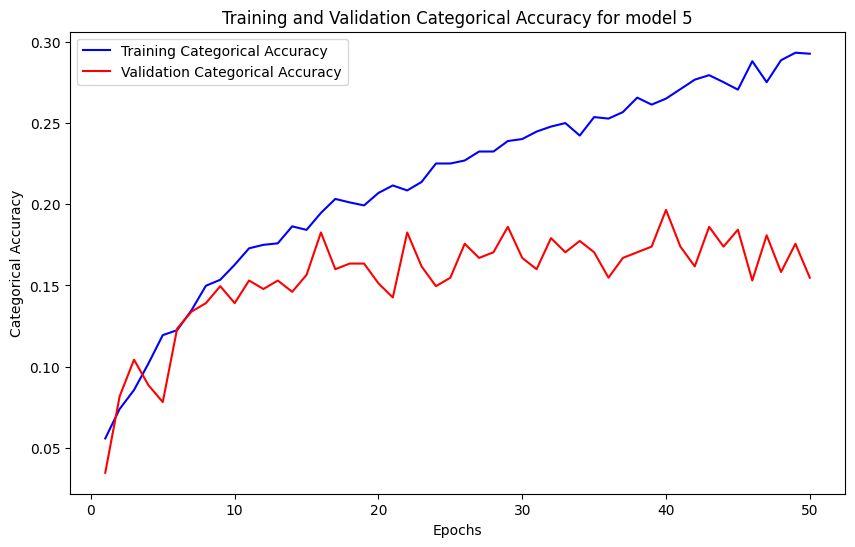

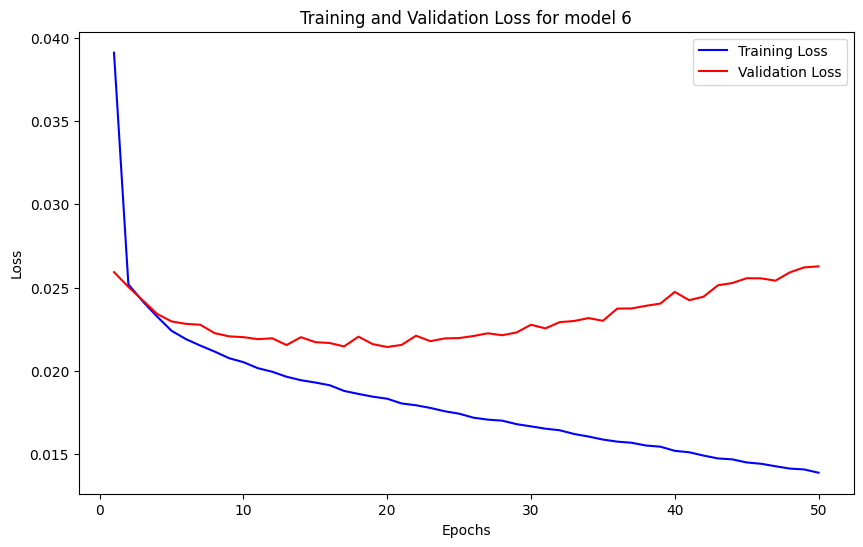

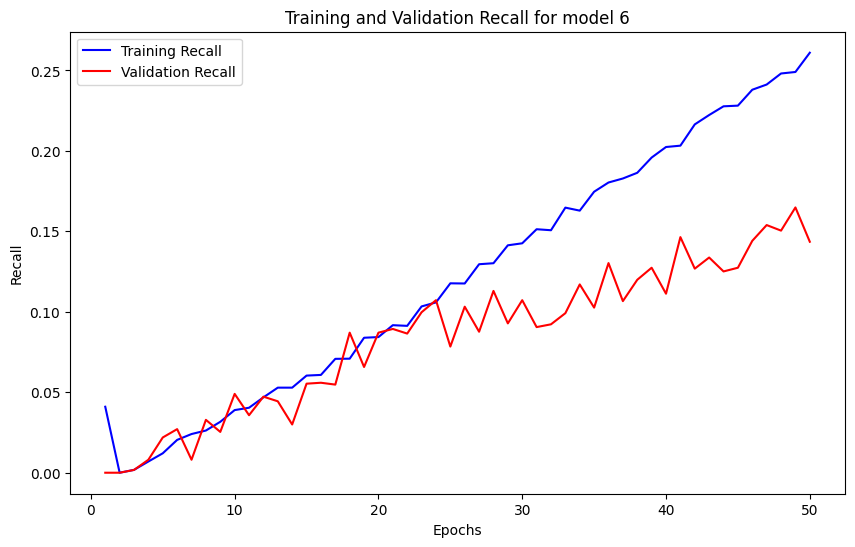

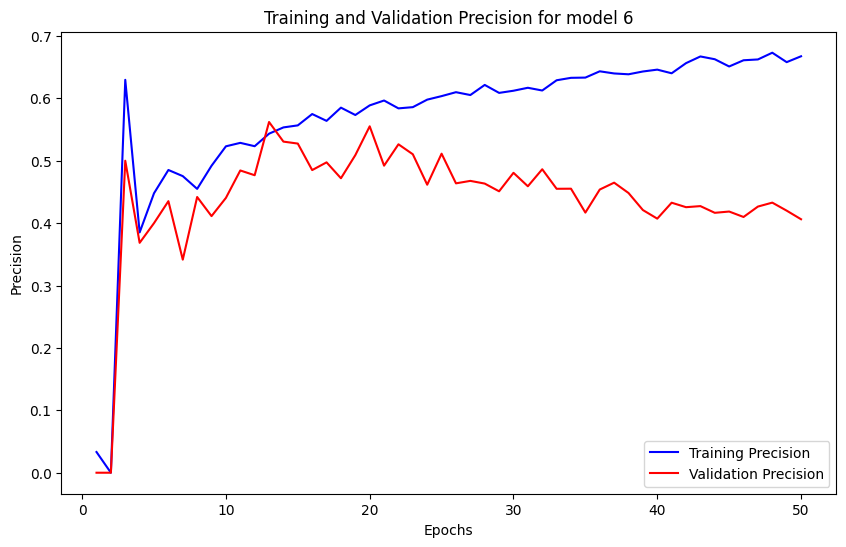

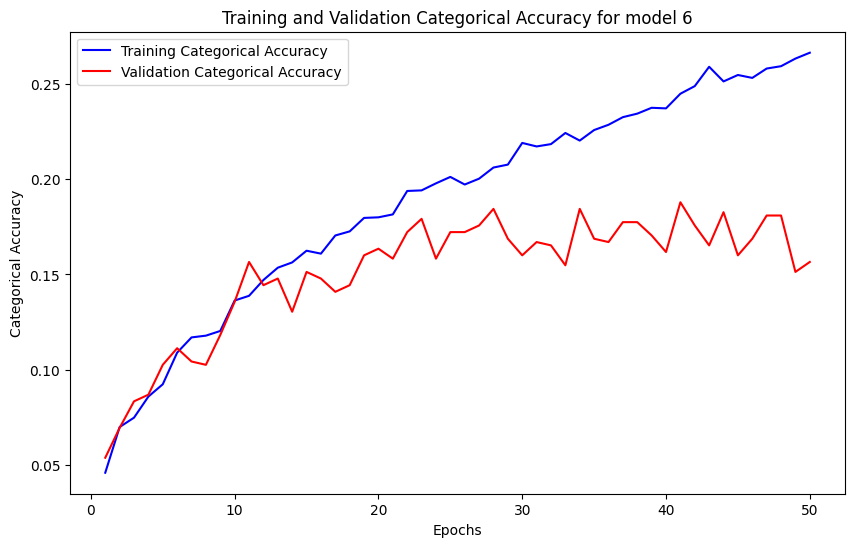

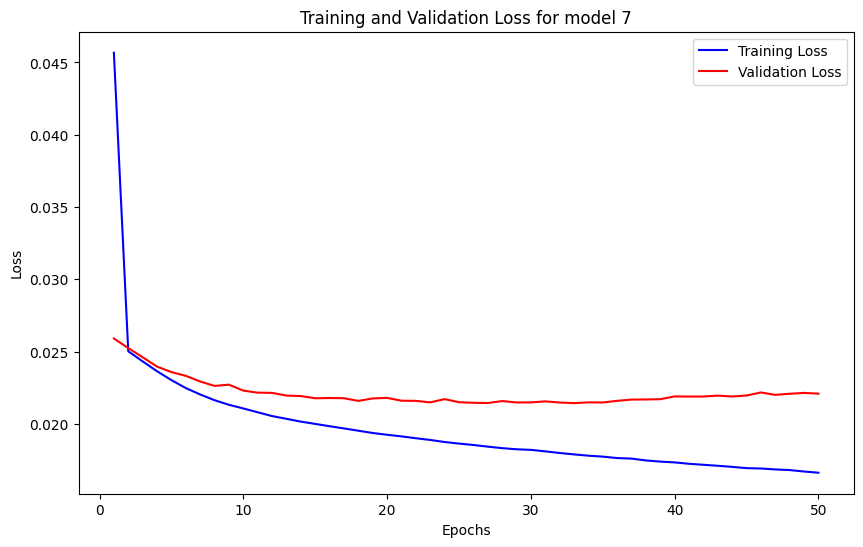

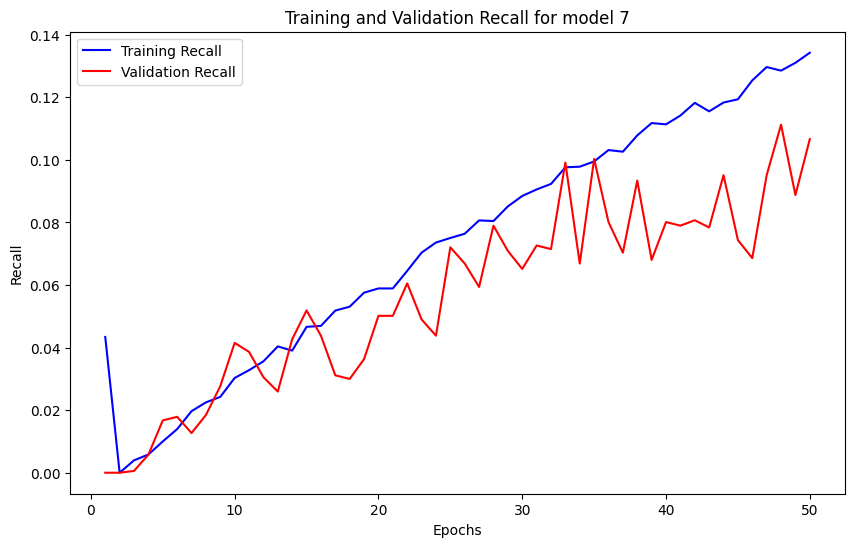

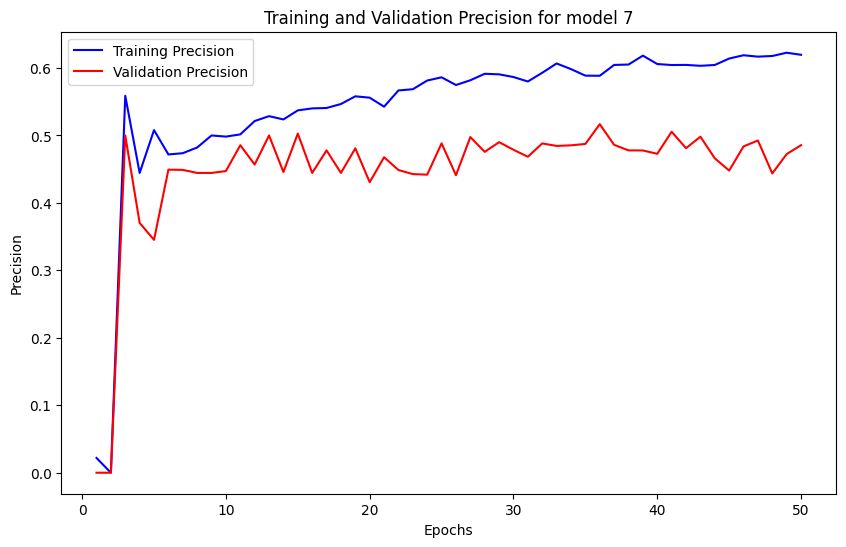

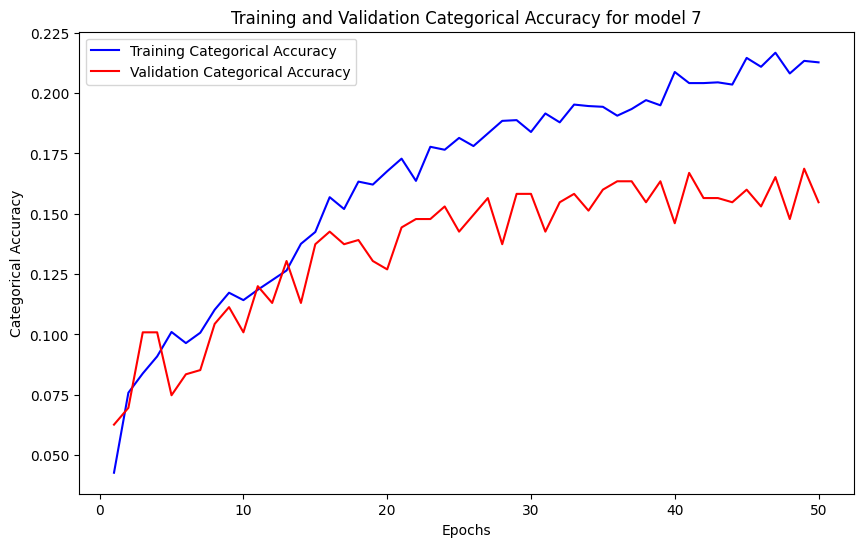

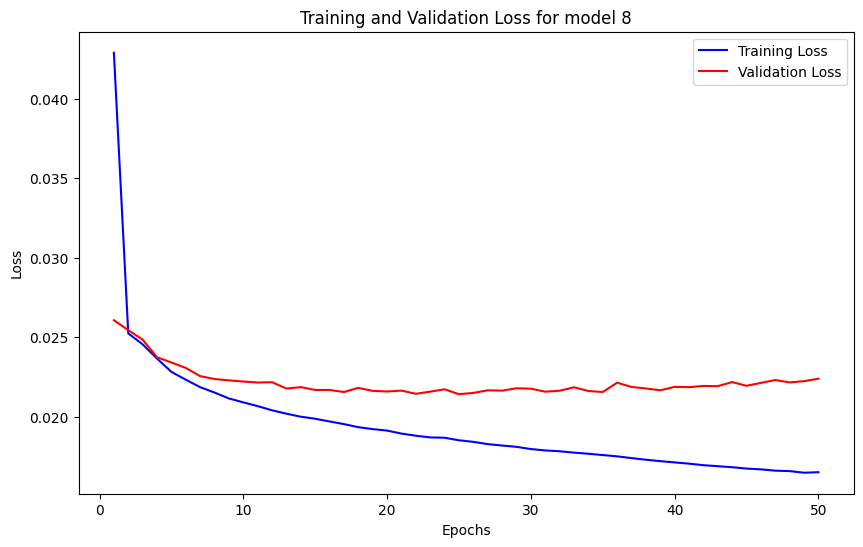

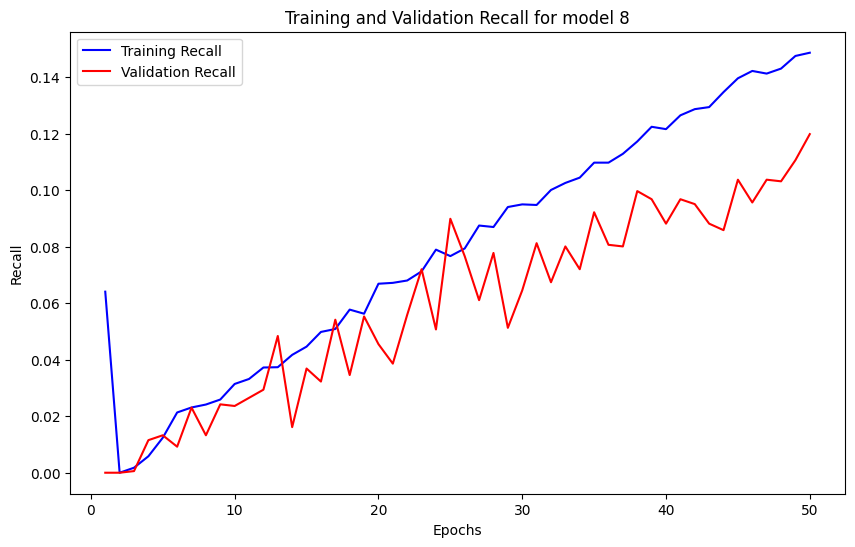

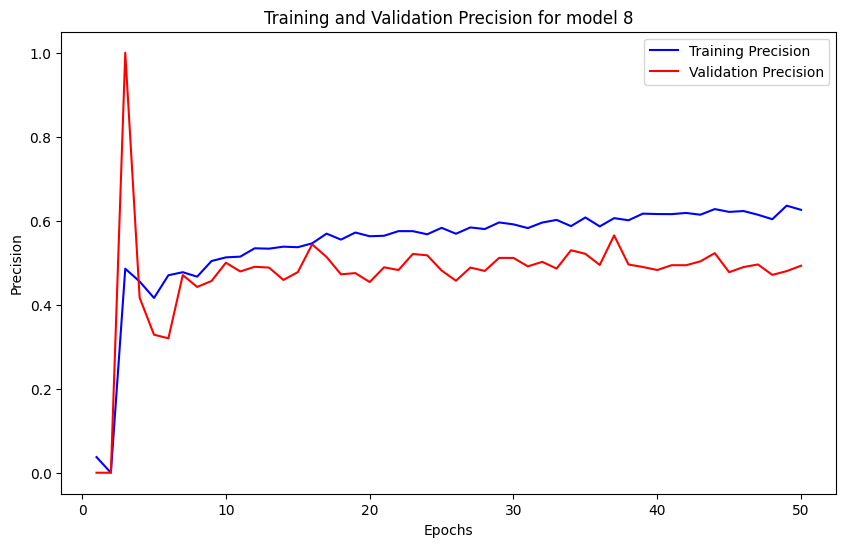

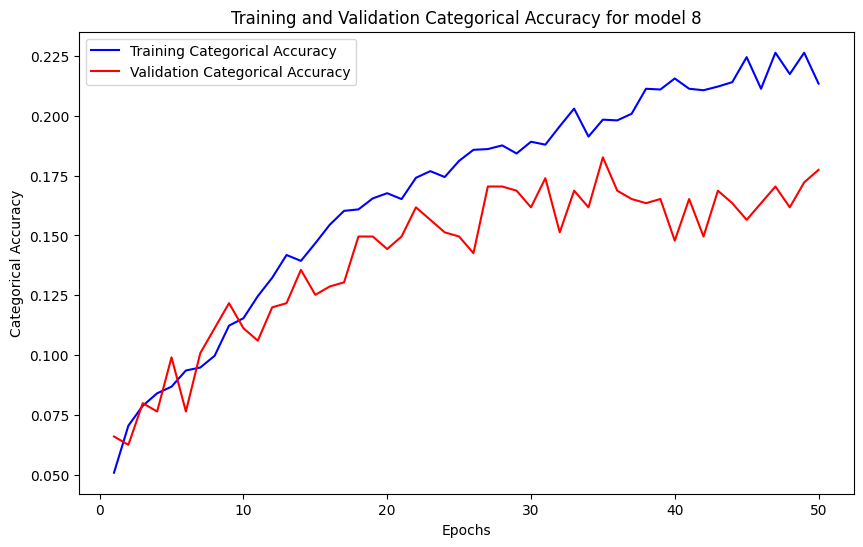

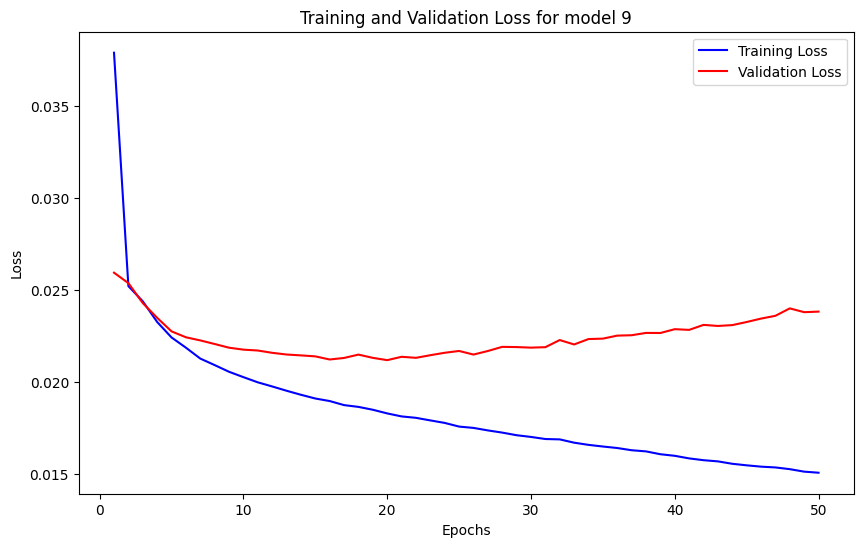

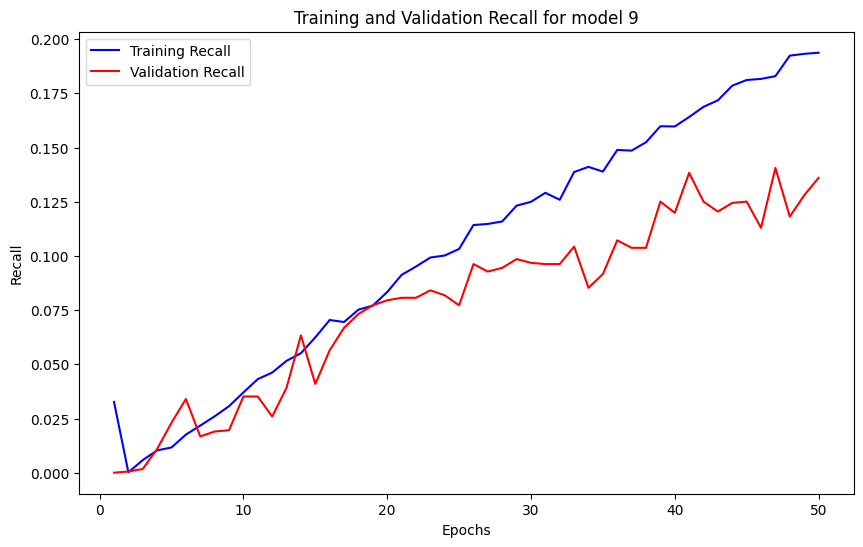

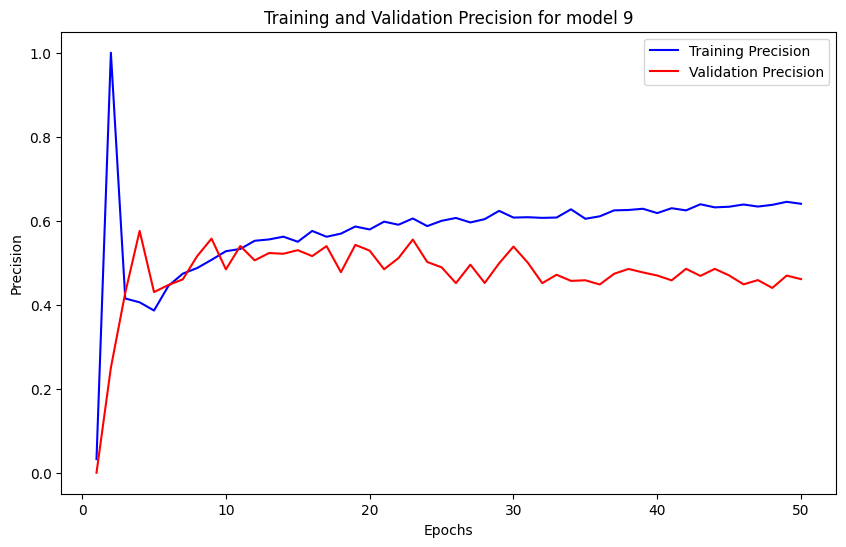

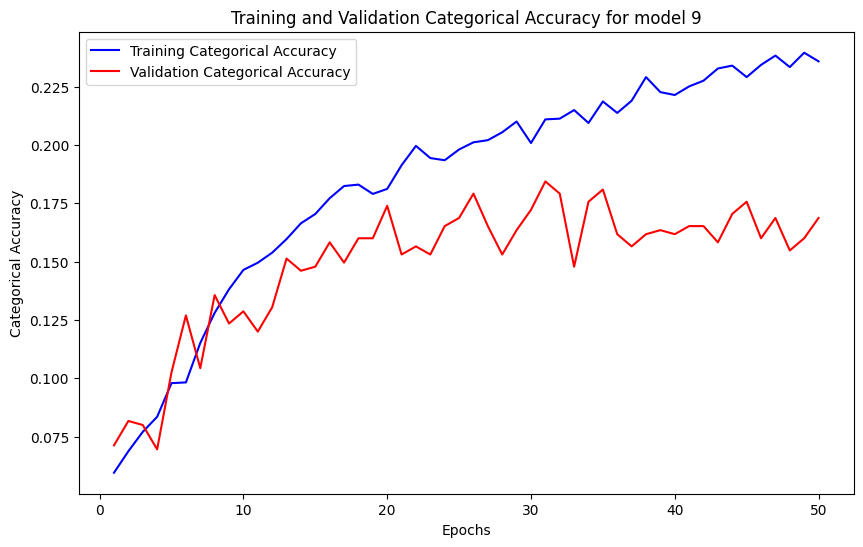

In [ ]:
c = 0
for history in histories:
  hist_keys = list(history.history.keys())
  hist_names = ["Loss", "Recall", "Precision", "Categorical Accuracy"]
  c+=1

  for i in range(int(len(hist_keys)/2)):

    # Plotting the curves
    epochs_list = range(1, epochs + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs_list, history.history[hist_keys[i]], 'b-', label='Training ' + hist_names[i])
    plt.plot(epochs_list, history.history[hist_keys[i+int((len(hist_keys)/2))]], 'r-', label='Validation ' + hist_names[i])
    plt.title('Training and Validation '+ hist_names[i] +' for model '+str(c))
    plt.xlabel('Epochs')
    plt.ylabel(hist_names[i])
    plt.legend()
    plt.show()

## Create the output format: top 3 scents

Take the top 3 smells that have the highest probabilities.

In [ ]:
def top3_scents(output):
  """
  Takes in an output generated by the model.
  Returns the names of the top 3 scents in a list, by descending order
  """

  top3_indices = np.argsort(output[0])[::-1][:3] # sorts the output by ascending order, returns it to descending and returns the first 3. The returned values are the indexes of the output

  result = []

  for i in top3_indices:
    result.append(unique_classes_series[i])

  return result

## Create a custom metric which compares the correct number of returned scents

For a received output and an expected output, it gives the % of matching smells. It is based on the expected output. So if the expected output contains 1 smell, and received output contains 3, but the received output contains the odor that is in the expected output, the result will be 1 (100%). This is so, because the prediction is always the same number of smells, so it will avoid to penalize the model because of this decision.

In [ ]:
def compare_results(received_output, expected_output, ordered=False):
  """
  Returns the amount of correctly guessed smells as %
  received_output, expected_output: list
  received_output must be bigger or equal than expected_output (this method uses the length of received_output for the comparisons)
  ordered: take the order of the smell into account when comparing. default: false
  """

  if type(received_output) != list or type(expected_output) != list:
    raise Exception("Constraint not respected: args received_output, expected_output must be lists")

  #if len(received_output) < len(expected_output):
  #  raise Exception("Constraint not respected: len(received_output) >= len(expected_output)")

  matches = 0

  if not ordered:
    for i in received_output:
      if i in expected_output:
        matches += 1

  else:
    for i in range(len(received_output)):
      if received_output[i] == expected_output[i]:
        matches+=1

  if len(received_output) > len(expected_output):
    return (matches/len(expected_output))

  return (matches/len(received_output))

## Retrain the model with a more optimal number of epochs

As seen on the previous diagrams, 20 is an optimal number of epochs for the training

In [ ]:
epochs = 20
c= 0
for model in models:
  c+=1
  print("Model", c)
  model.fit(training_inputs, training_outputs, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2)
  print("=======================================================================================")
  print("")

Model 1
Epoch 1/20
102/102 - 0s - loss: 0.0136 - recall: 0.2485 - precision: 0.6796 - categorical_accuracy: 0.2597 - val_loss: 0.0253 - val_recall: 0.1591 - val_precision: 0.4600 - val_categorical_accuracy: 0.1513 - 421ms/epoch - 4ms/step
Epoch 2/20
102/102 - 0s - loss: 0.0134 - recall: 0.2521 - precision: 0.6903 - categorical_accuracy: 0.2711 - val_loss: 0.0254 - val_recall: 0.1764 - val_precision: 0.4595 - val_categorical_accuracy: 0.1843 - 382ms/epoch - 4ms/step
Epoch 3/20
102/102 - 0s - loss: 0.0134 - recall: 0.2584 - precision: 0.6855 - categorical_accuracy: 0.2573 - val_loss: 0.0255 - val_recall: 0.1349 - val_precision: 0.4509 - val_categorical_accuracy: 0.1704 - 377ms/epoch - 4ms/step
Epoch 4/20
102/102 - 0s - loss: 0.0132 - recall: 0.2613 - precision: 0.6859 - categorical_accuracy: 0.2644 - val_loss: 0.0259 - val_recall: 0.1343 - val_precision: 0.4229 - val_categorical_accuracy: 0.1757 - 410ms/epoch - 4ms/step
Epoch 5/20
102/102 - 0s - loss: 0.0132 - recall: 0.2635 - precision:

## Test the model


### Evaluate the model

In [ ]:
#test_loss, test_accuracy = model.evaluate(test_inputs, test_outputs)
c=0
for model in models:
  c+=1
  print("Model",c)
  test_loss, test_recall, test_precision, test_accuracy = model.evaluate(test_inputs, test_outputs, verbose=2)

Model 1
16/16 - 0s - loss: 0.0290 - recall: 0.1905 - precision: 0.4024 - categorical_accuracy: 0.1777 - 82ms/epoch - 5ms/step
Model 2
16/16 - 0s - loss: 0.0255 - recall_1: 0.1464 - precision_1: 0.4180 - categorical_accuracy: 0.1488 - 59ms/epoch - 4ms/step
Model 3
16/16 - 0s - loss: 0.0297 - recall_2: 0.1821 - precision_2: 0.3892 - categorical_accuracy: 0.1488 - 56ms/epoch - 3ms/step
Model 4
16/16 - 0s - loss: 0.0305 - recall_3: 0.2080 - precision_3: 0.3987 - categorical_accuracy: 0.1508 - 56ms/epoch - 3ms/step
Model 5
16/16 - 0s - loss: 0.0363 - recall_4: 0.1884 - precision_4: 0.3375 - categorical_accuracy: 0.1632 - 58ms/epoch - 4ms/step
Model 6
16/16 - 0s - loss: 0.0304 - recall_5: 0.1793 - precision_5: 0.3963 - categorical_accuracy: 0.1570 - 60ms/epoch - 4ms/step
Model 7
16/16 - 0s - loss: 0.0231 - recall_6: 0.1113 - precision_6: 0.4441 - categorical_accuracy: 0.1570 - 59ms/epoch - 4ms/step
Model 8
16/16 - 0s - loss: 0.0240 - recall_7: 0.1225 - precision_7: 0.4310 - categorical_accur

### Evaluate the model according to the top 3 scents

In [ ]:
from sklearn.metrics import jaccard_score, hamming_loss, accuracy_score, precision_score, recall_score, f1_score

all_smells_1 = df['SENTENCE'].str.split(',').sum()
unique_smells_1 = unique_classes_series.to_numpy()

c=0
# Evaluate models
for model in models:
  c+=1
  nn_y_pred_descr = model.predict(test_inputs, verbose=0)

  top_3_indices_nn = tf.argsort(nn_y_pred_descr, direction='DESCENDING')[:, :3]

  top_3_labels_Normal_nn = []
  for example_indices in top_3_indices_nn:
      example_labels = []
      for index in example_indices:
          example_labels.append(all_smells_1[index])
      top_3_labels_Normal_nn.append(example_labels)

  top_3_labels_Normal_nn = np.array(top_3_labels_Normal_nn).tolist()


  print(top_3_labels_Normal_nn)

  nn_results_d = np.zeros(nn_y_pred_descr.shape)
  for row in range(top_3_indices_nn.shape[0]):
    indices = top_3_indices_nn[row]
    nn_results_d[row, indices] = 1


  accuracy_d = accuracy_score(test_outputs, nn_results_d)
  precision_d = precision_score(test_outputs, nn_results_d, average='samples')
  recall_d = recall_score(test_outputs, nn_results_d, average='samples')
  f1_d = f1_score(test_outputs, nn_results_d, average='samples')
  jaccard_d = jaccard_score(test_outputs, nn_results_d, average='samples')
  hamming_loss_d = hamming_loss(test_outputs, nn_results_d)

  print(f"Validation Set Metrics for model {c}:")
  print(f"  Accuracy: {accuracy_d:.4f}")
  print(f"  Precision: {precision_d:.4f}")
  print(f"  Recall: {recall_d:.4f}")
  print(f"  F1-score: {f1_d:.4f}")
  print(f"  Hamming Loss: {hamming_loss_d:.4f}")
  print(f"  Jaccard Score: {jaccard_d:.4f}")
  print("")

[['powdery', 'sweet', 'butter'], ['butter', 'powdery', 'chemical'], ['spicy', 'earthy', 'camphor'], ['sulfuric', 'sweet', 'spicy'], ['green', 'herbal', 'camphor'], ['butter', 'spicy', 'sweet'], ['cacao', 'green', 'spicy'], ['fruity', 'honey', 'oily'], ['butter', 'waxy', 'fruity'], ['green', 'fruity', 'mint'], ['sweet', 'woody', 'camphor'], ['camphor', 'odorless', 'woody'], ['green', 'powdery', 'cacao'], ['coniferous', 'tropicalfruit', 'earthy'], ['camphor', 'fresh', 'odorless'], ['waxy', 'vanilla', 'camphor'], ['herbal', 'musk', 'musk'], ['floral', 'spicy', 'butter'], ['dry', 'camphor', 'spicy'], ['animalic', 'spicy', 'waxy'], ['sweet', 'earthy', 'citrus'], ['dry', 'ethereal', 'animalic'], ['camphor', 'dry', 'spicy'], ['spicy', 'camphor', 'vanilla'], ['camphor', 'floral', 'vanilla'], ['odorless', 'fruity', 'ethereal'], ['woody', 'spicy', 'dry'], ['musk', 'fruity', 'spicy'], ['camphor', 'spicy', 'vanilla'], ['camphor', 'dry', 'musk'], ['spicy', 'camphor', 'green'], ['camphor', 'dry', 's

#### Predict for the whole model

Plotbars for the first 5 predictions for each model. The height of the bars shows the probability of a scent being present in the molecule, predicted by the given model. The red bars represent the odors that are really present in the molecule.

Model 1
No0:


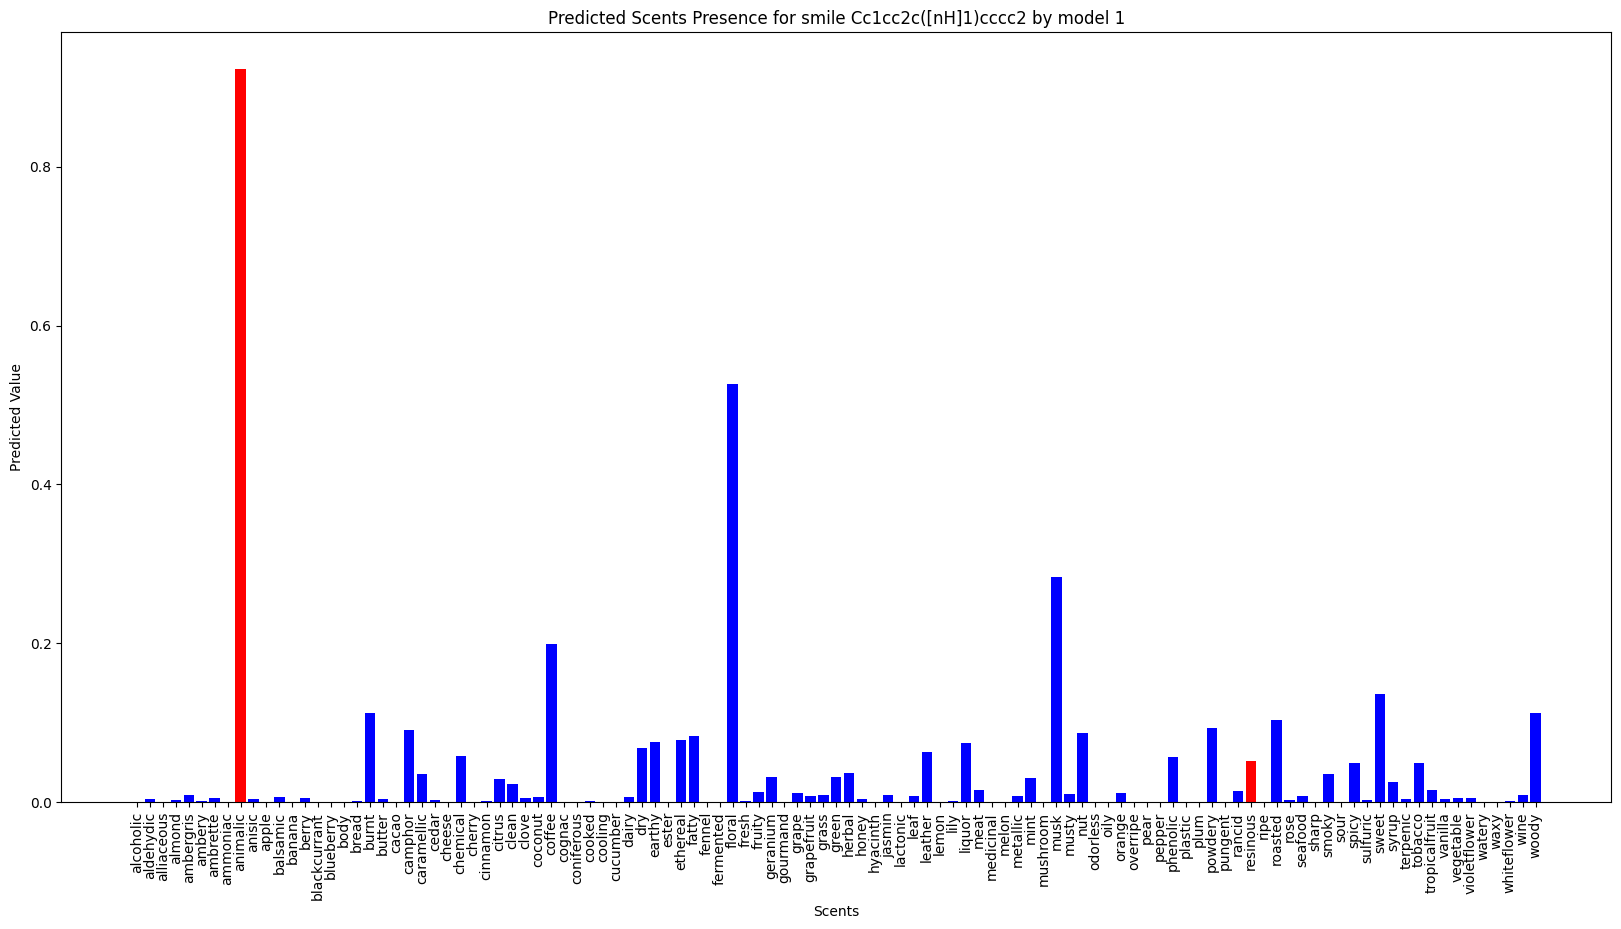

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


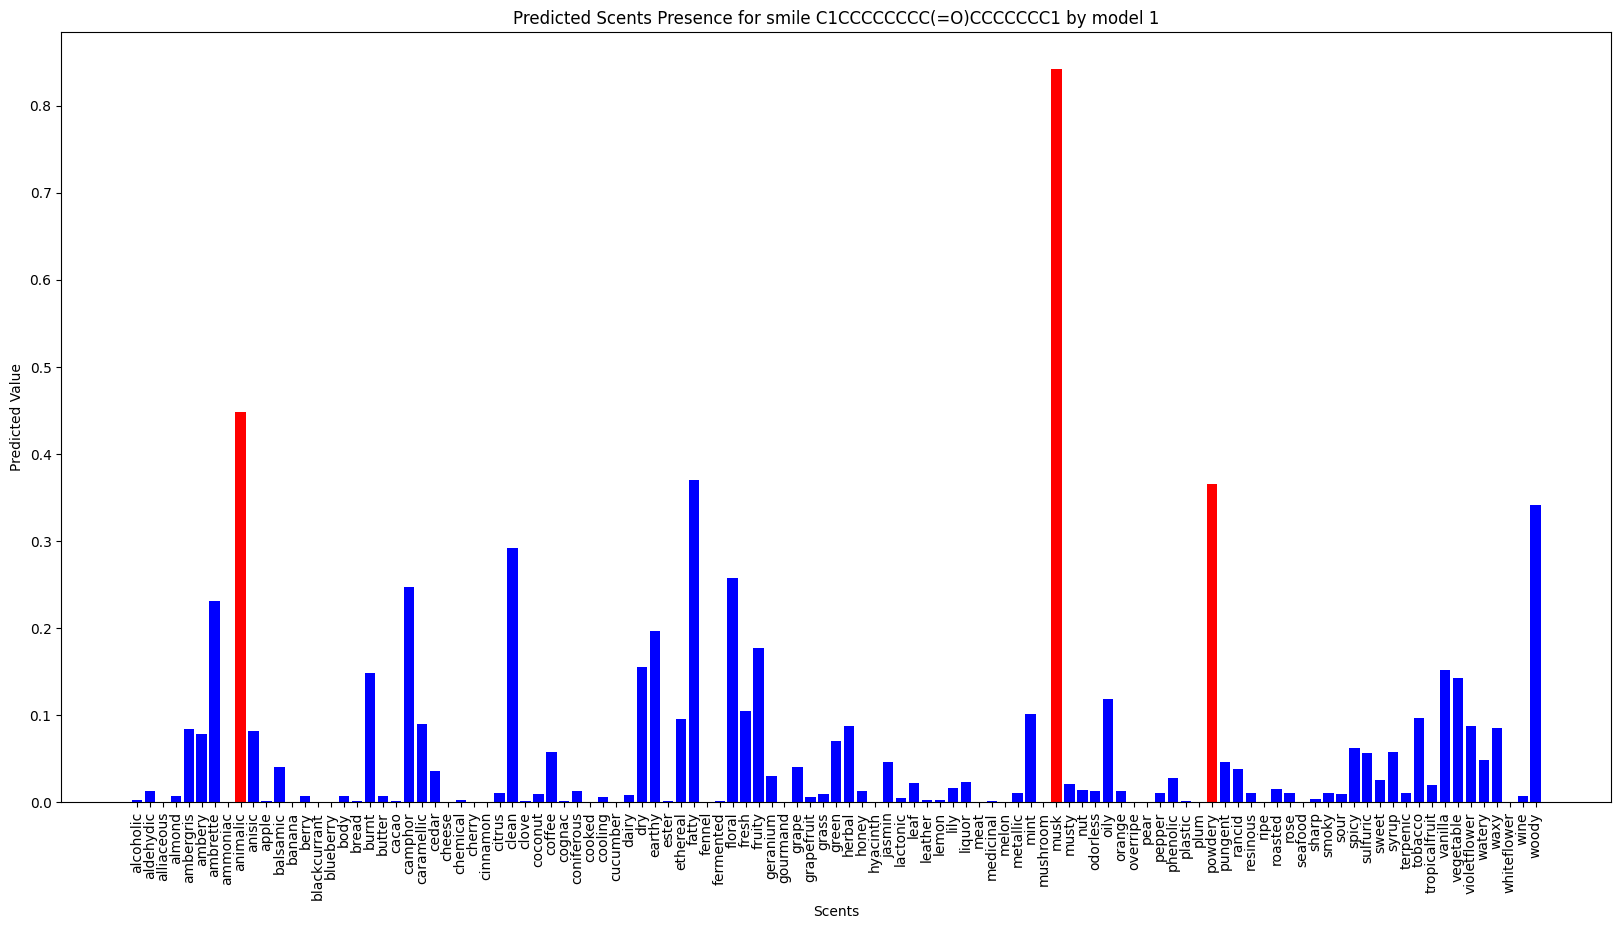

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


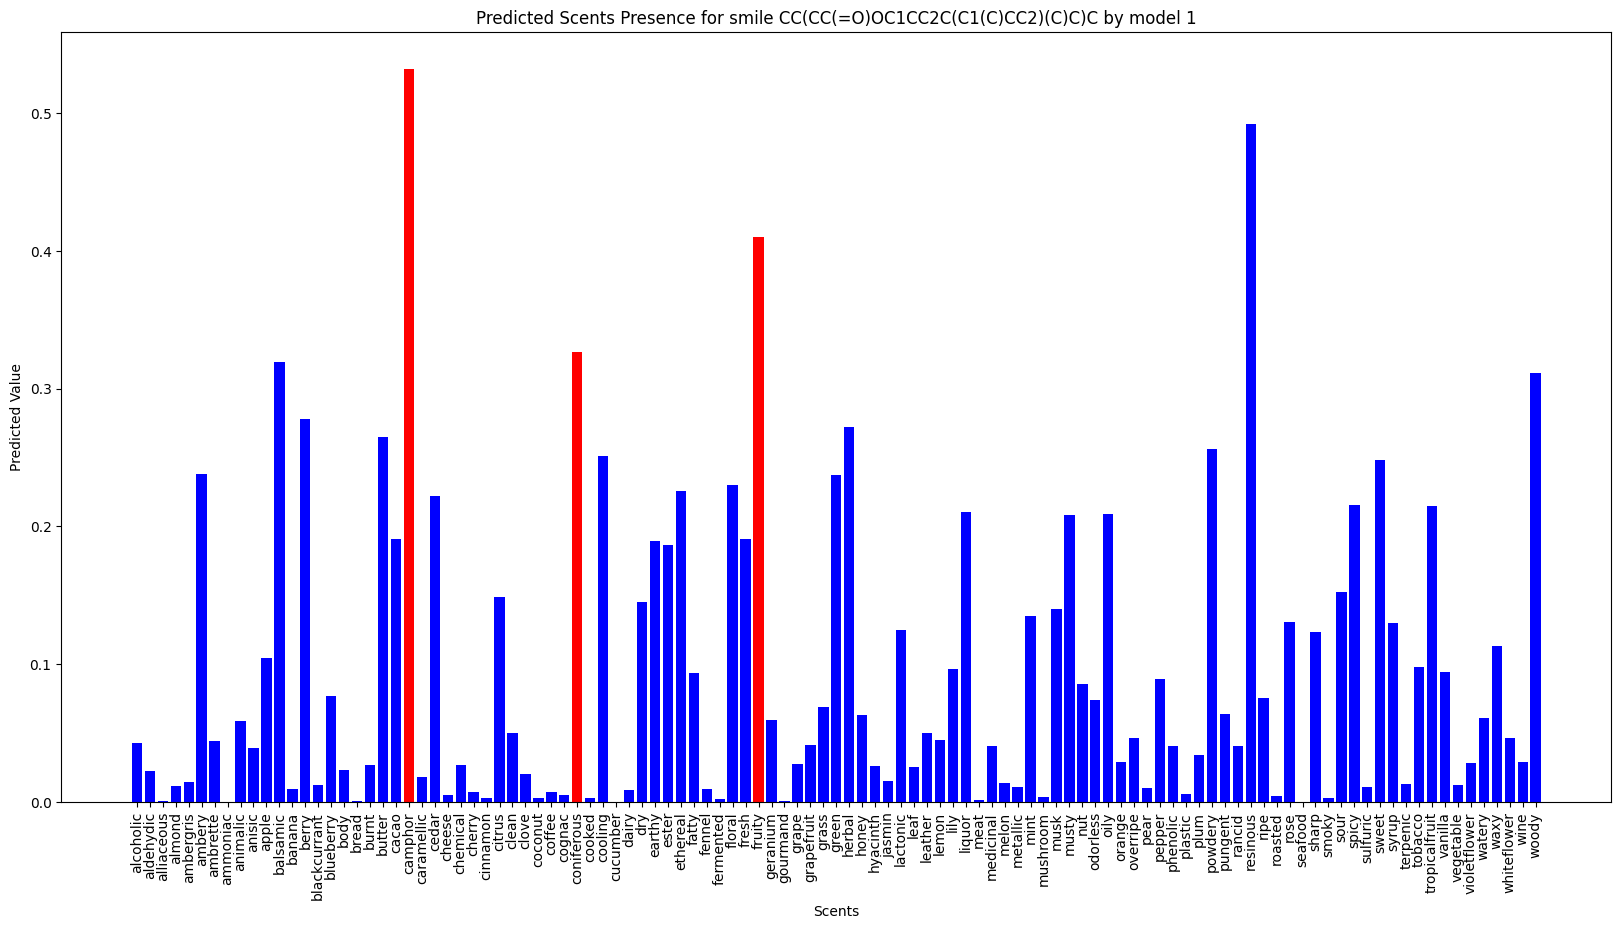

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


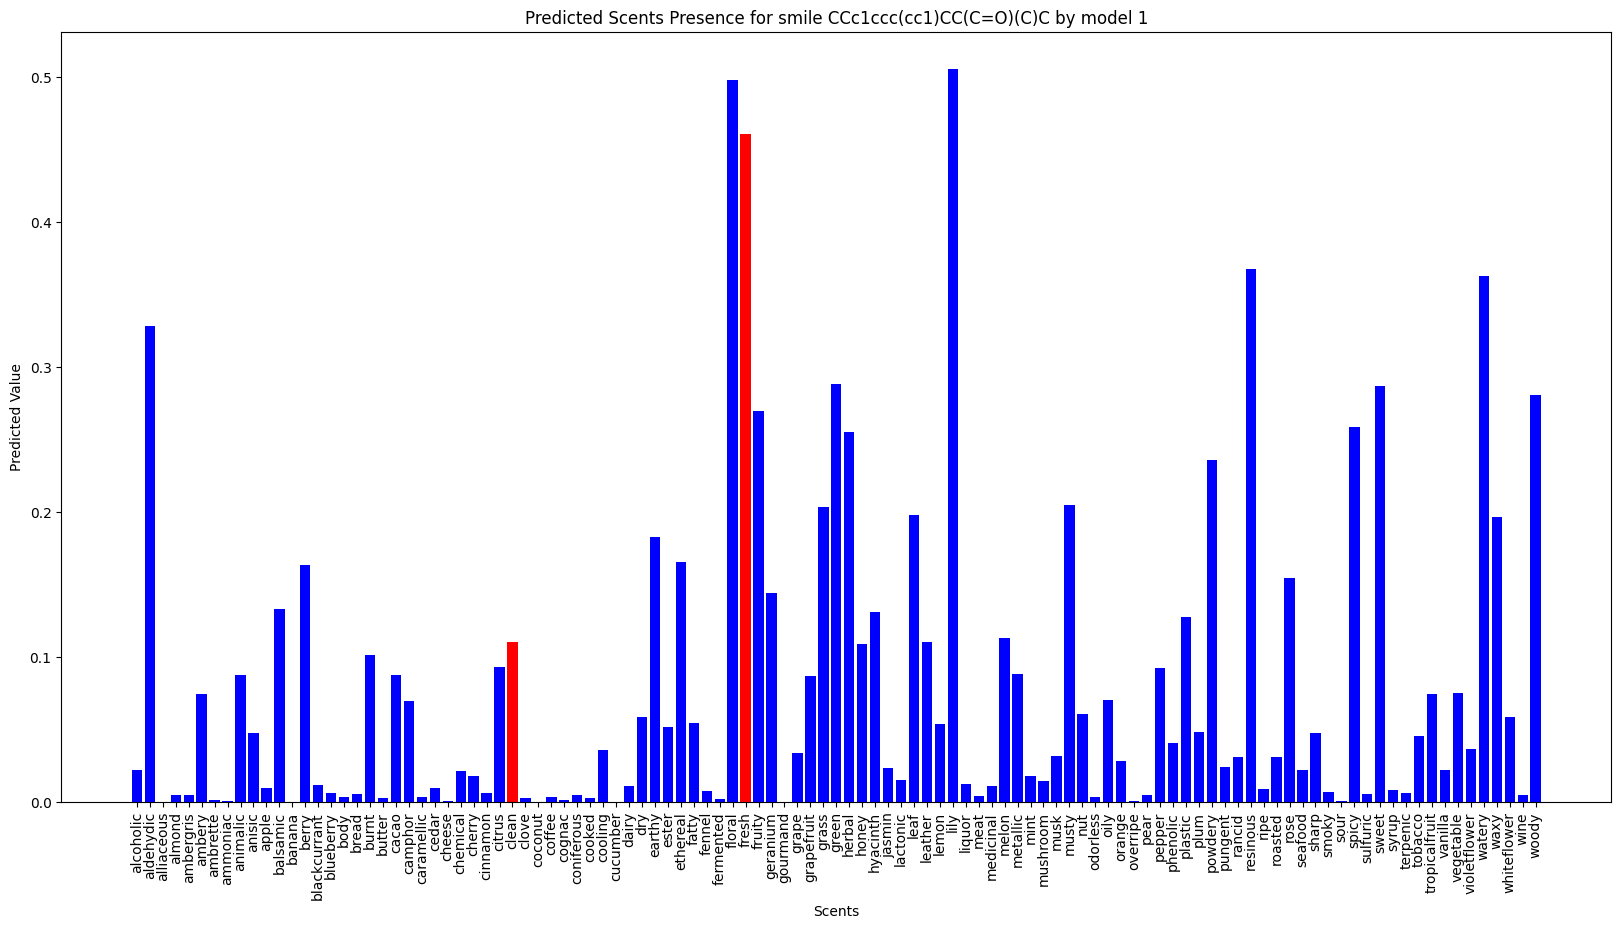

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


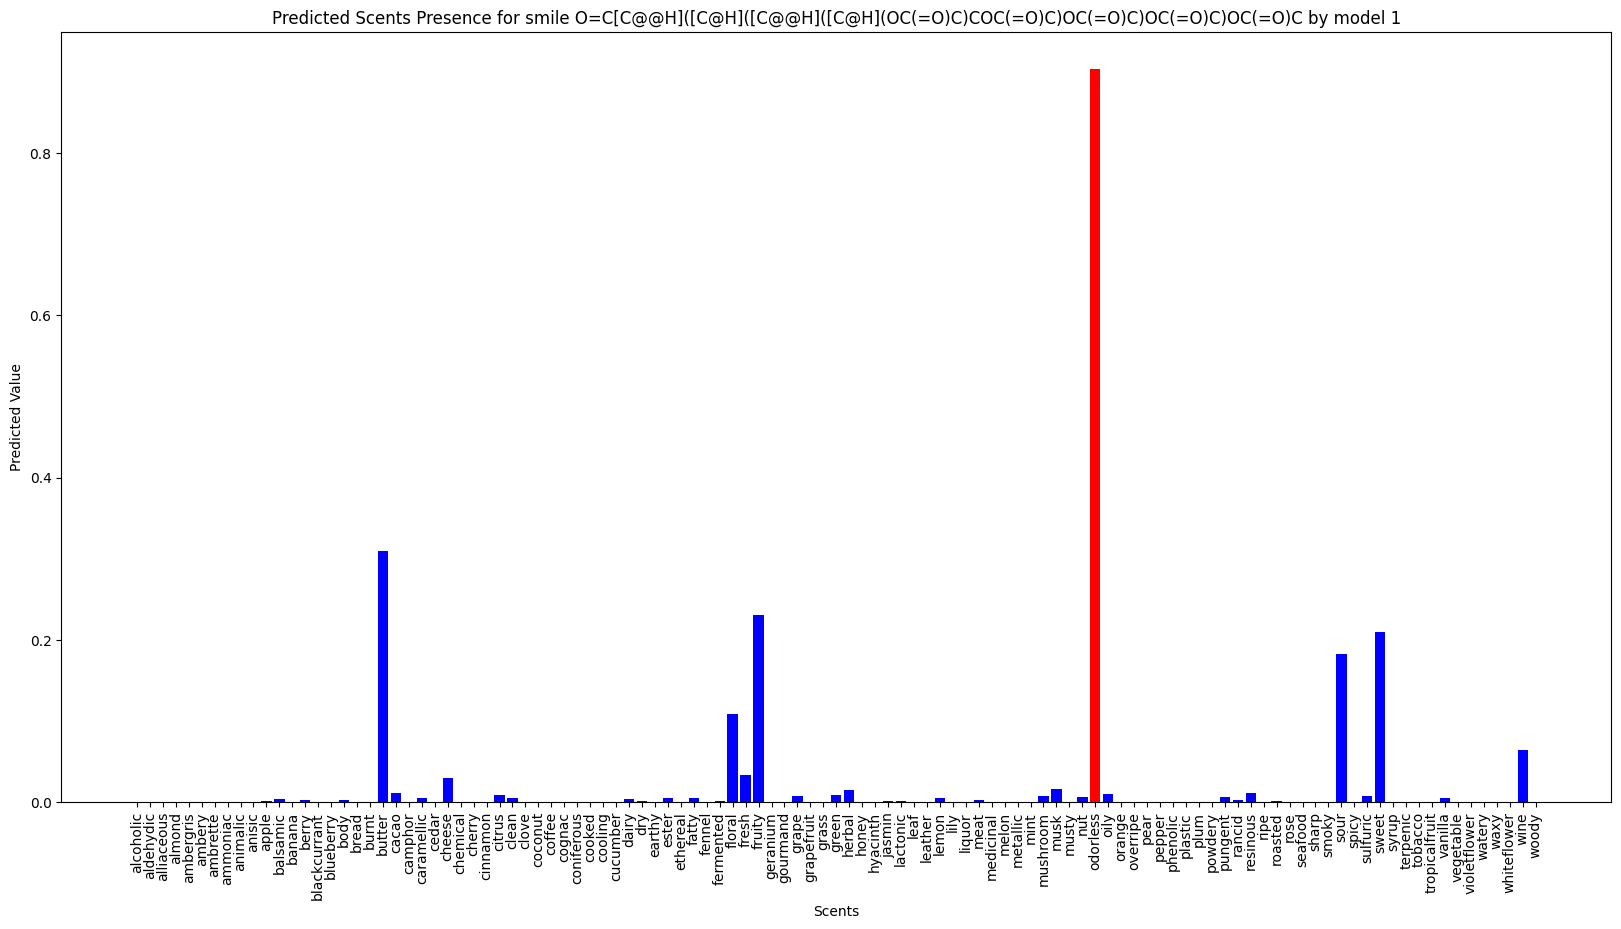

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


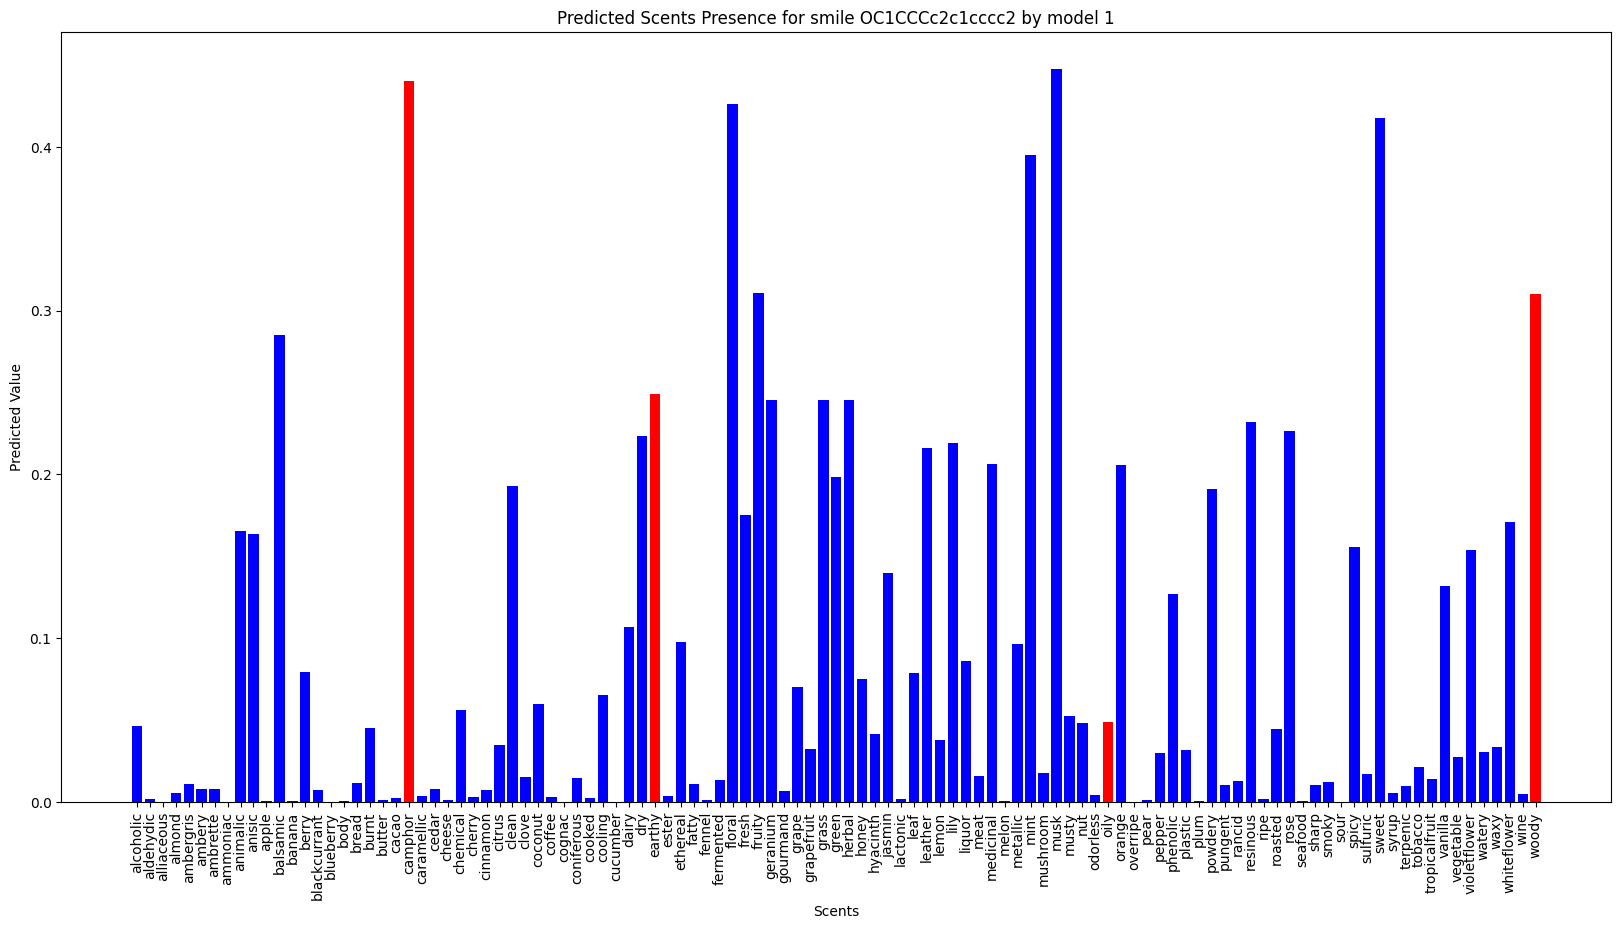

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 2
No0:


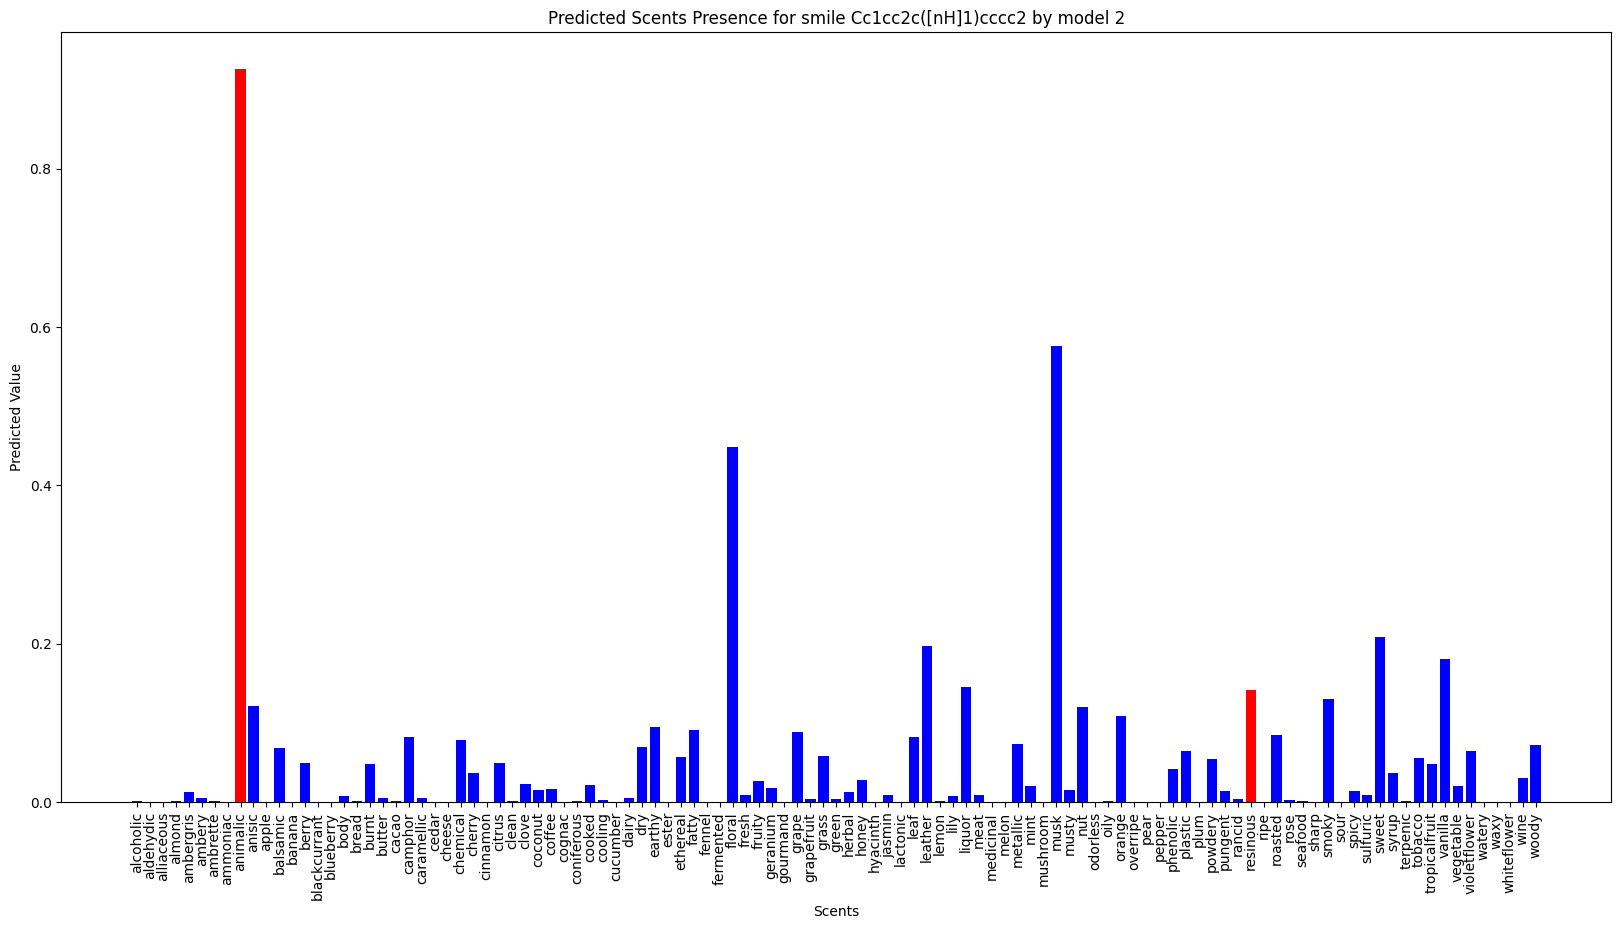

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


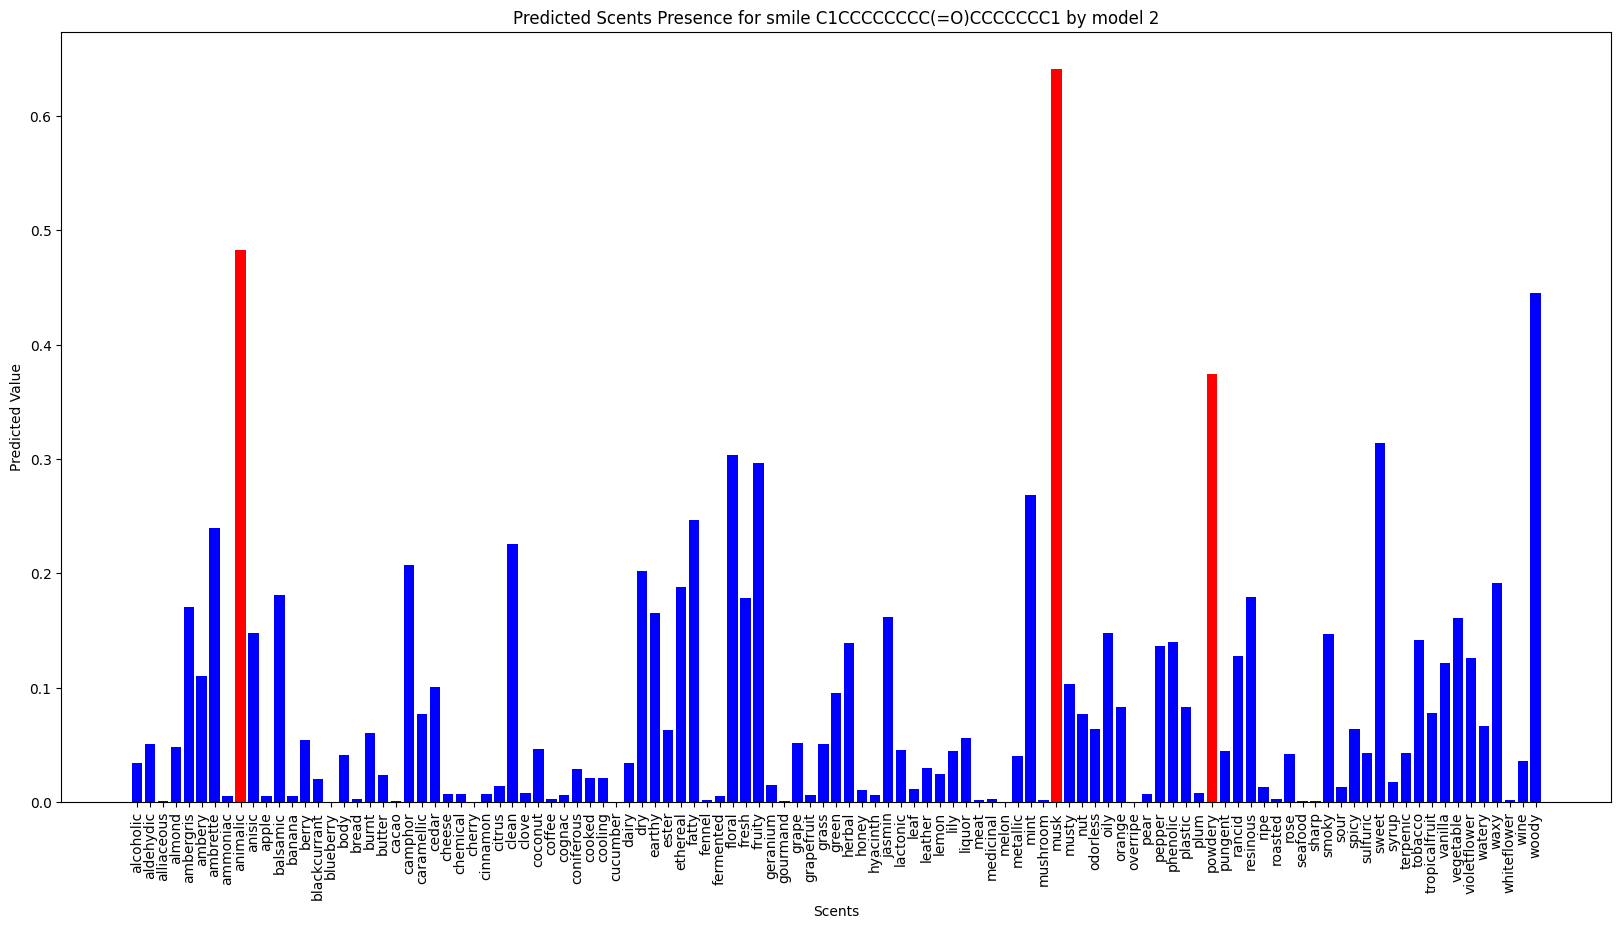

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


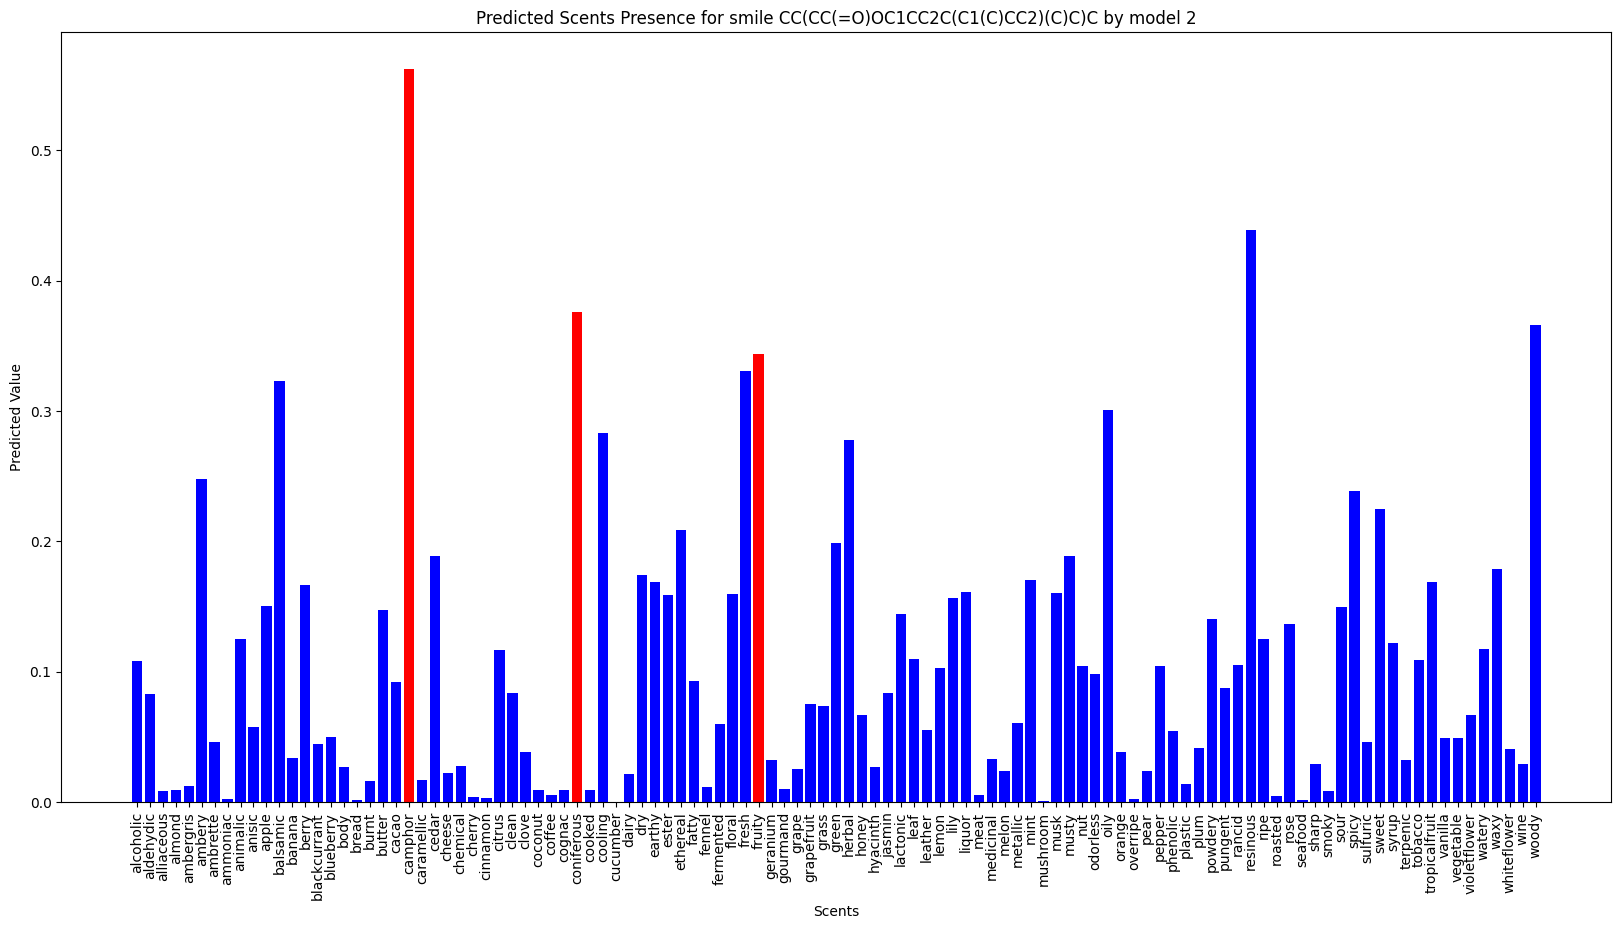

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


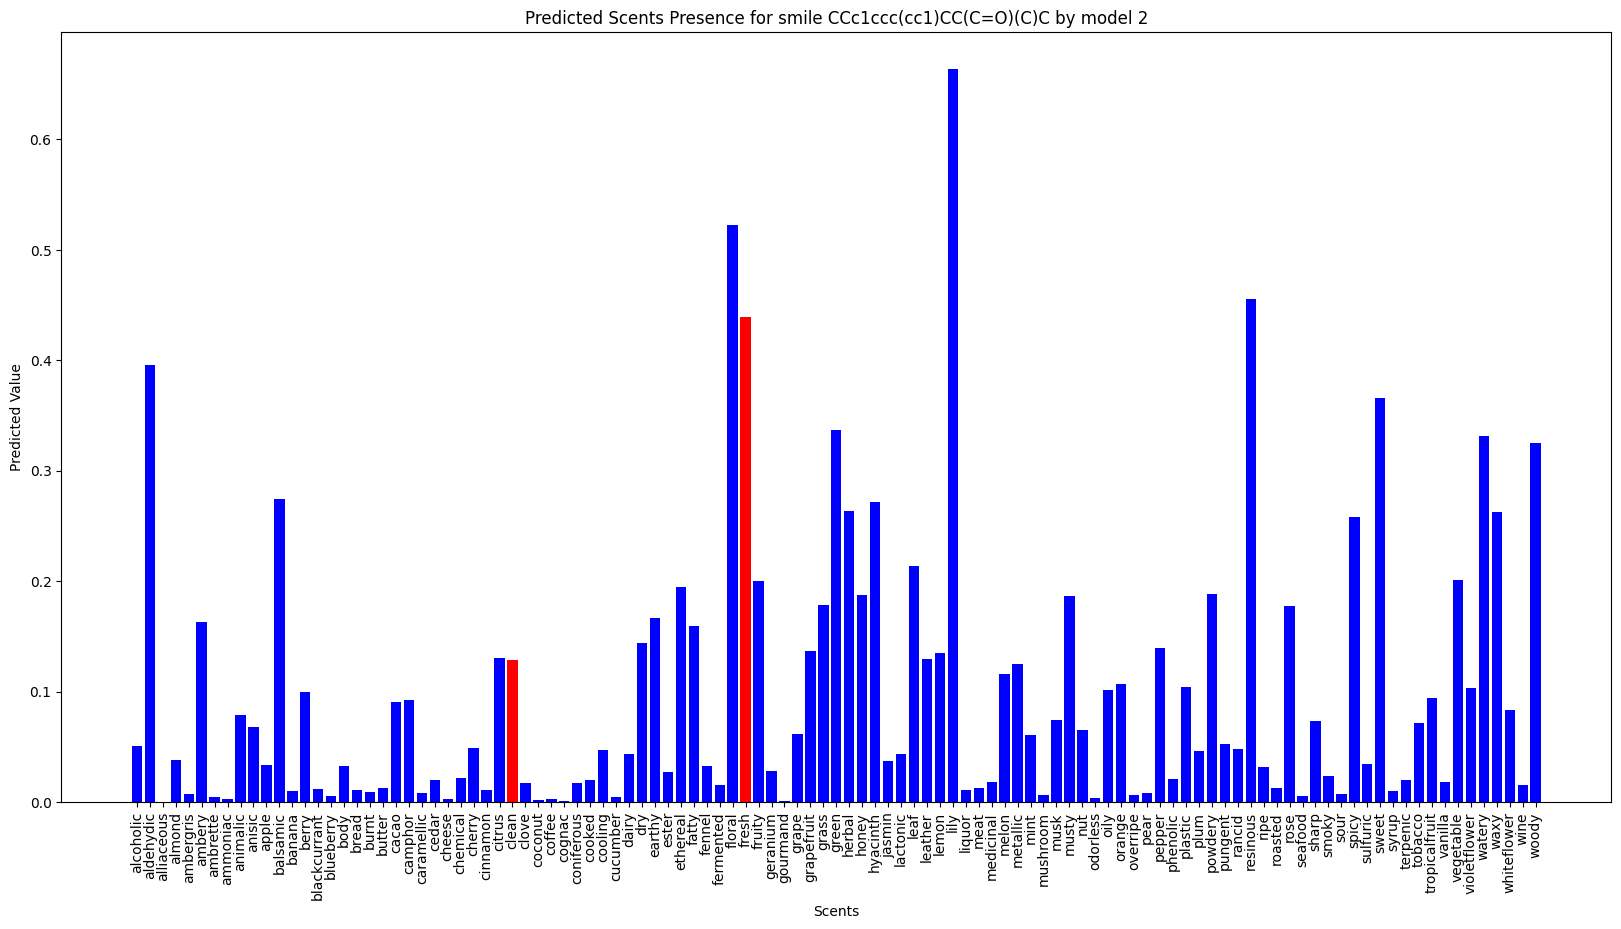

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


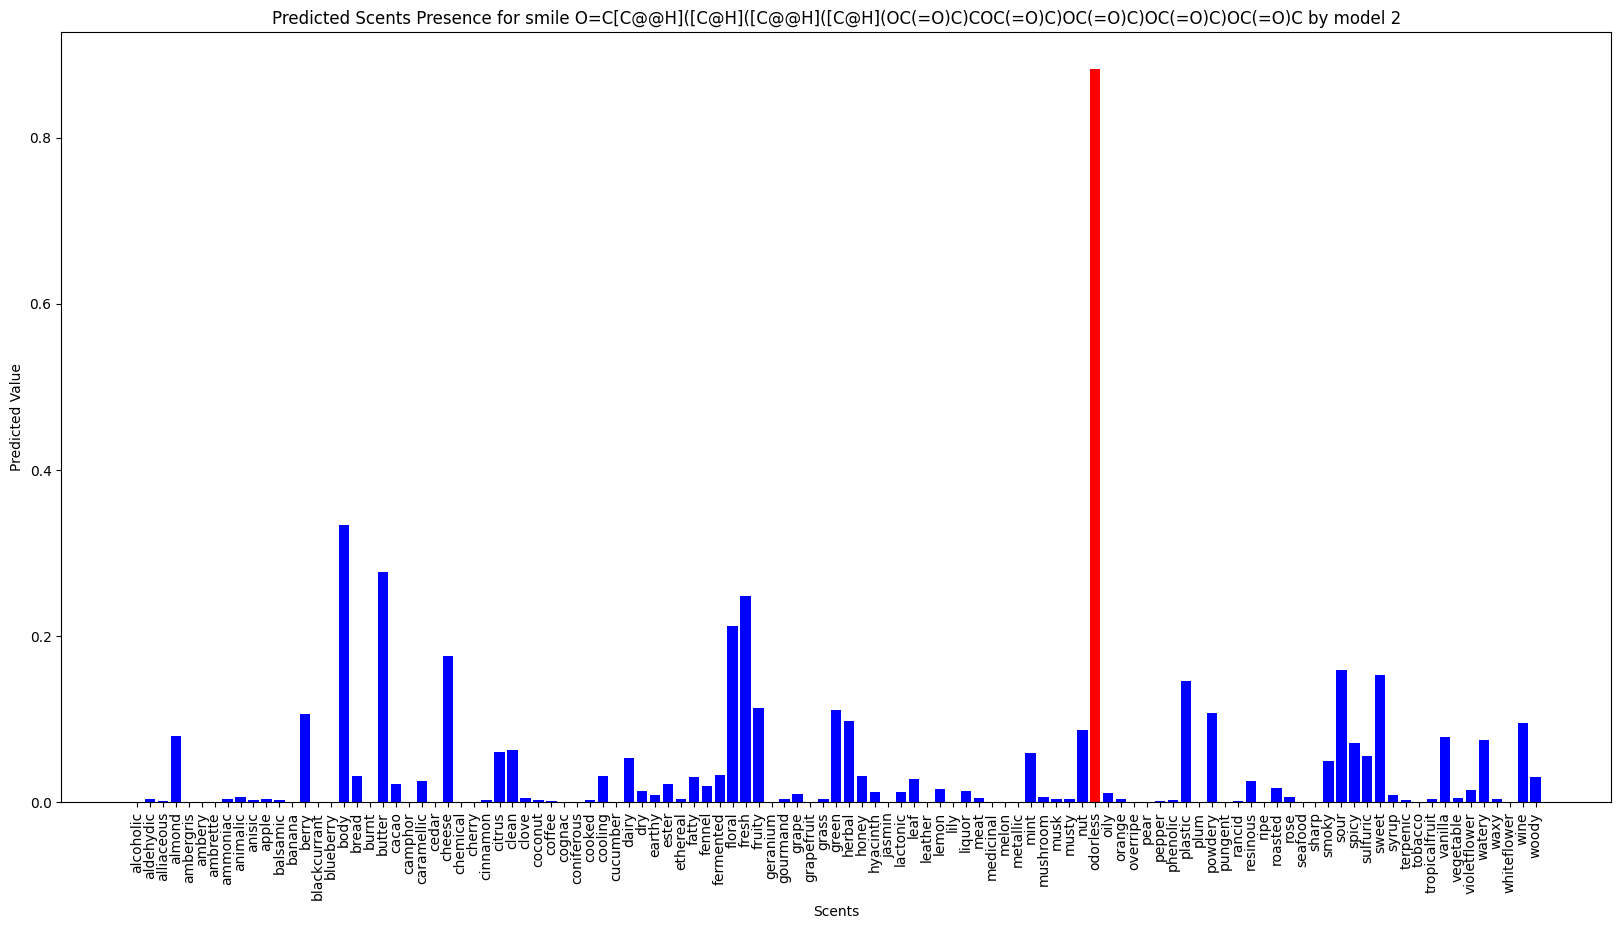

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


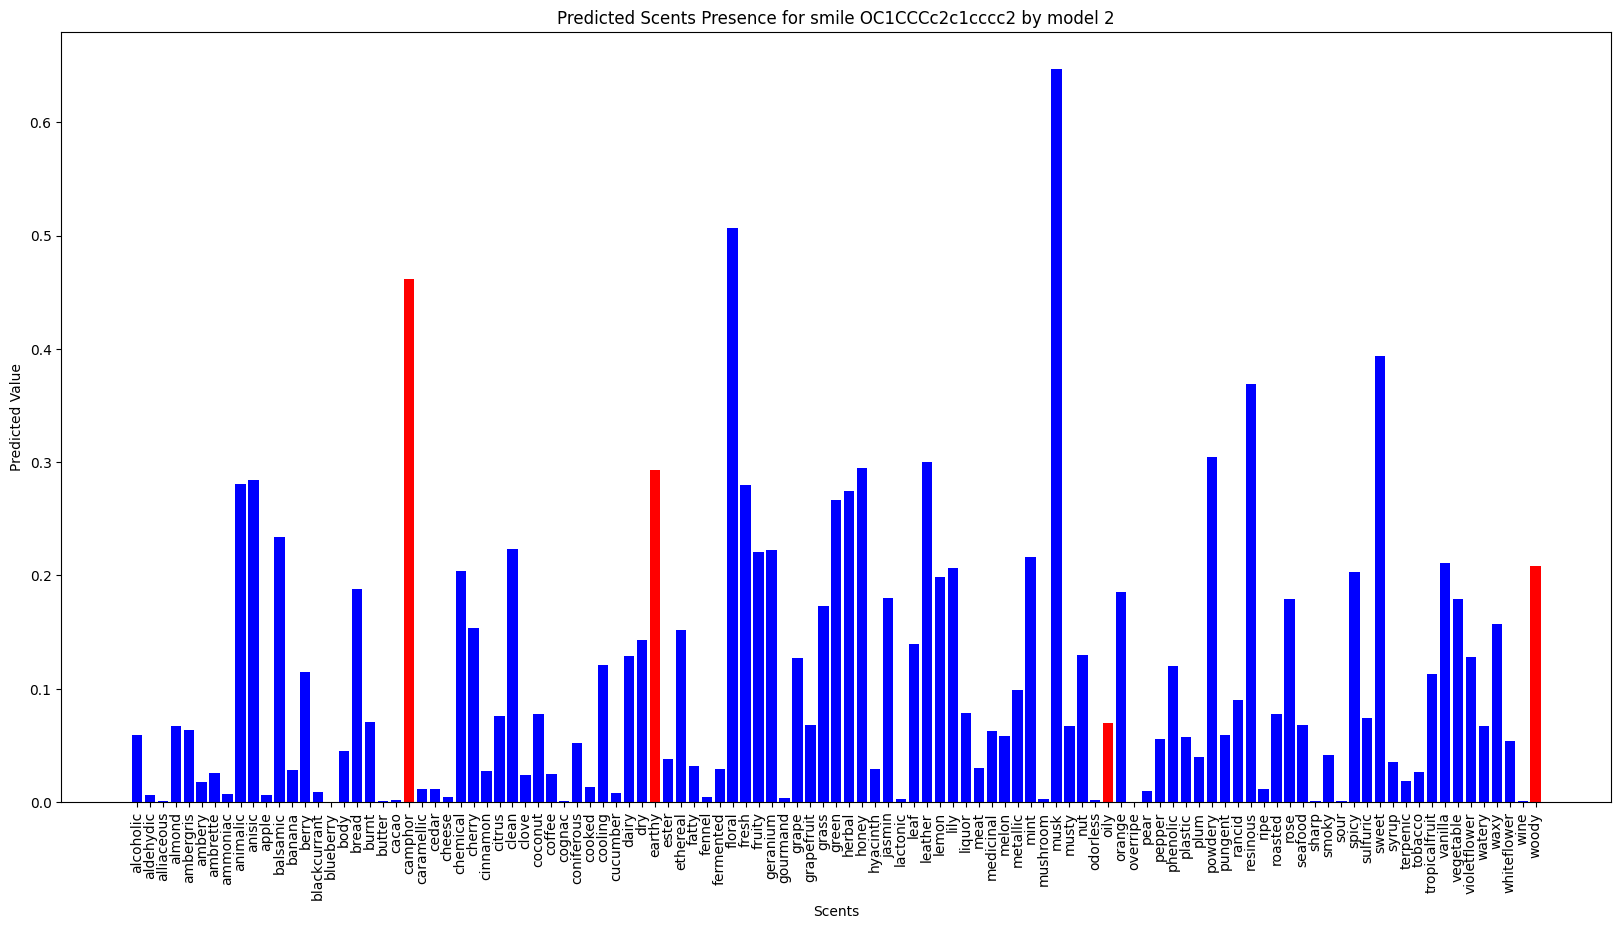

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 3
No0:


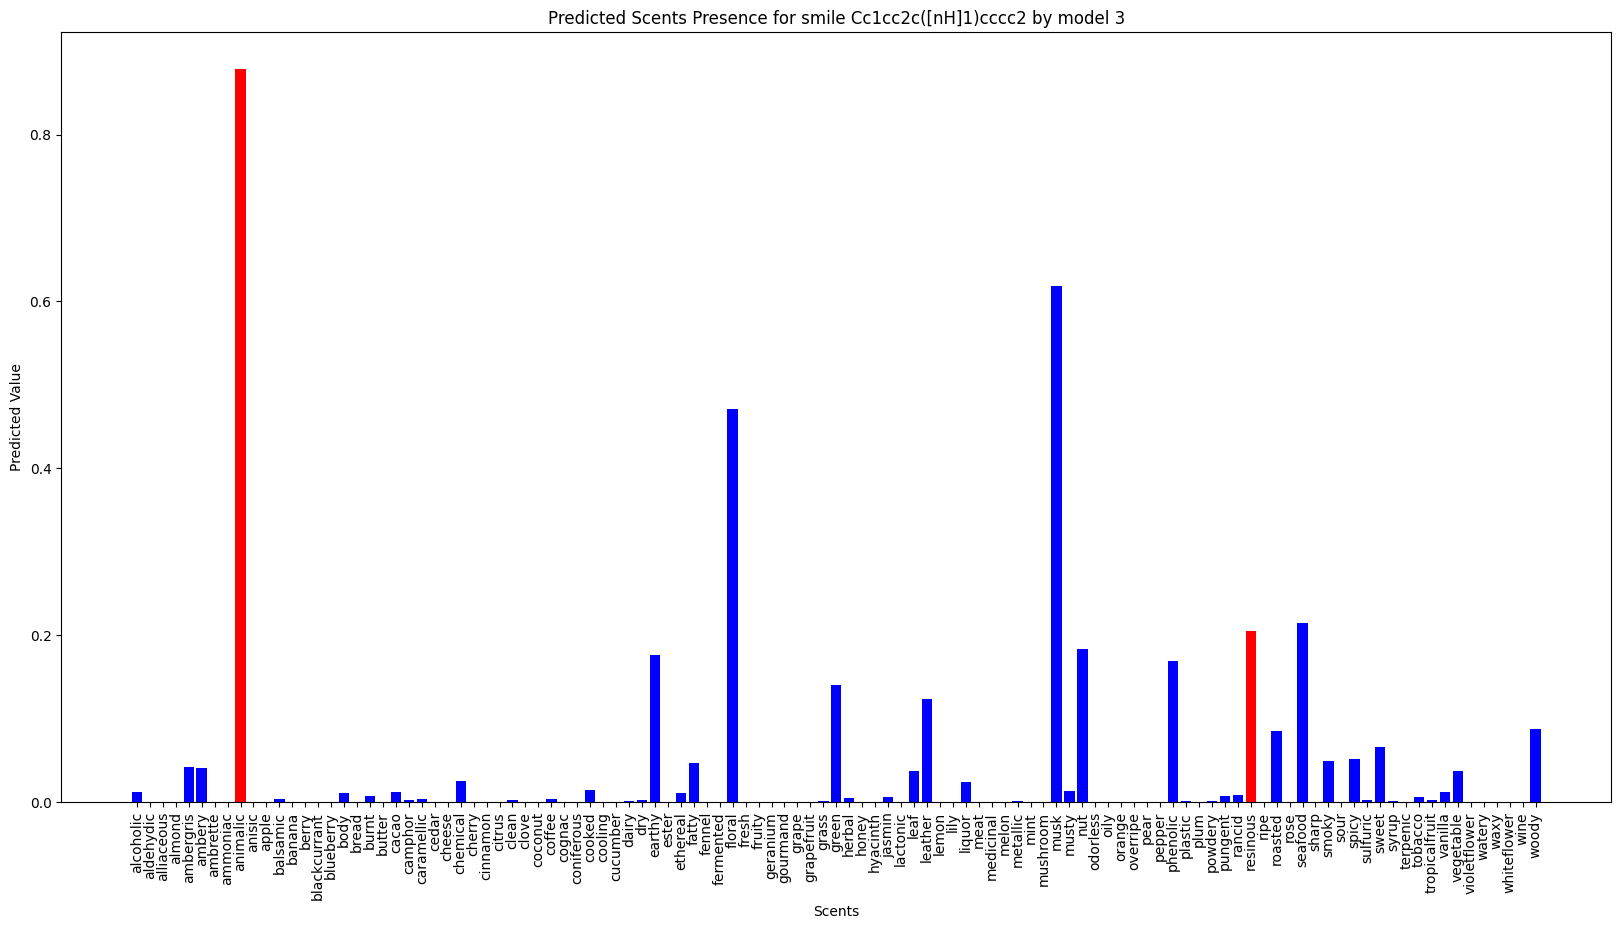

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


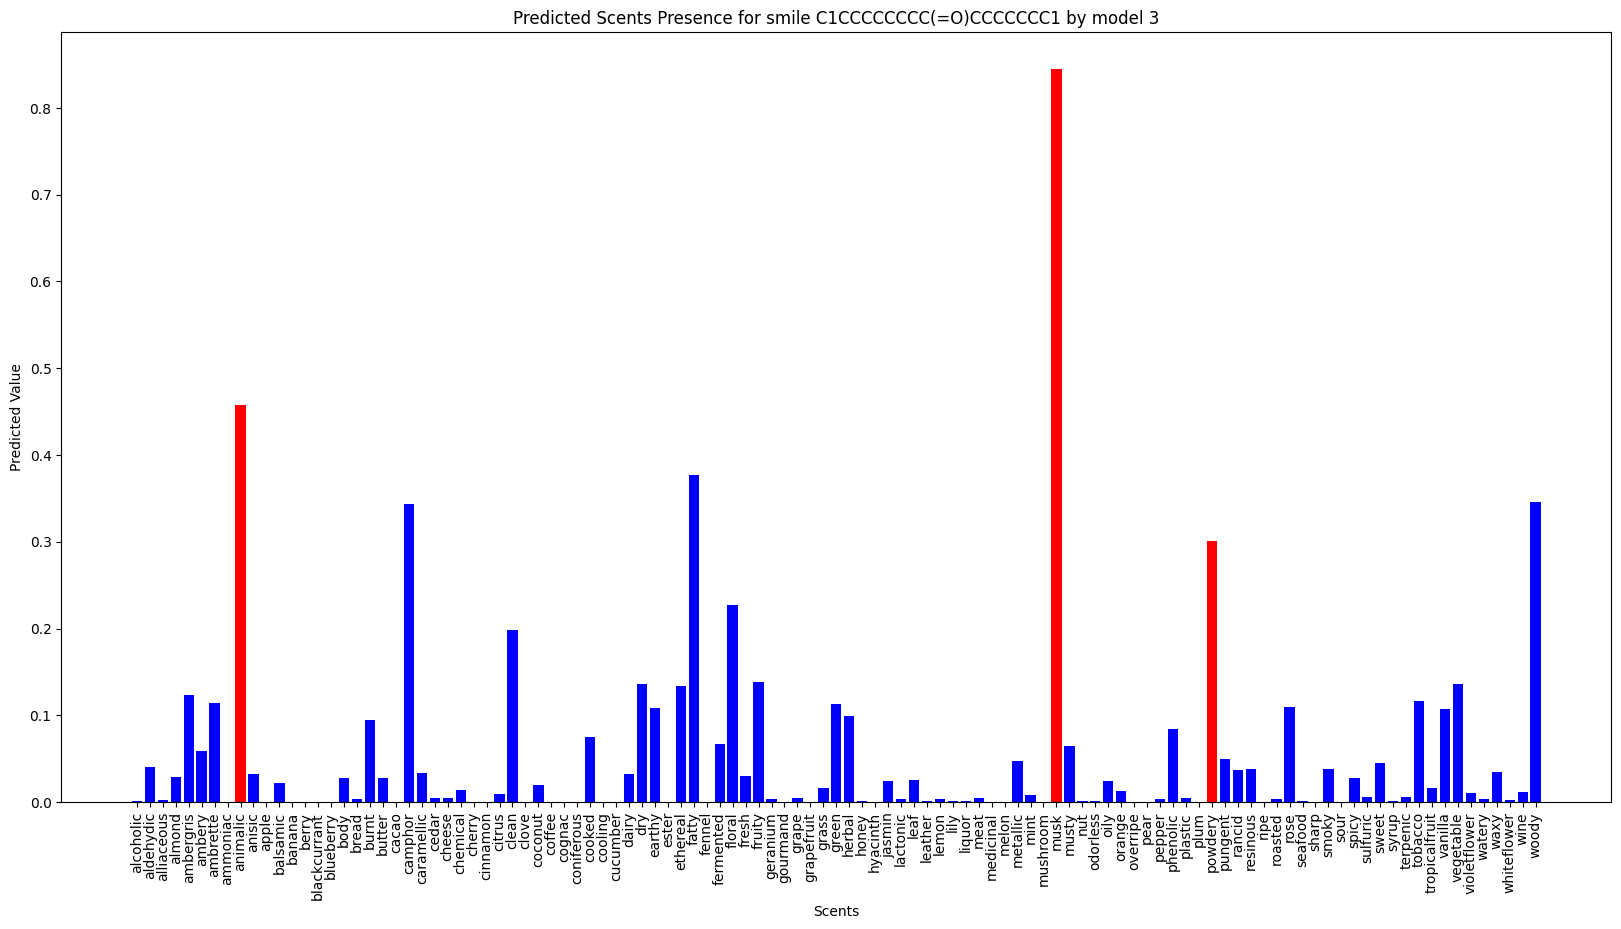

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


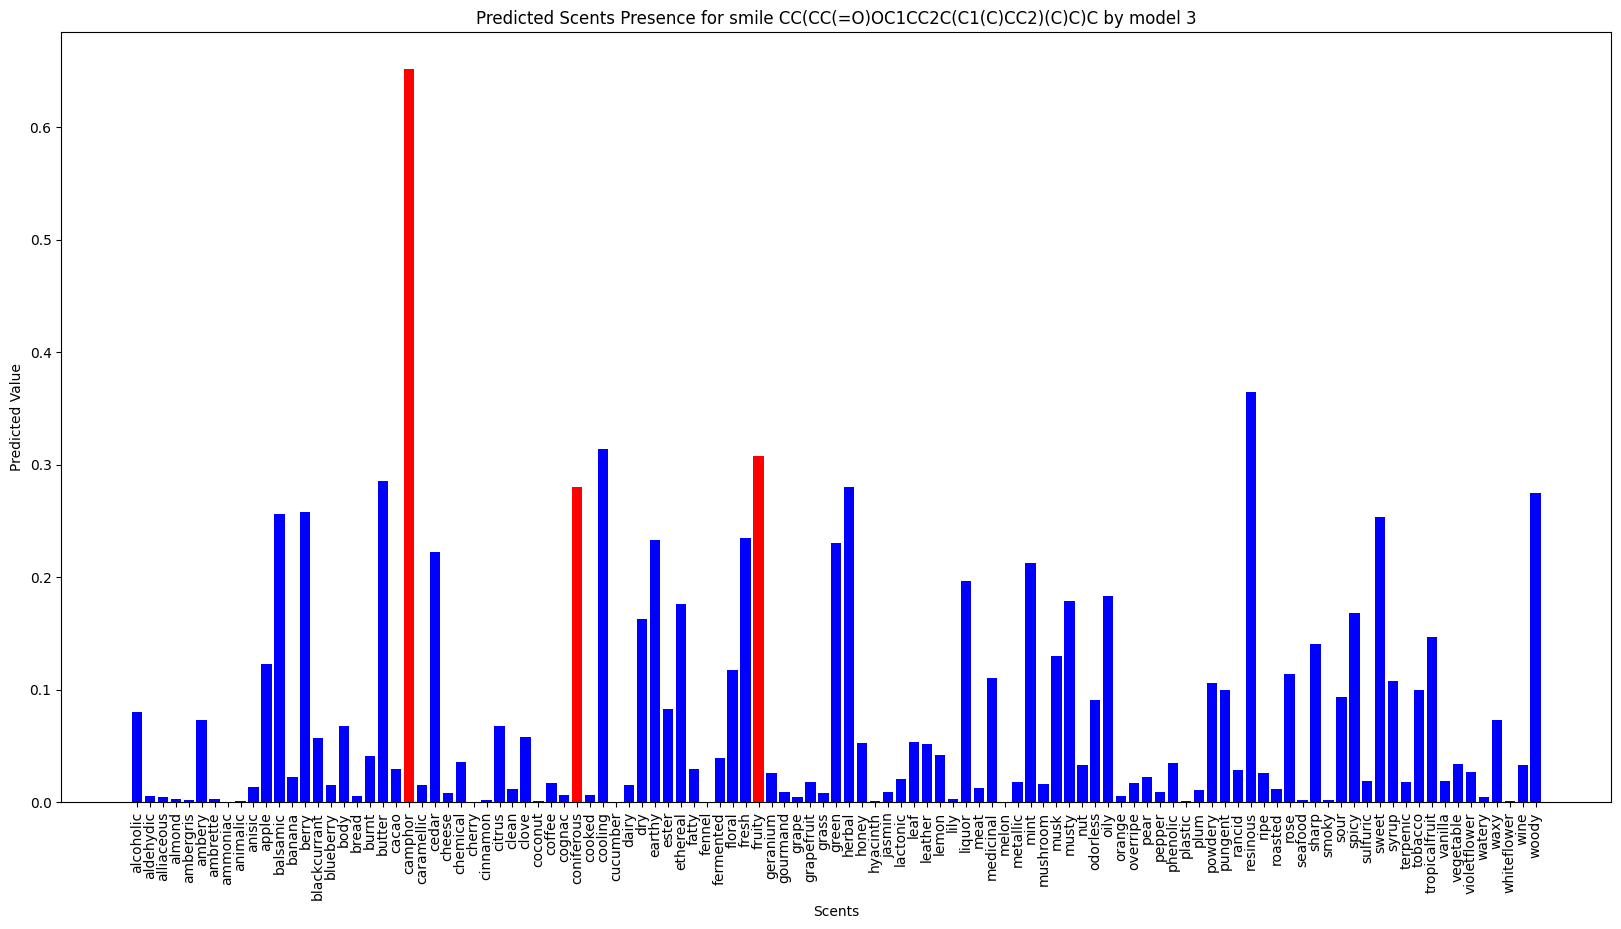

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


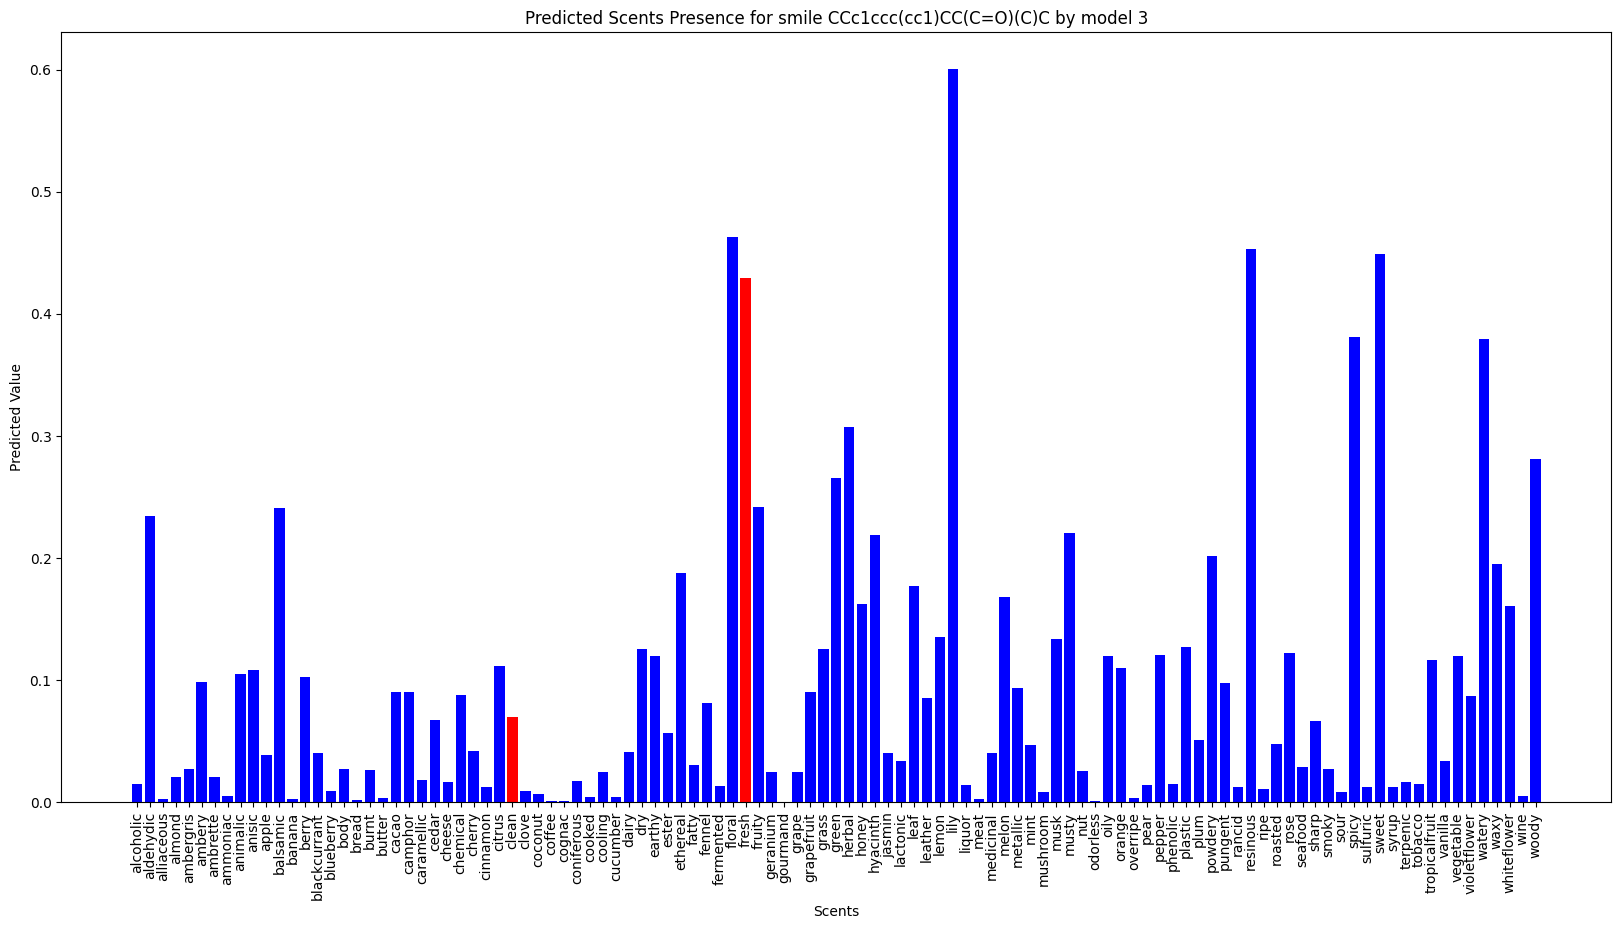

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


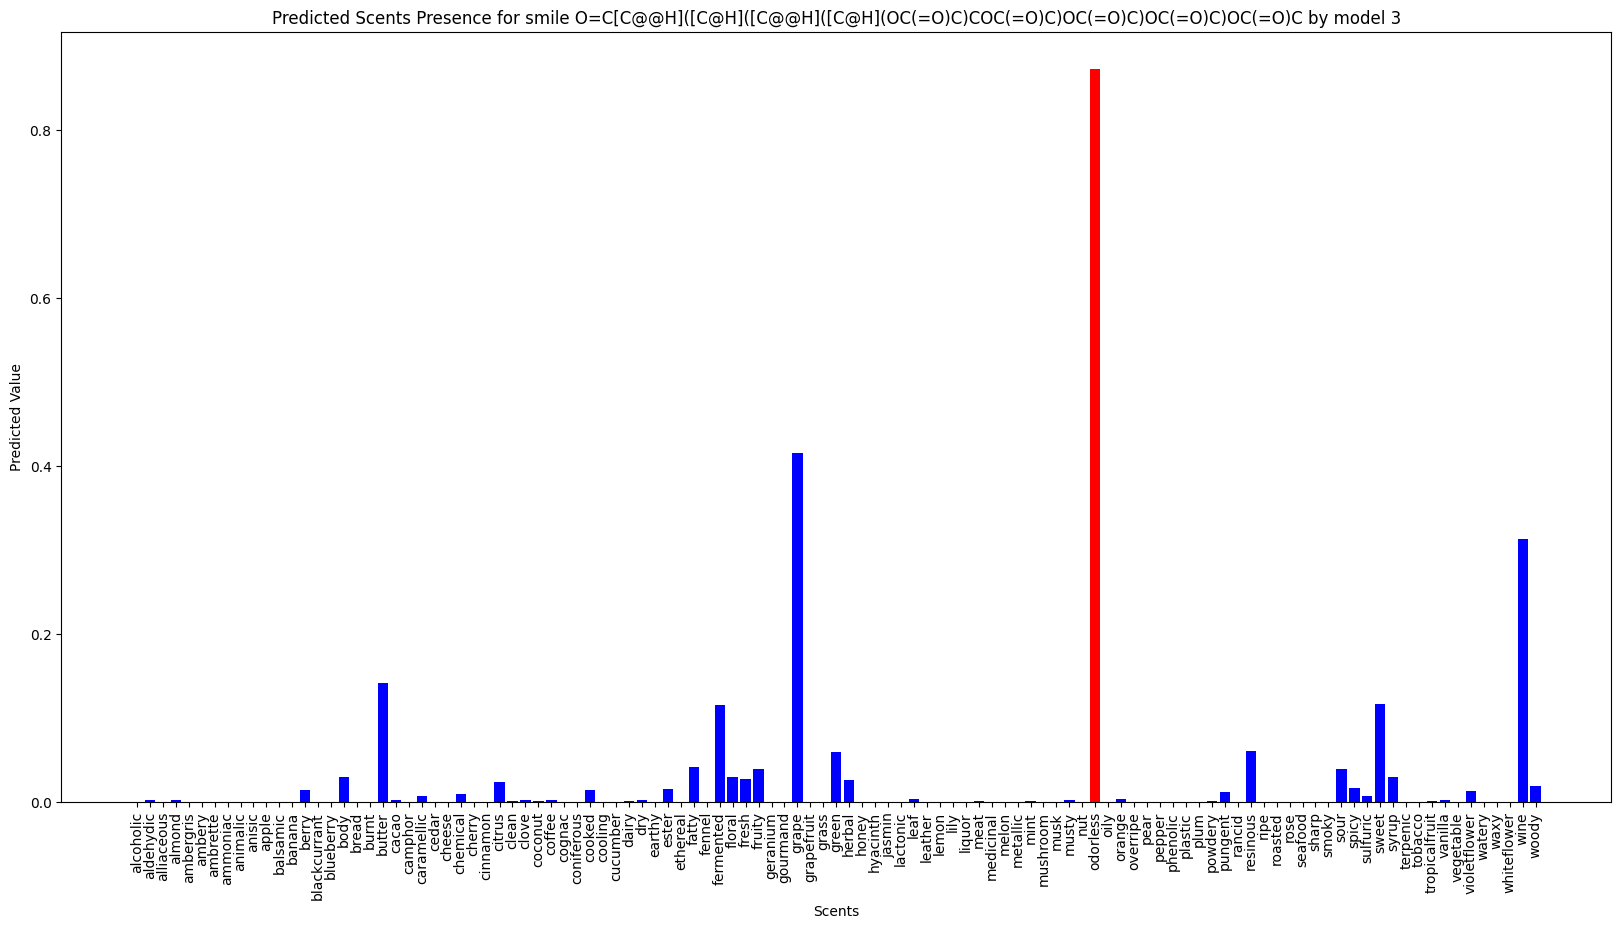

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


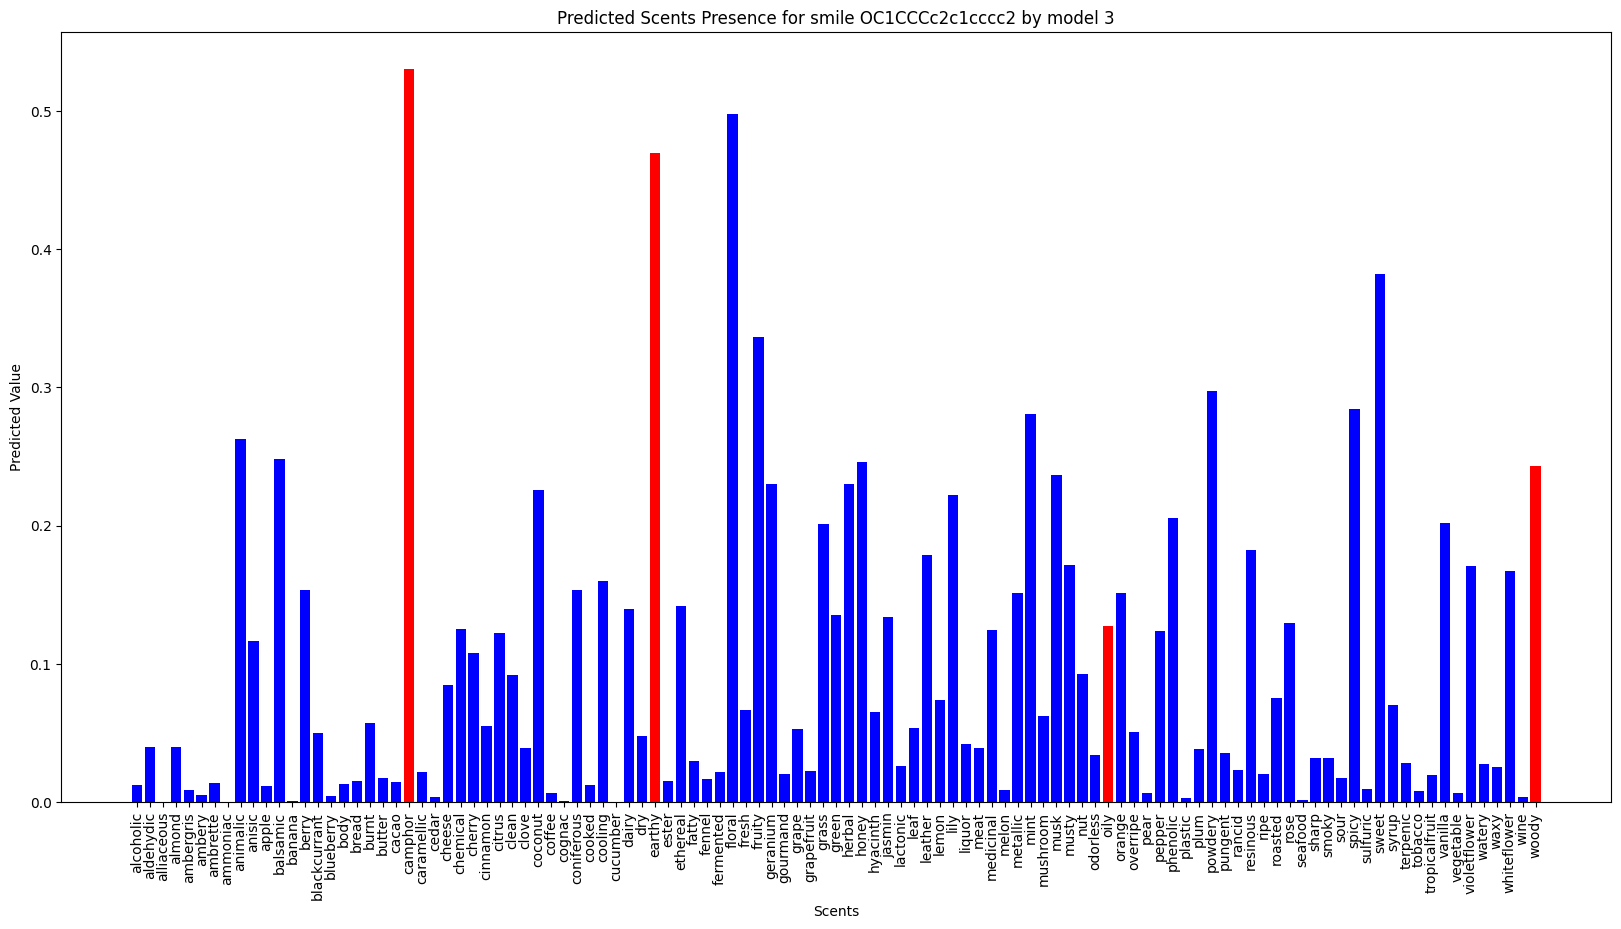

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 4
No0:


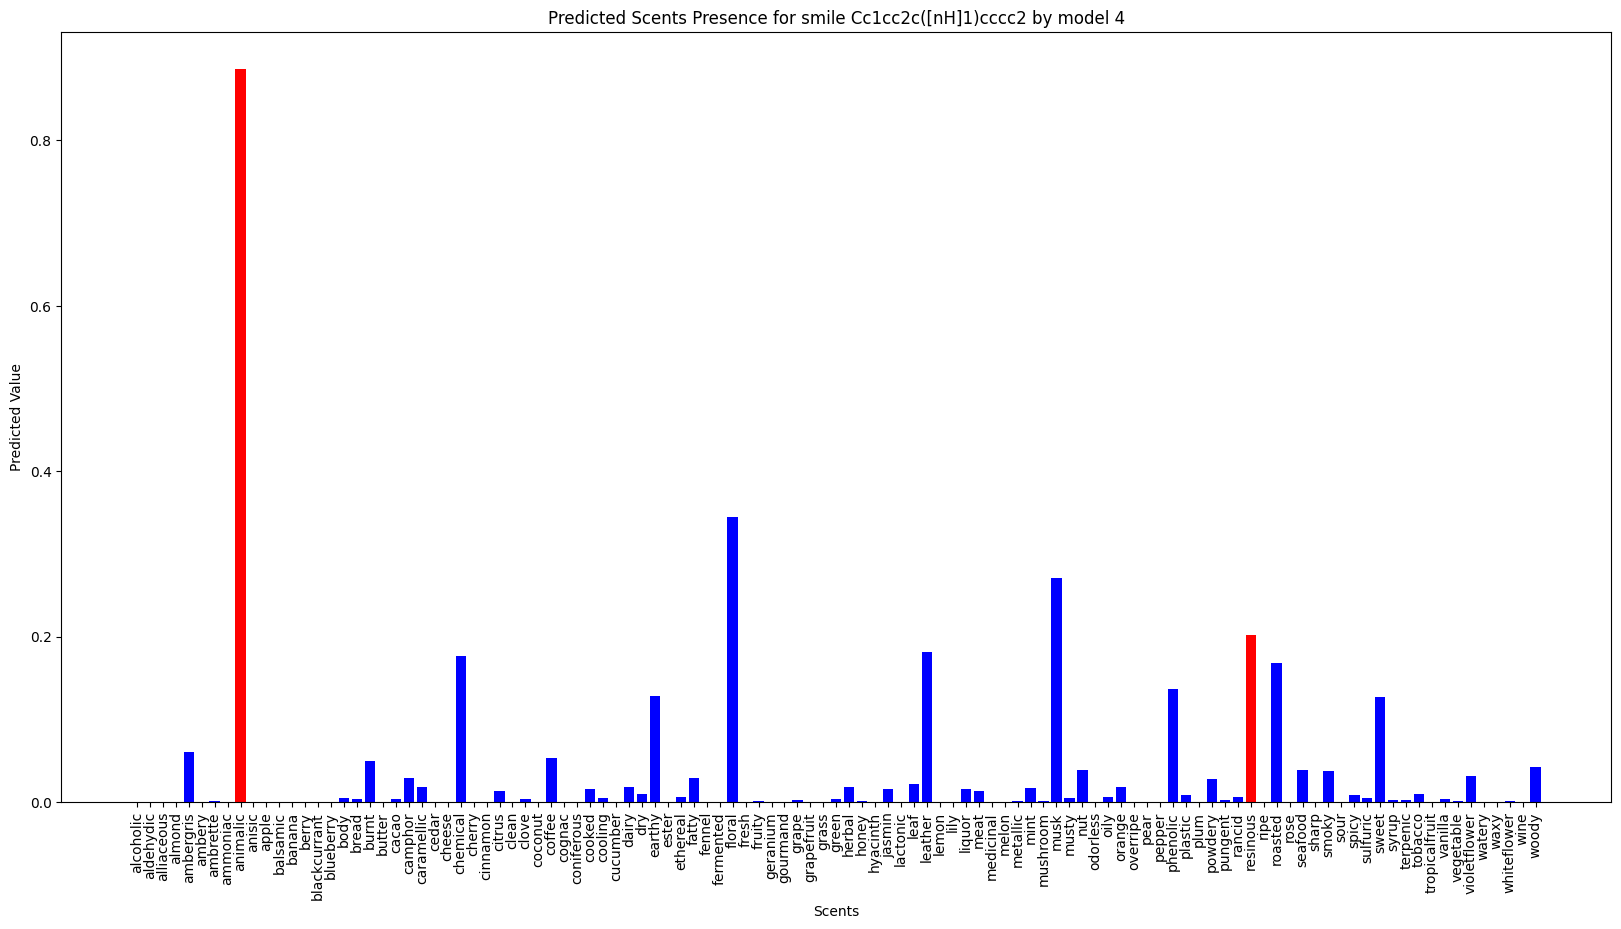

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


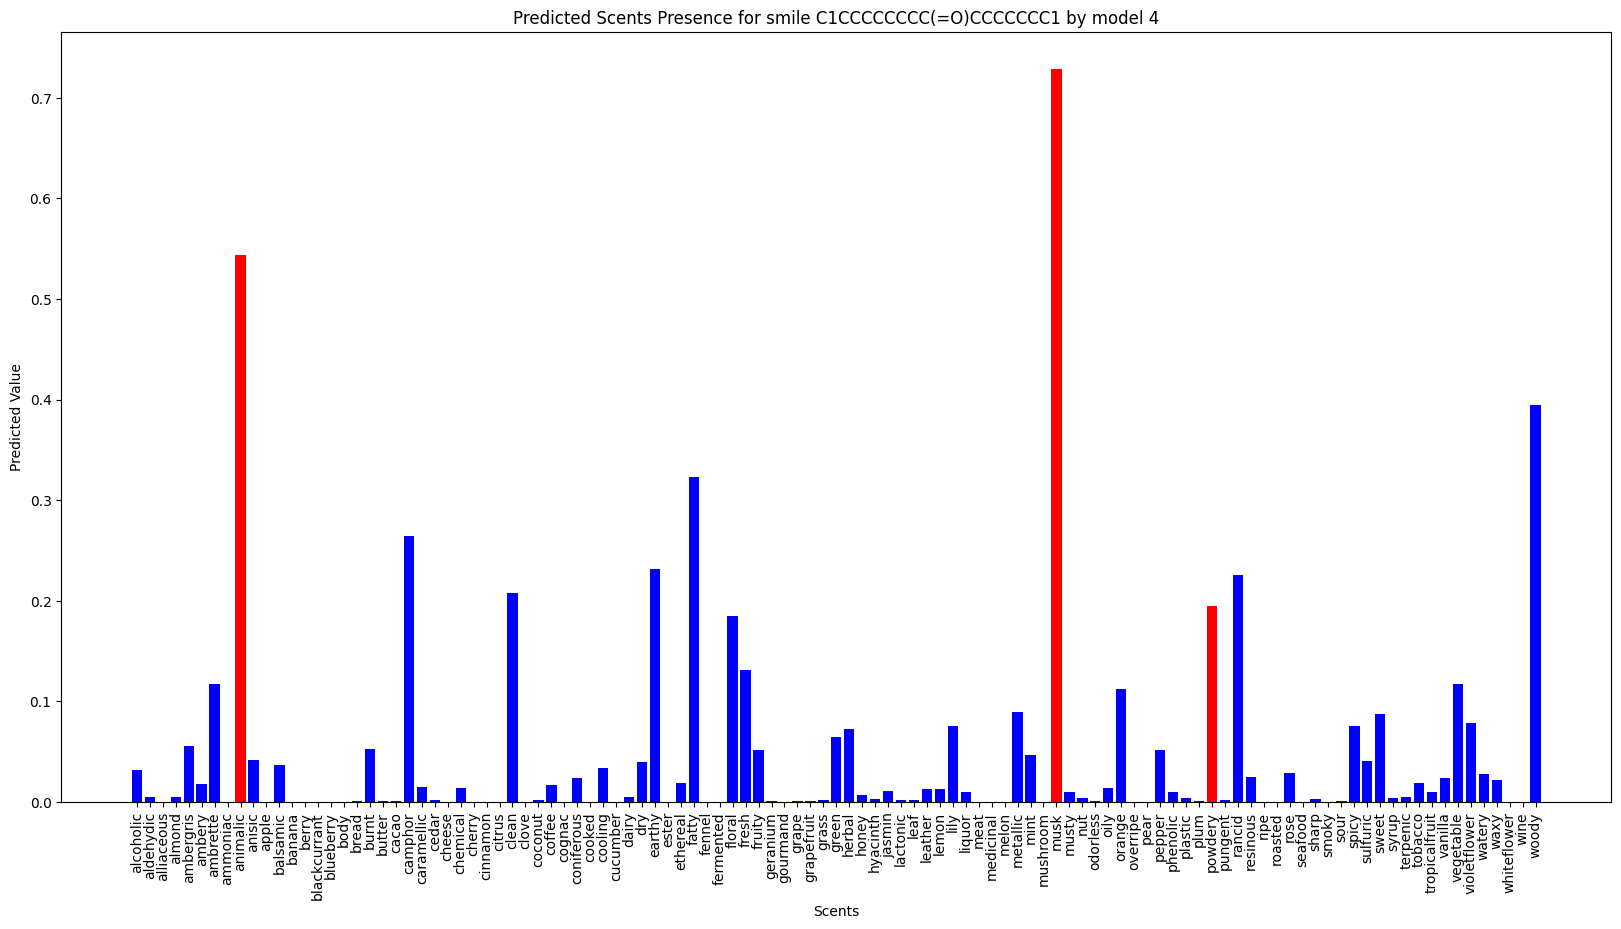

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


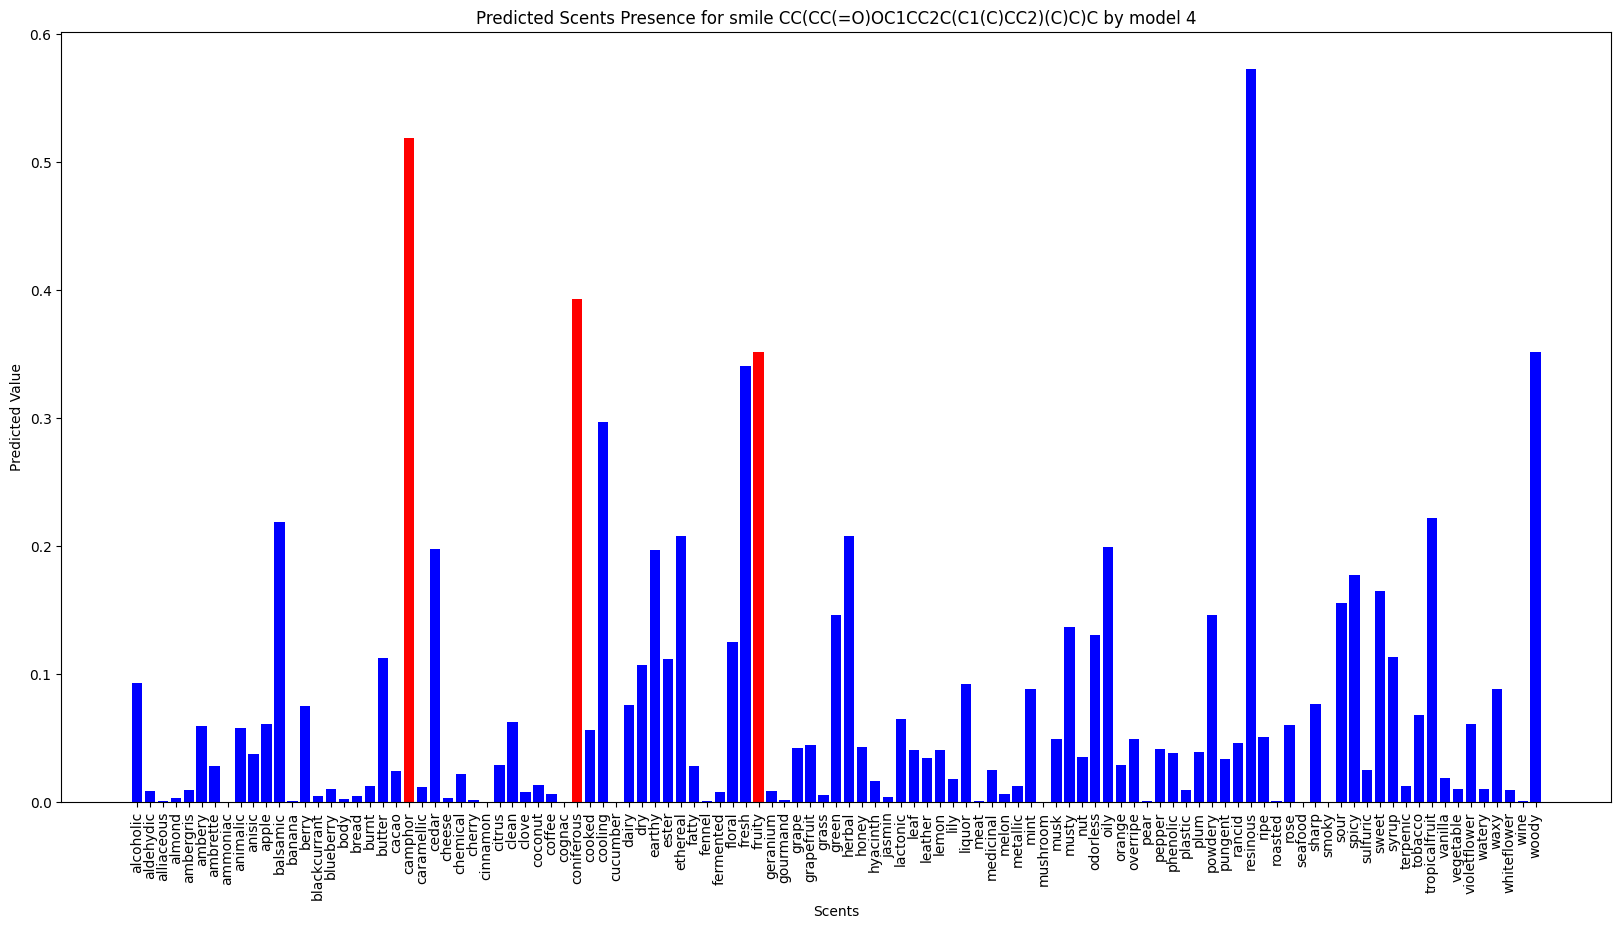

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


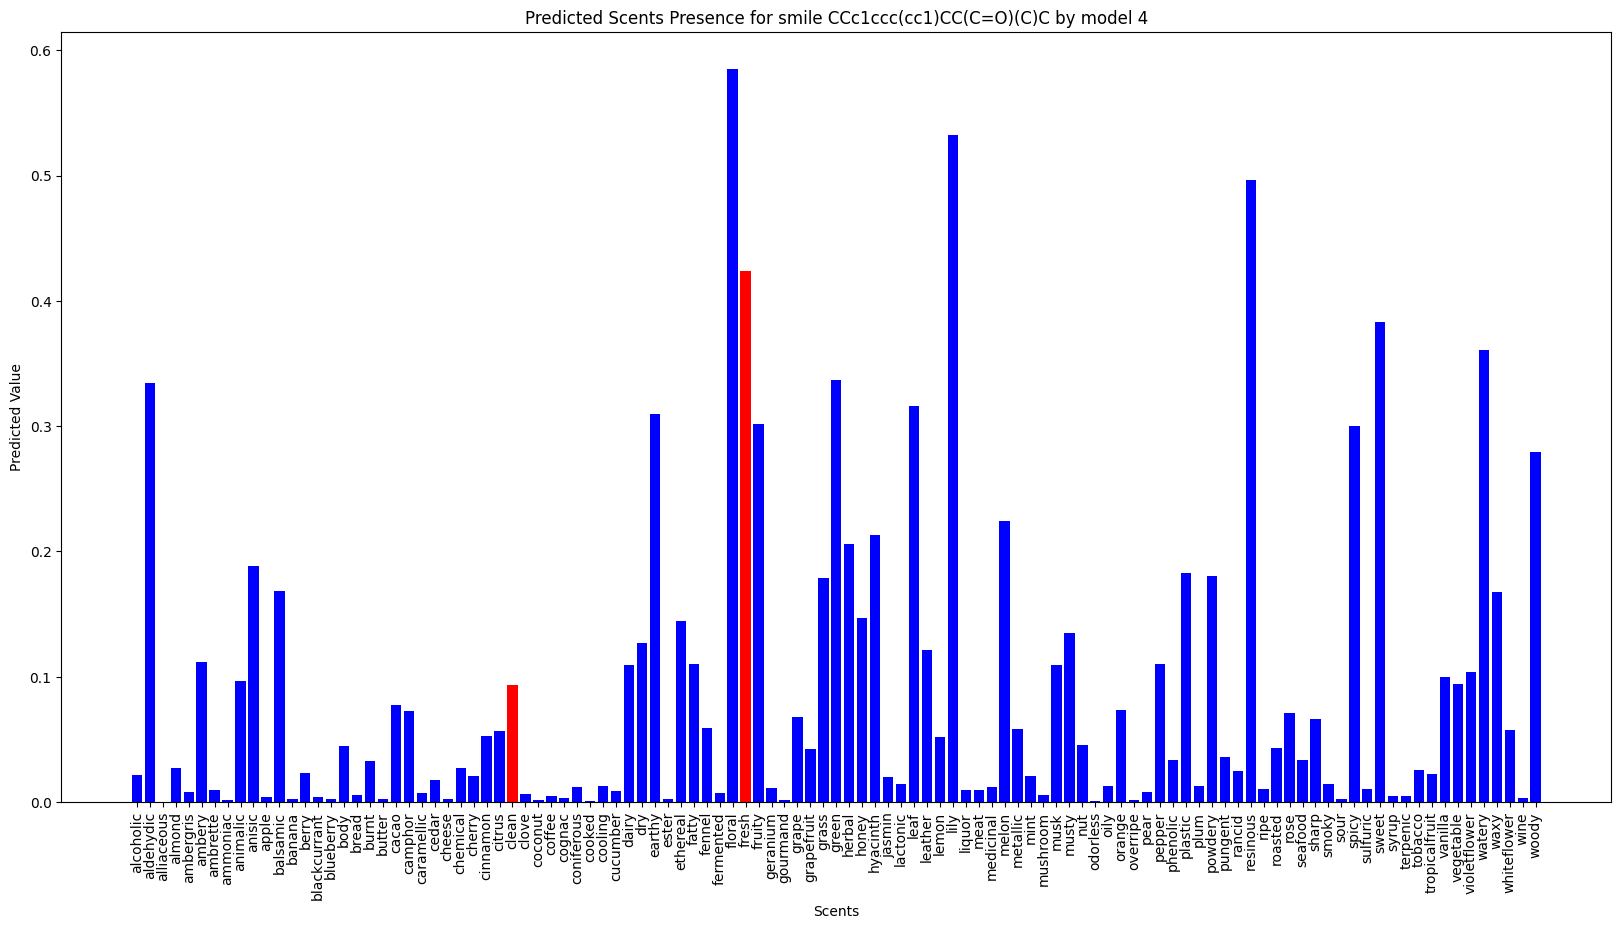

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


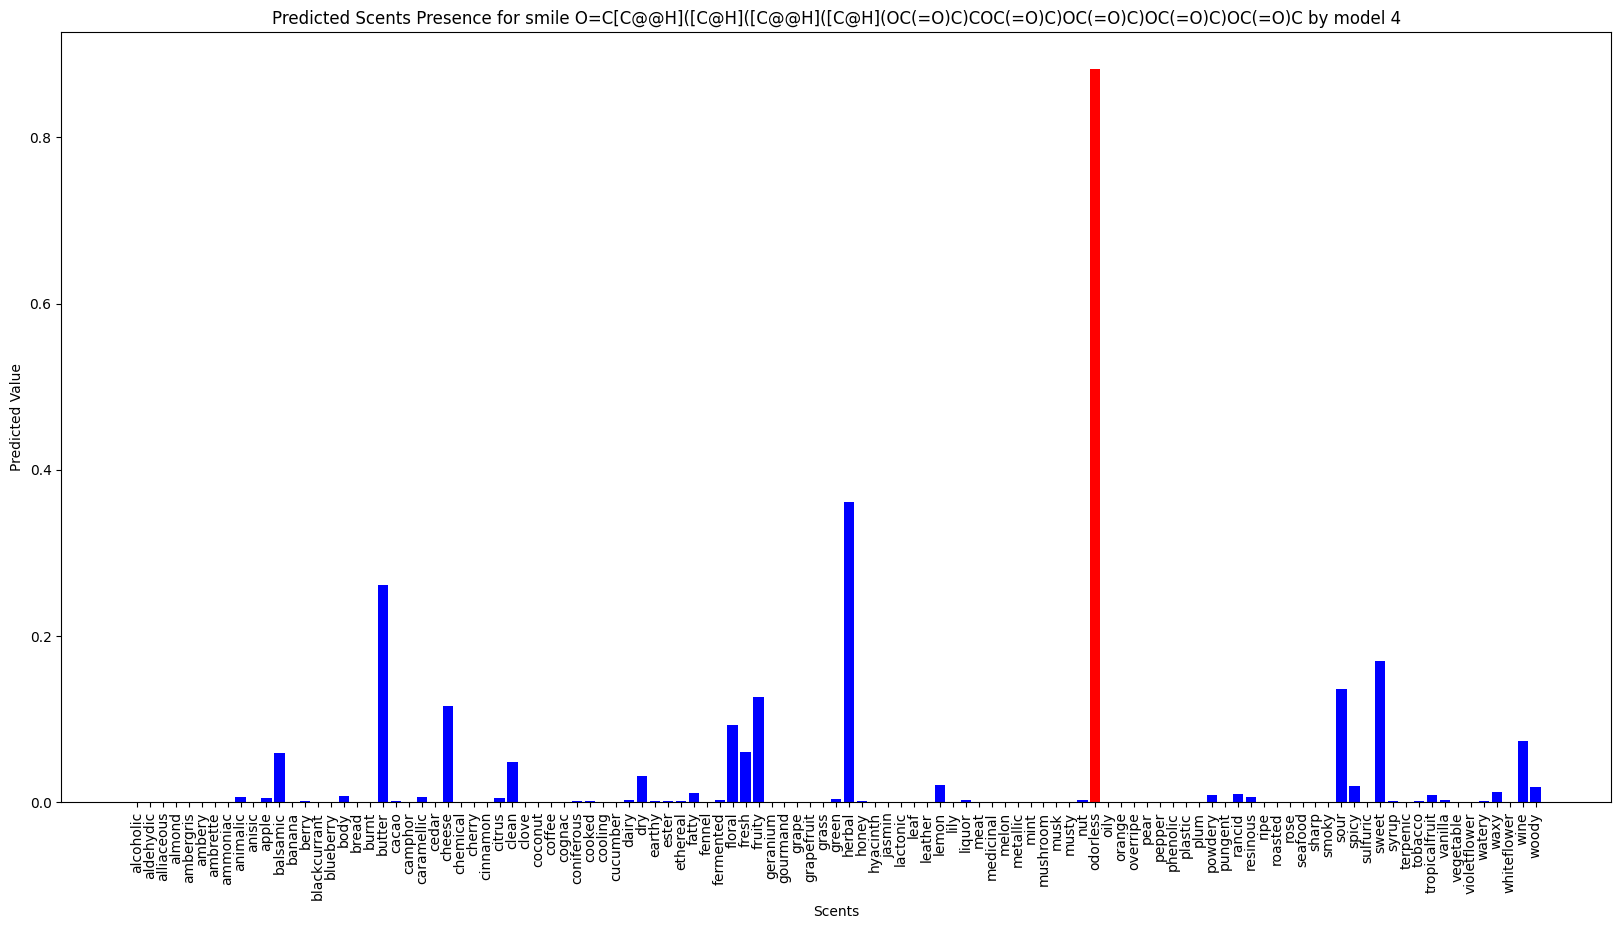

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


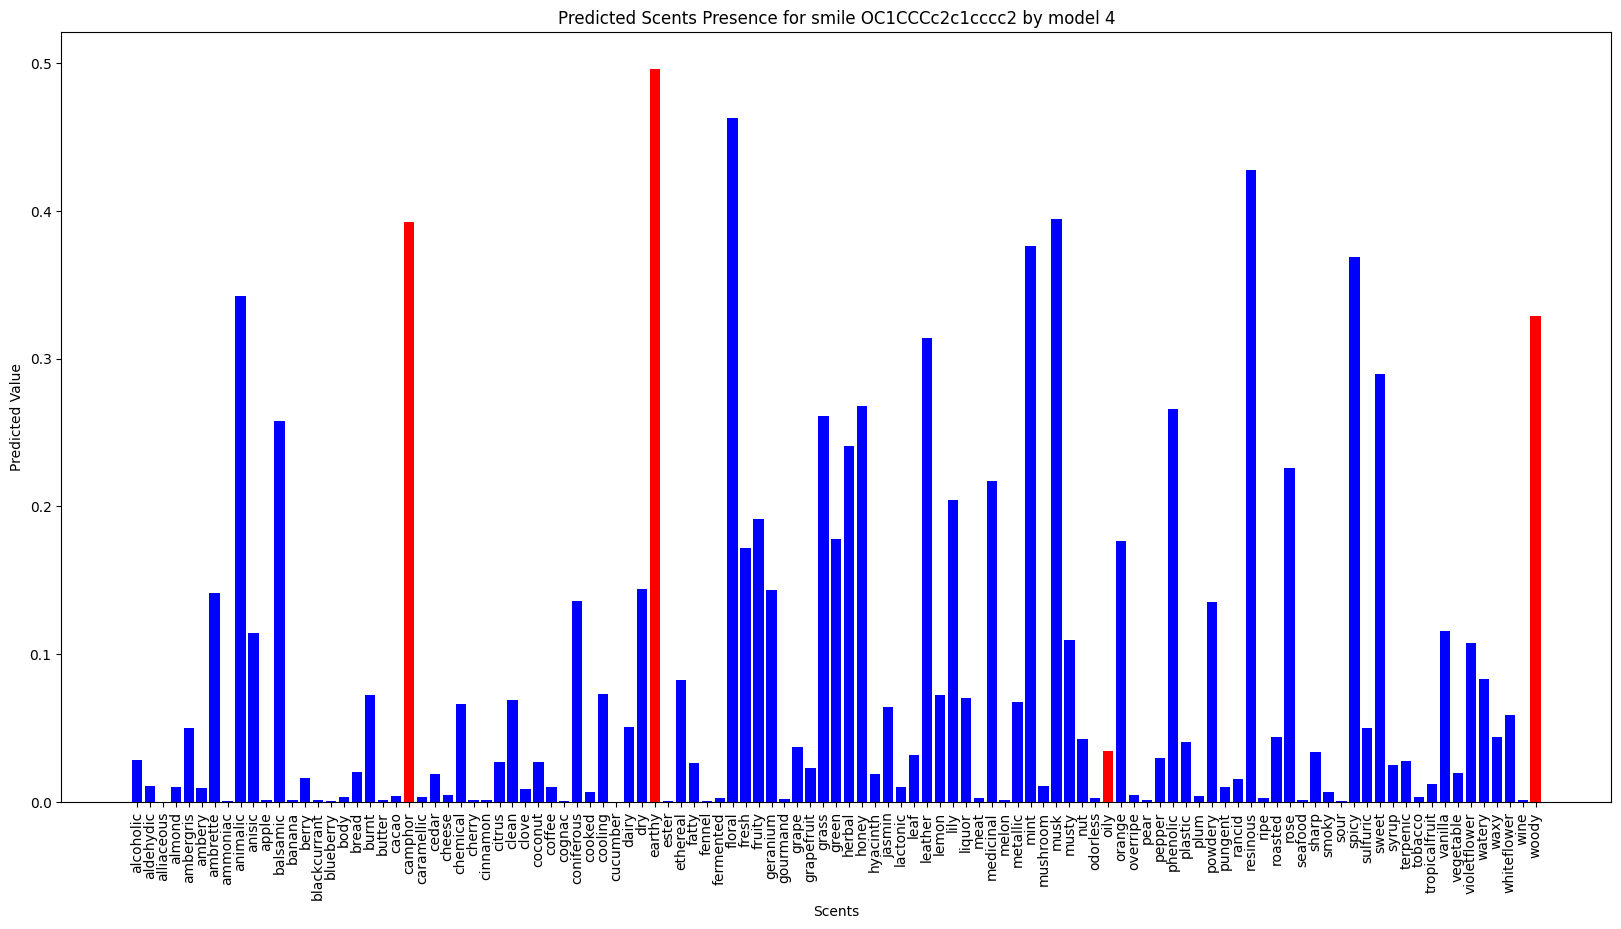

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 5
No0:


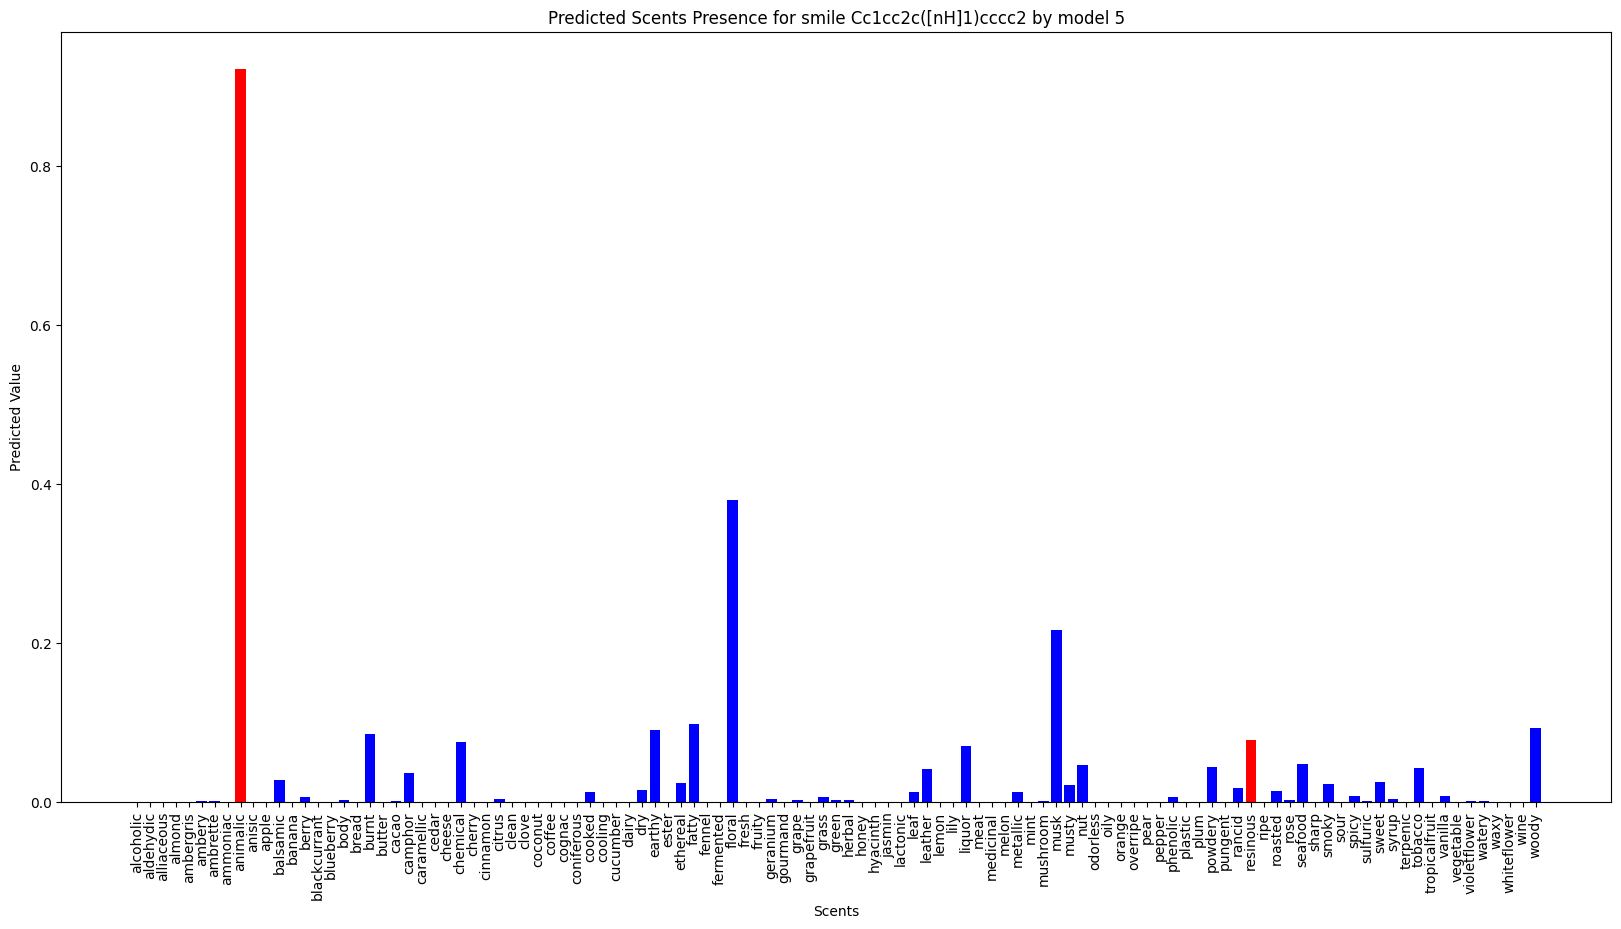

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


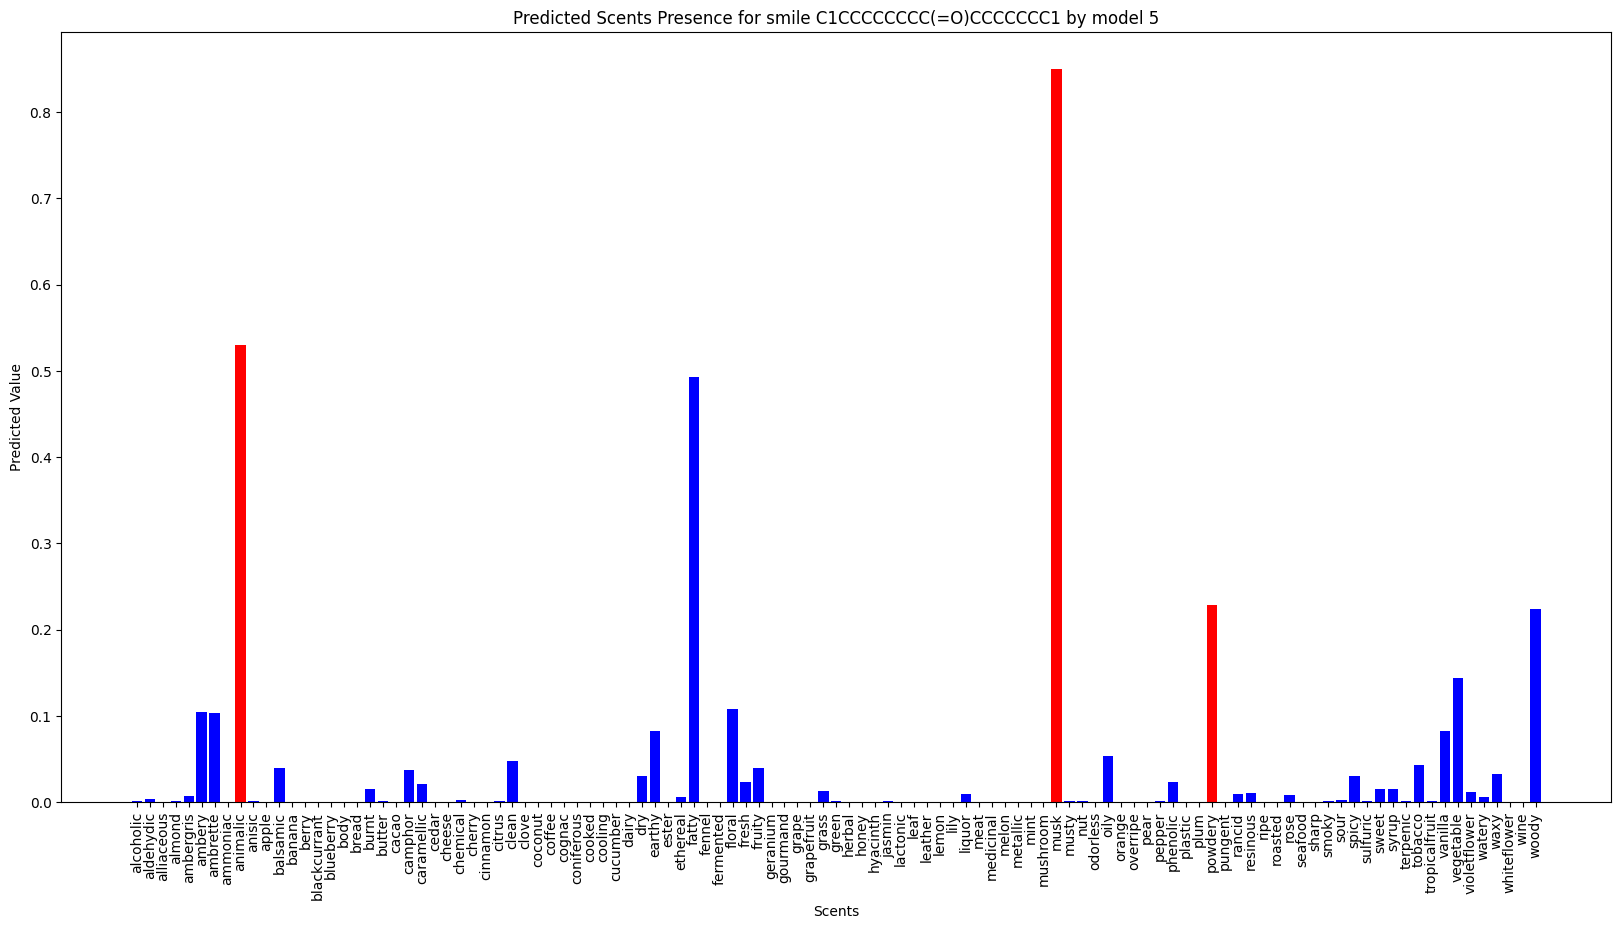

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


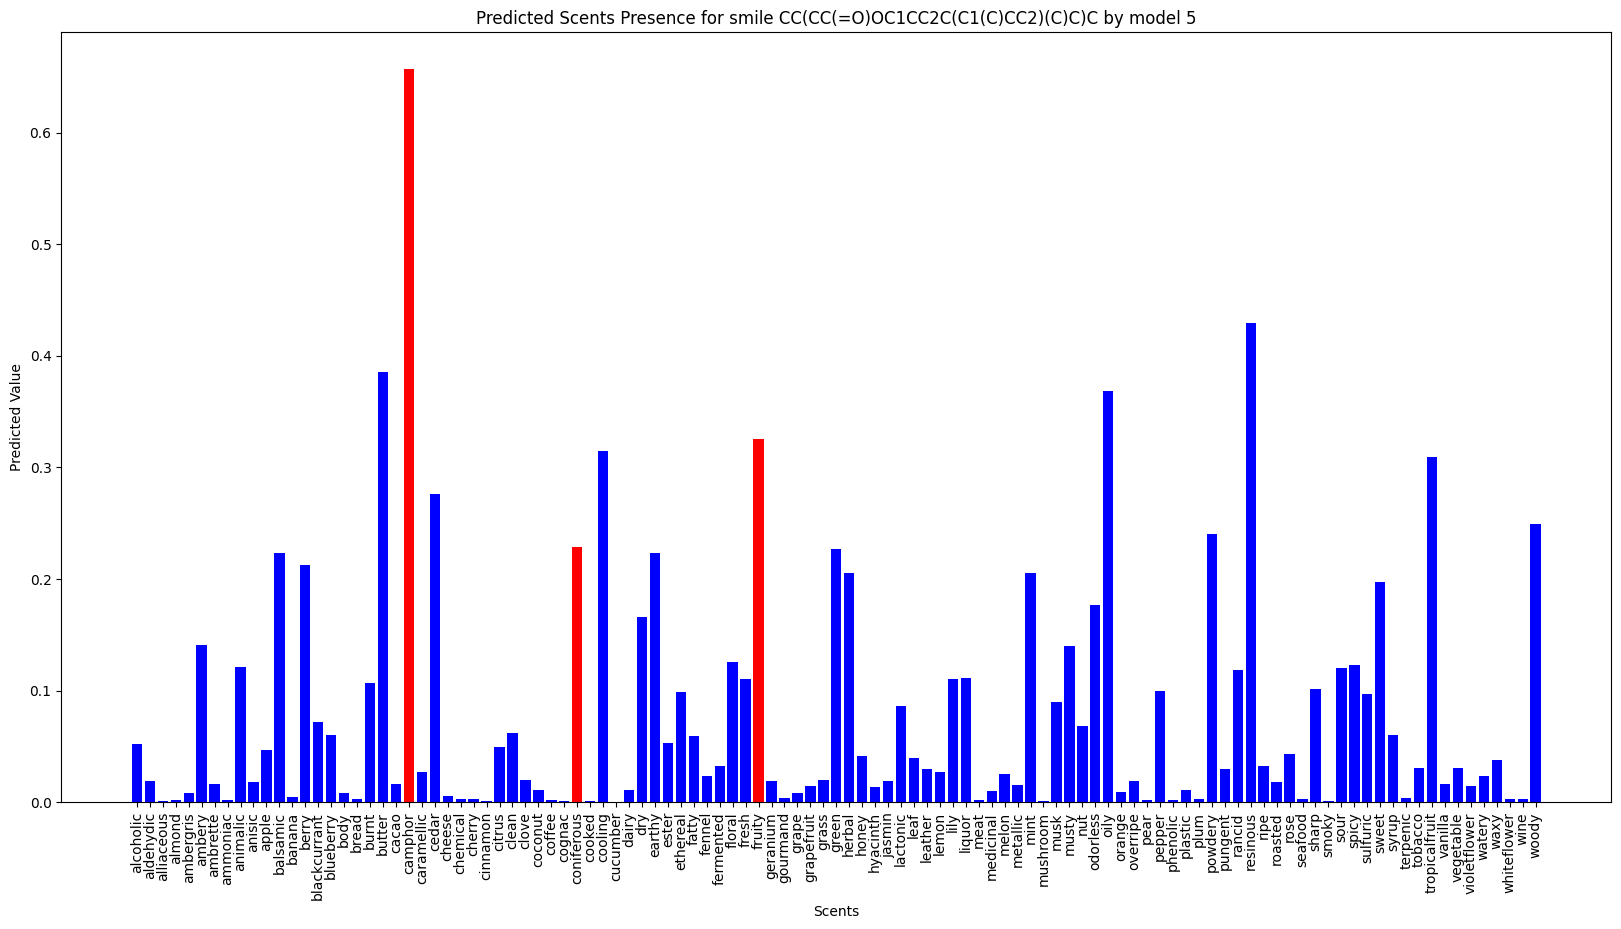

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


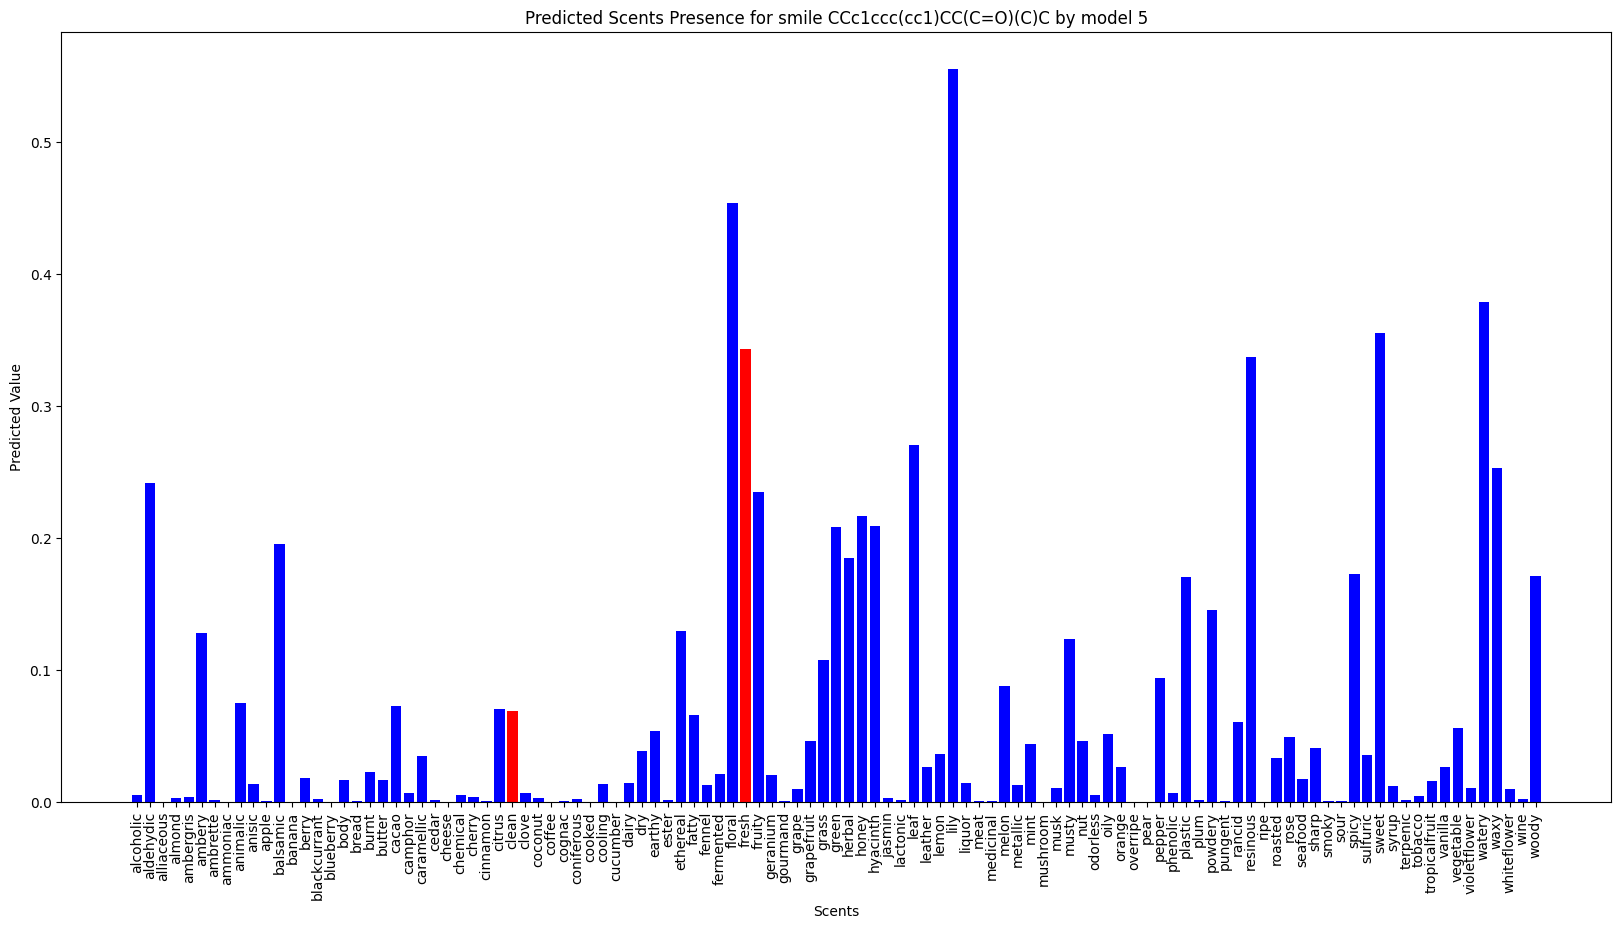

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


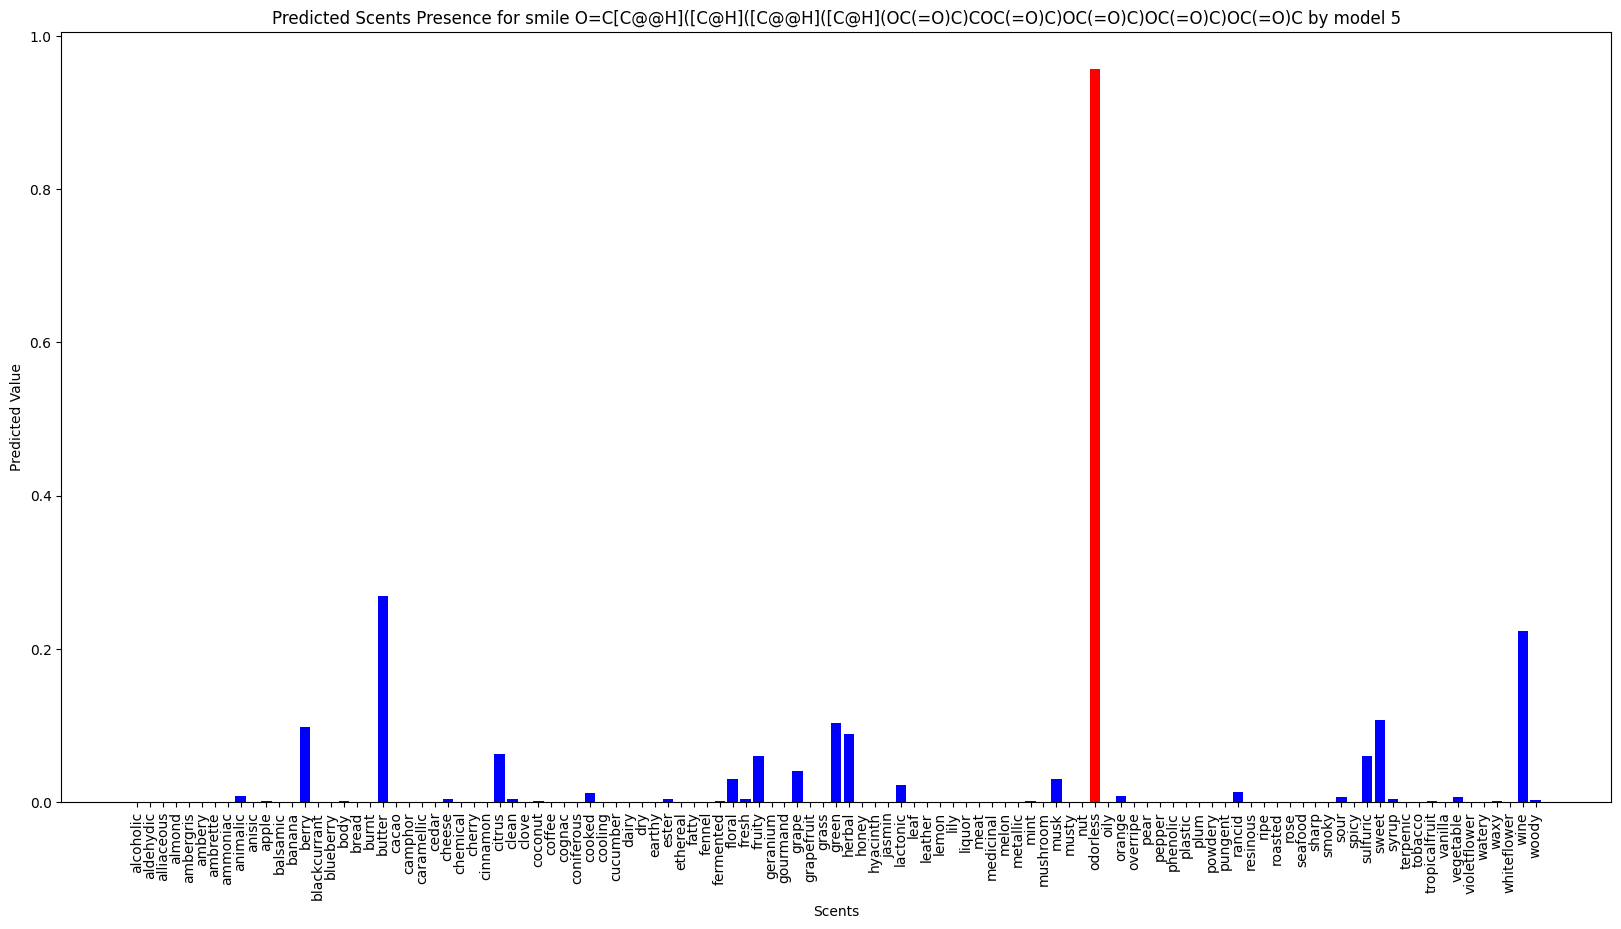

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


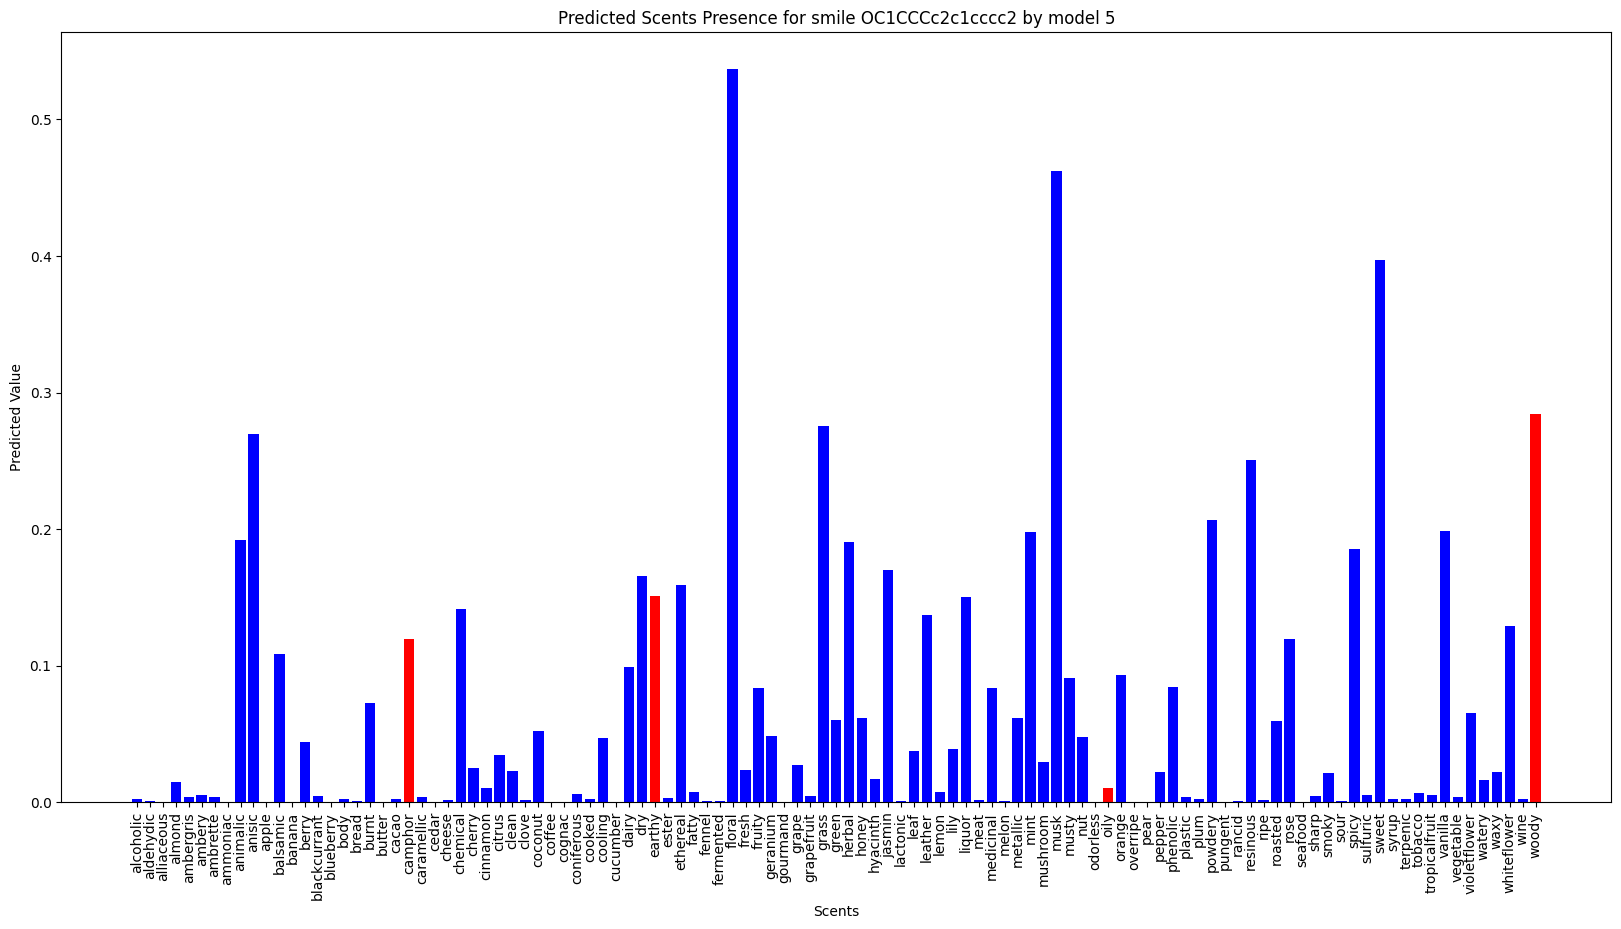

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 6
No0:


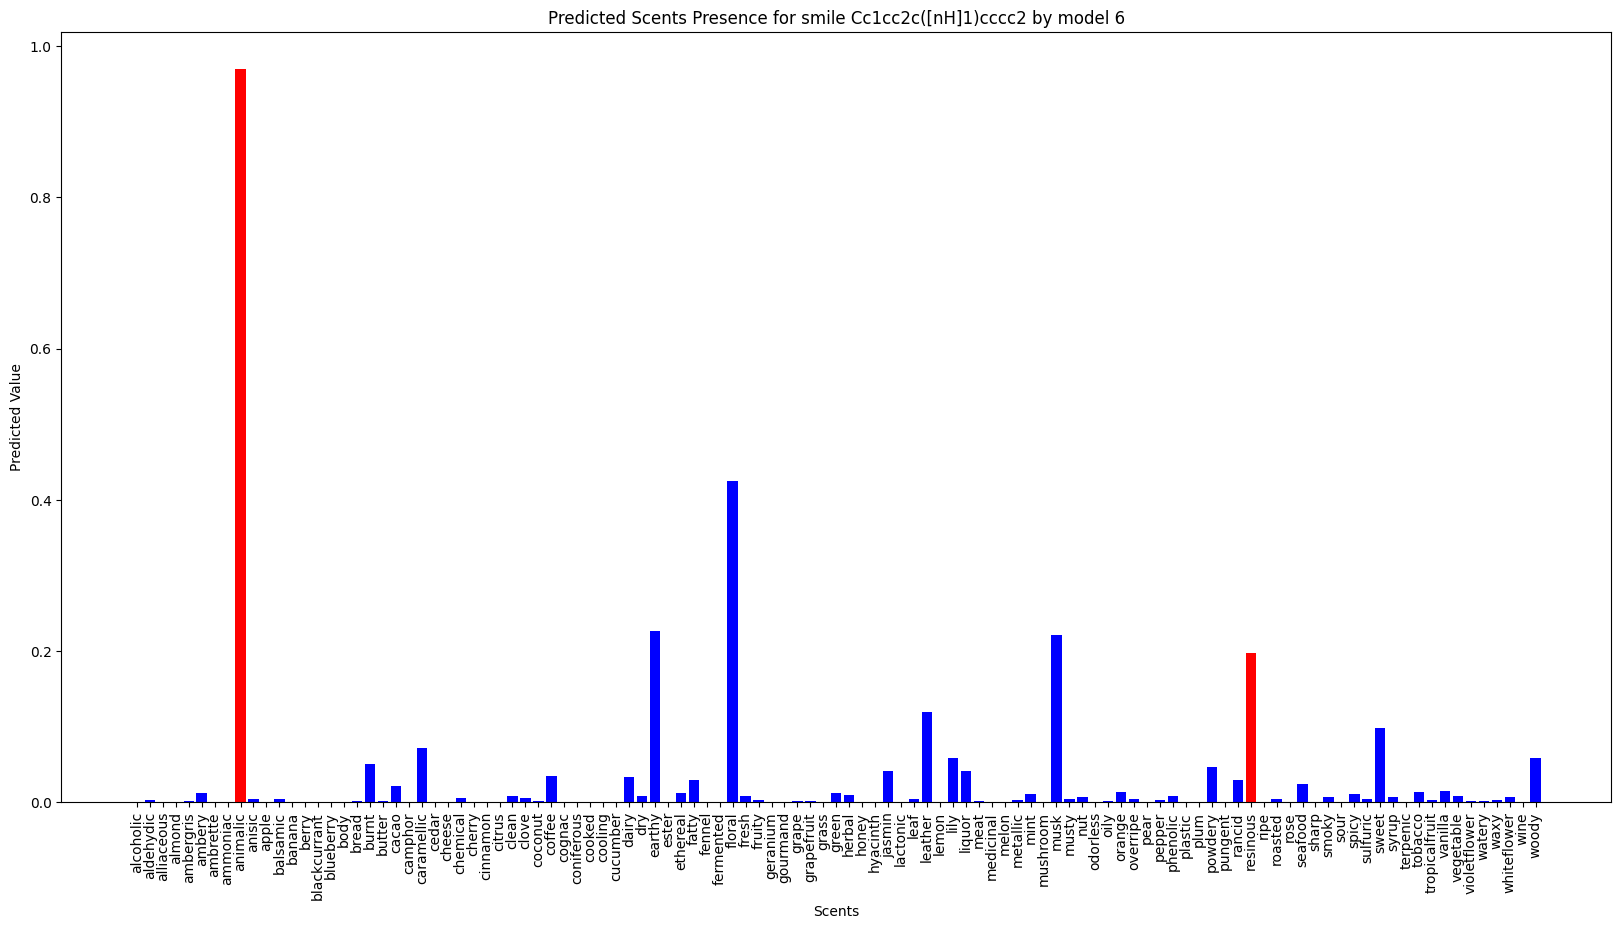

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


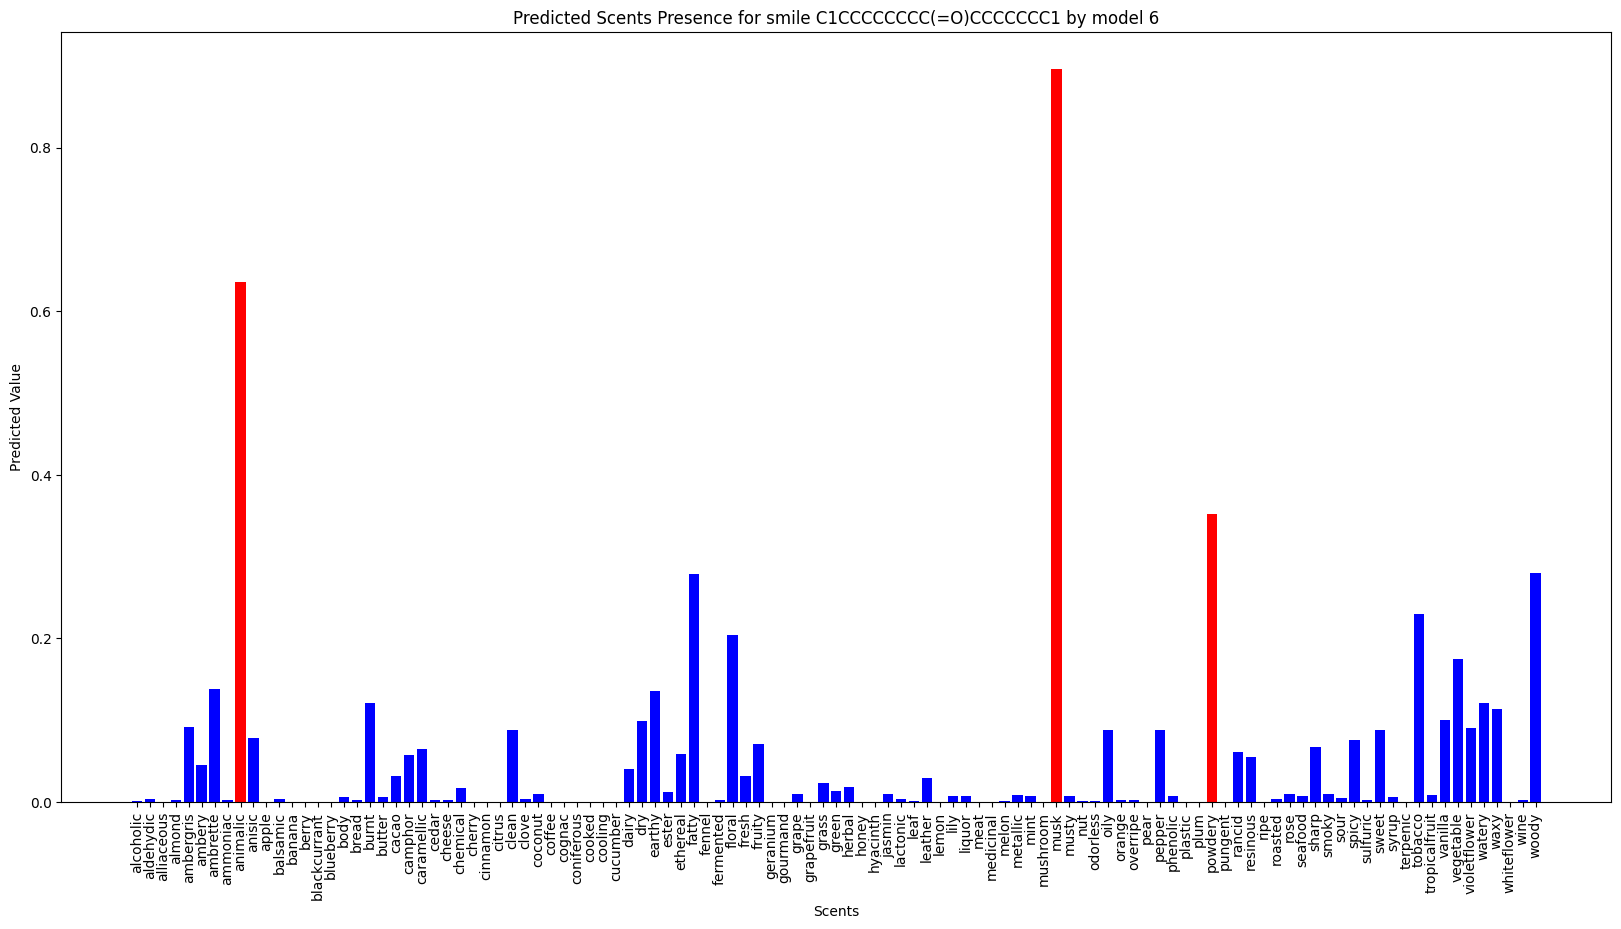

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


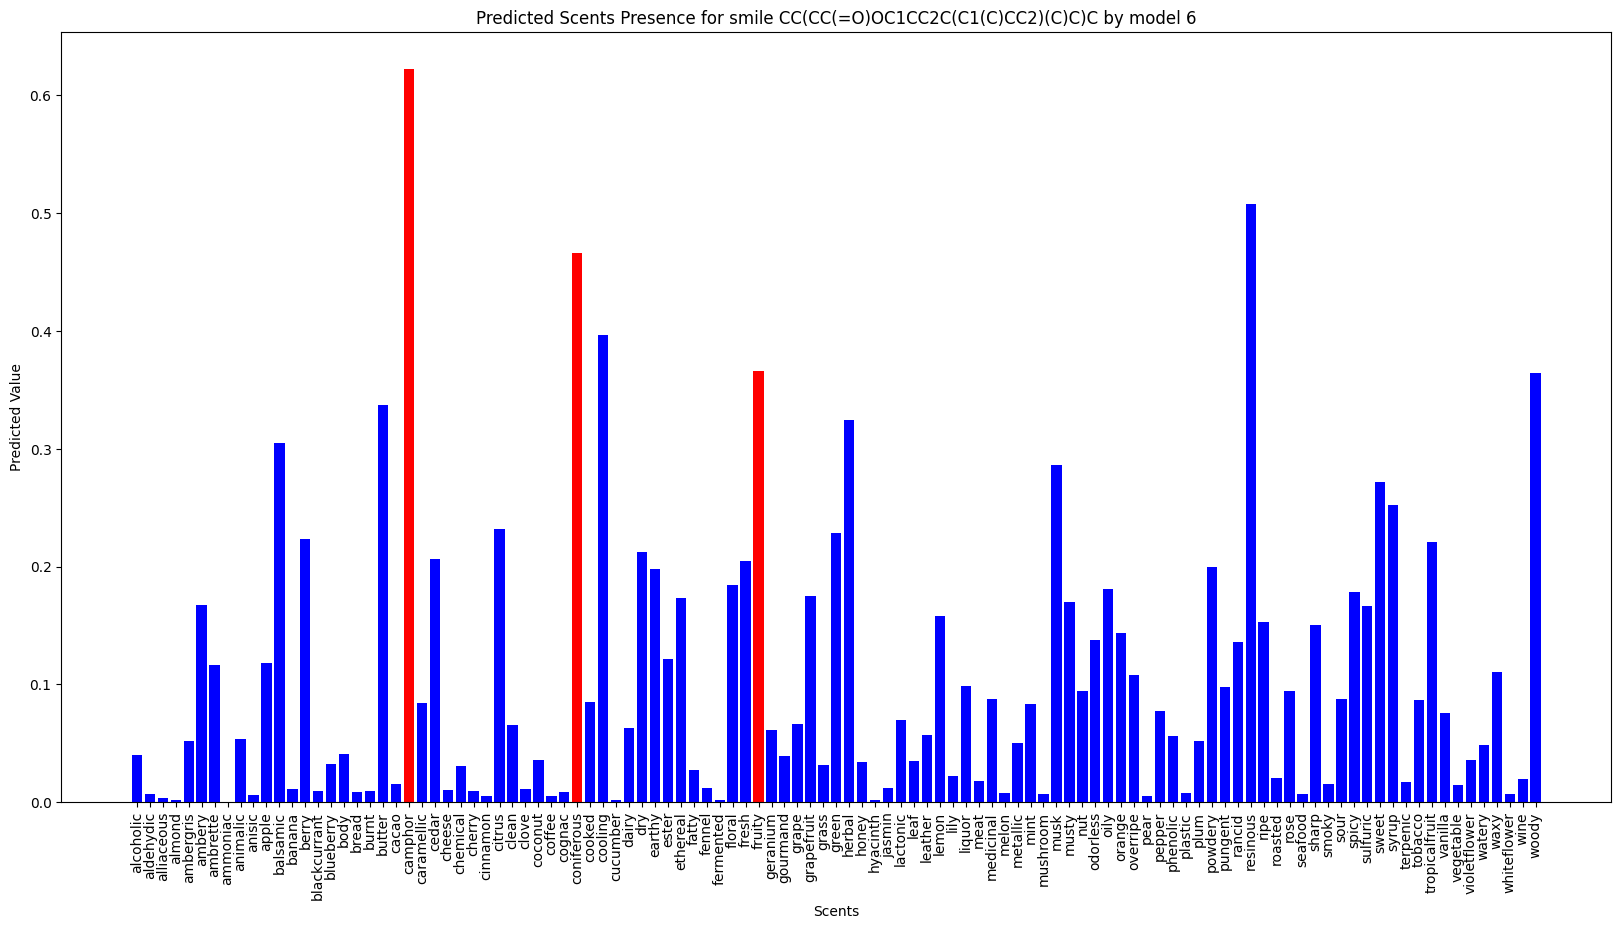

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


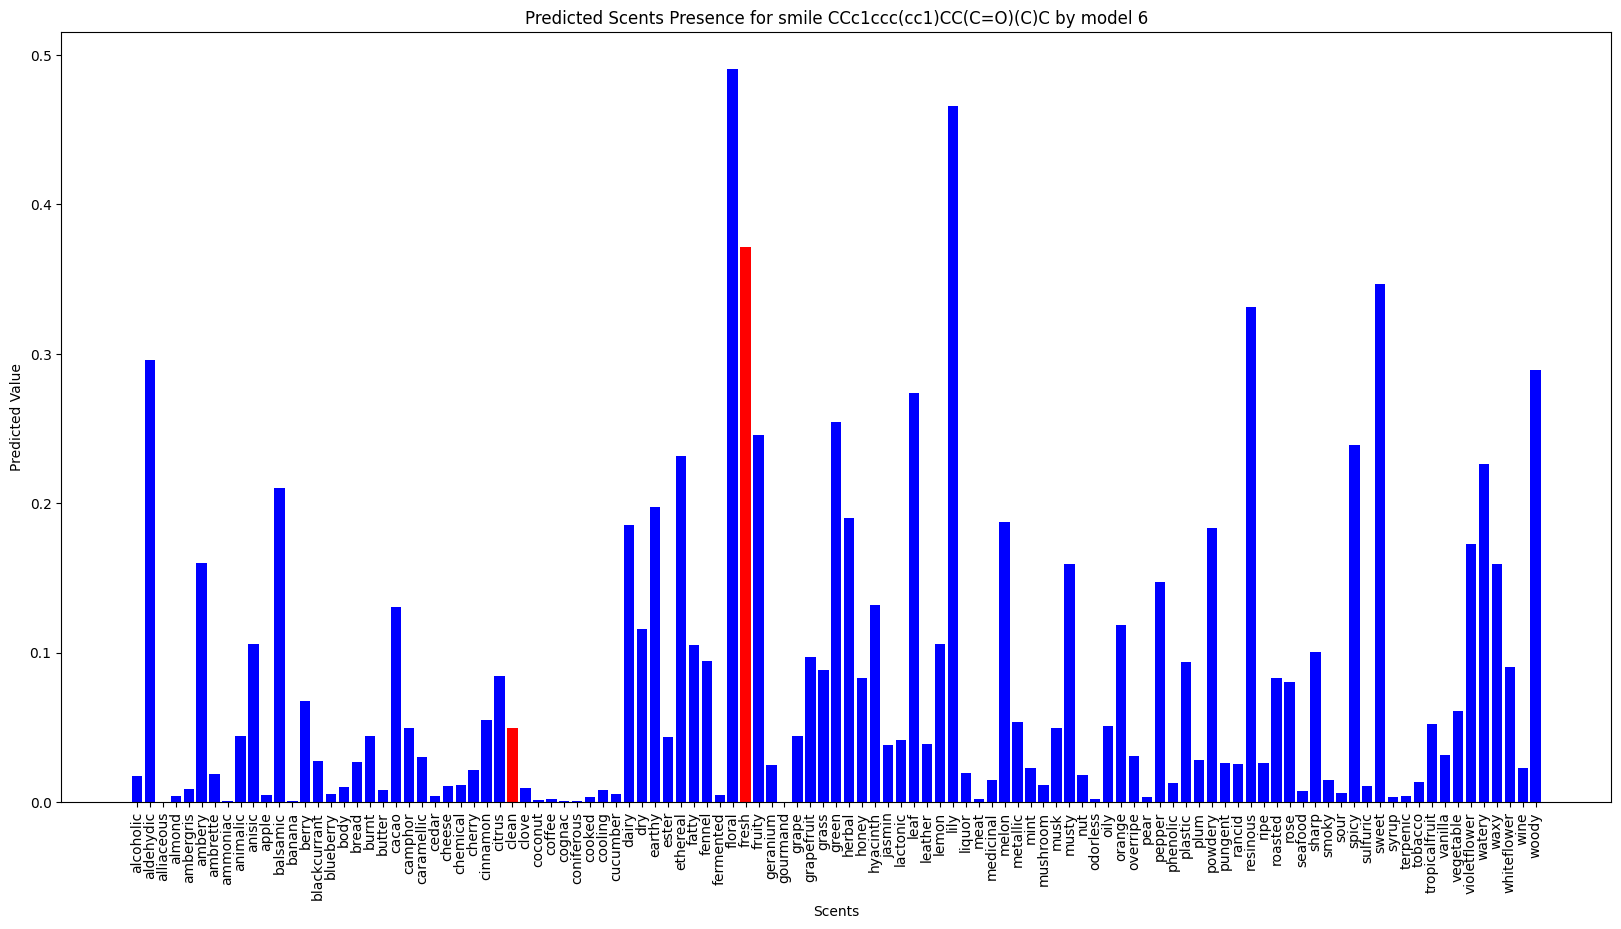

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


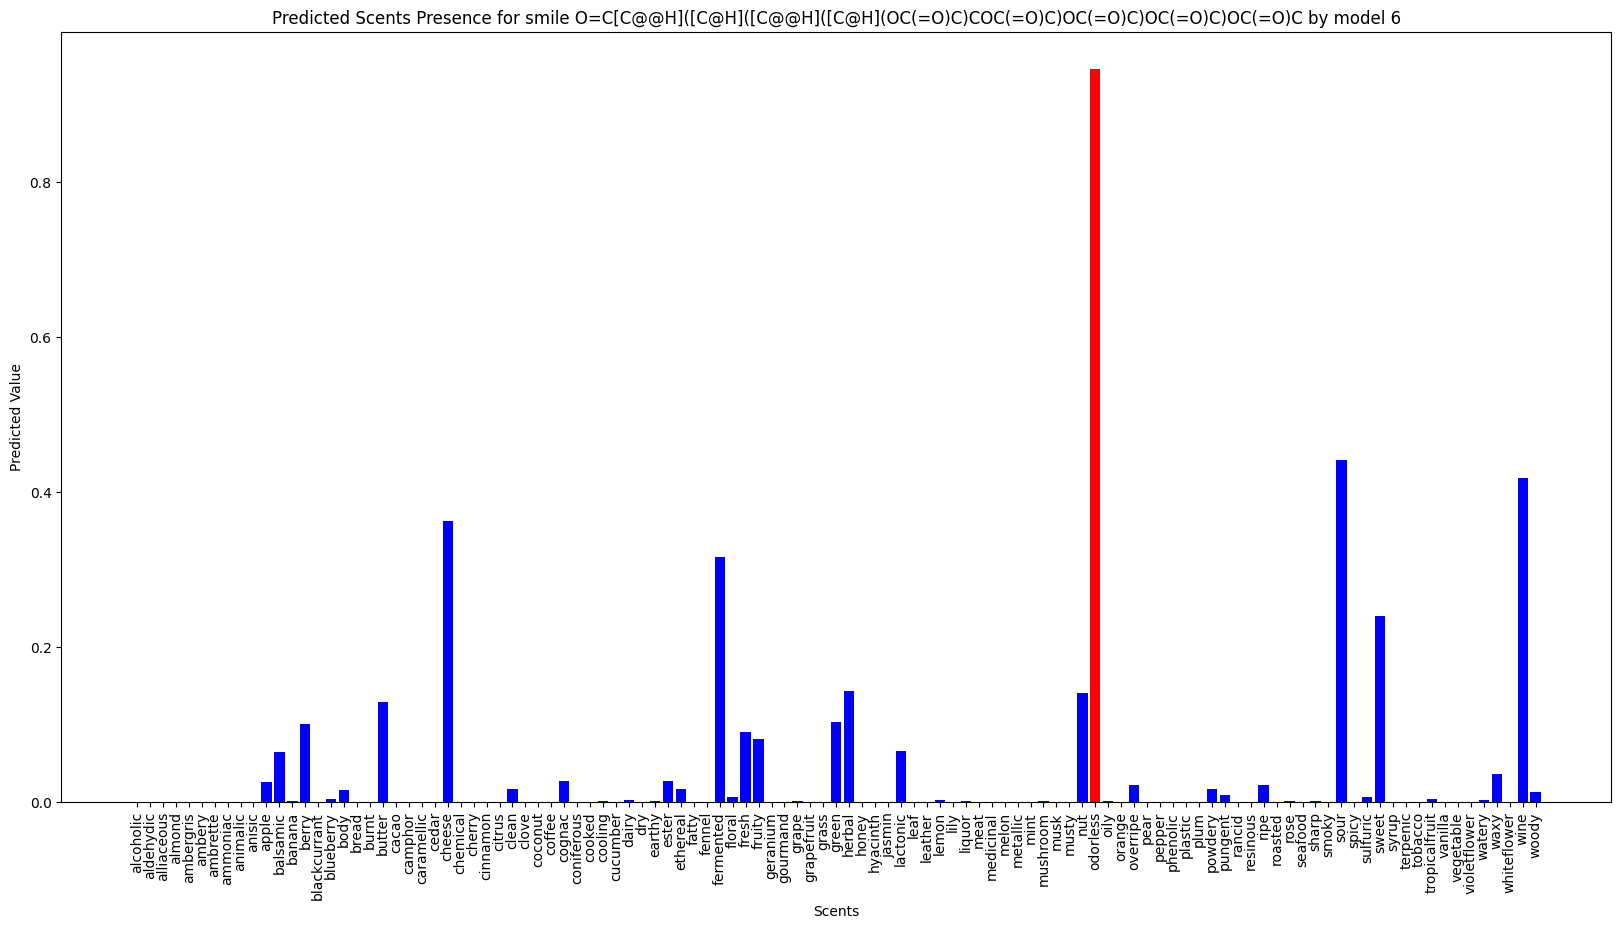

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


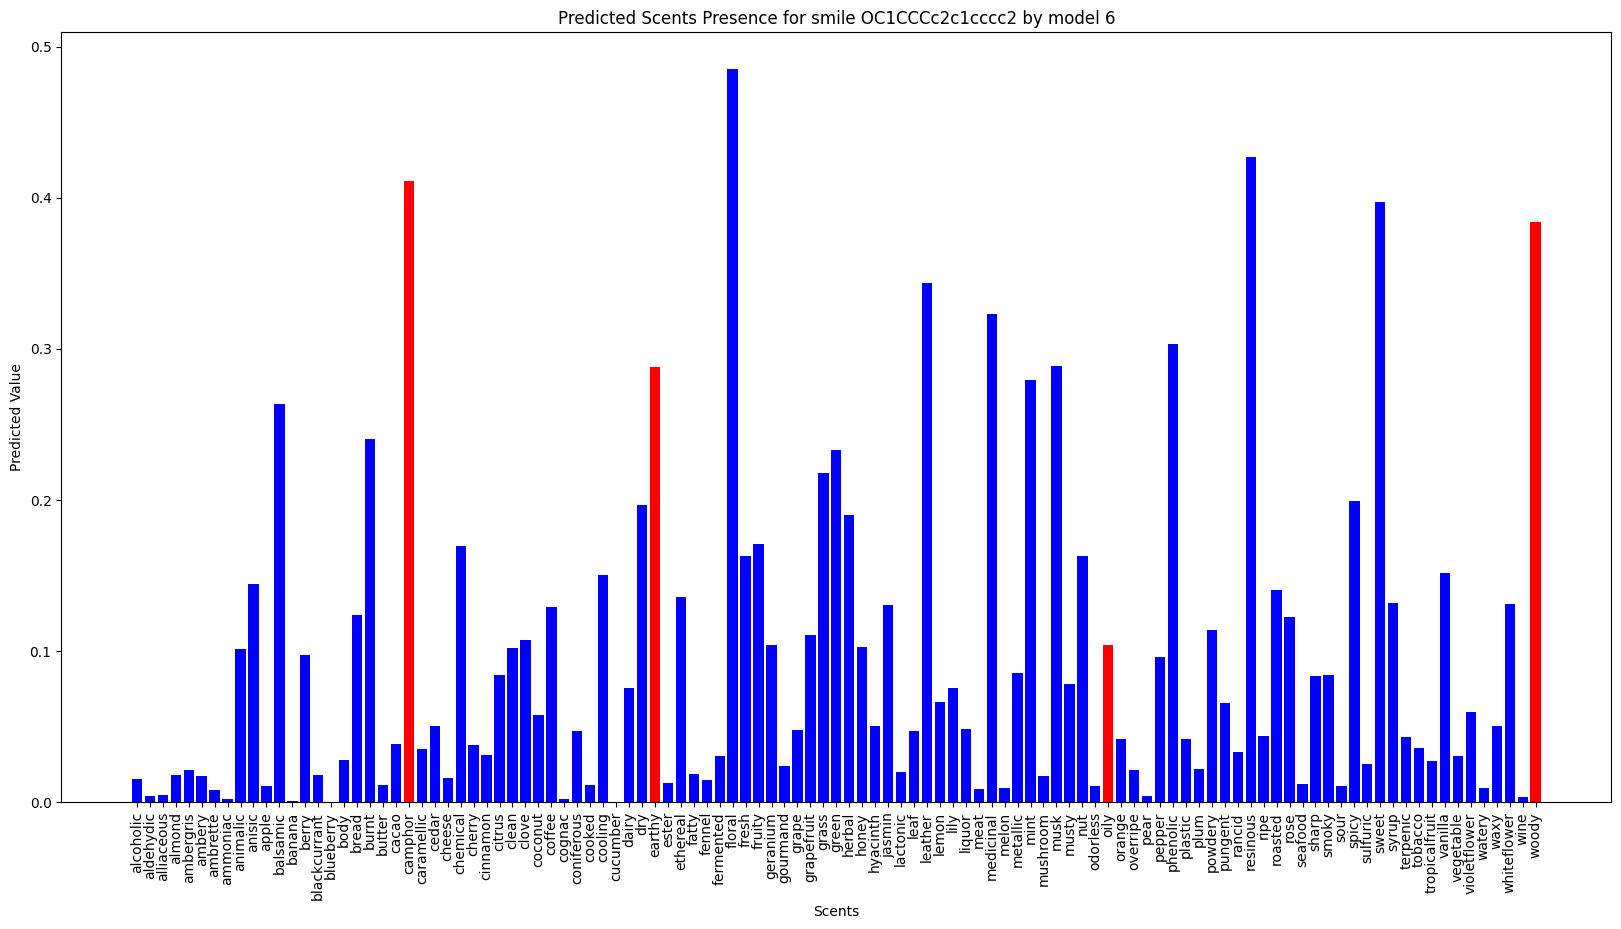

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 7
No0:


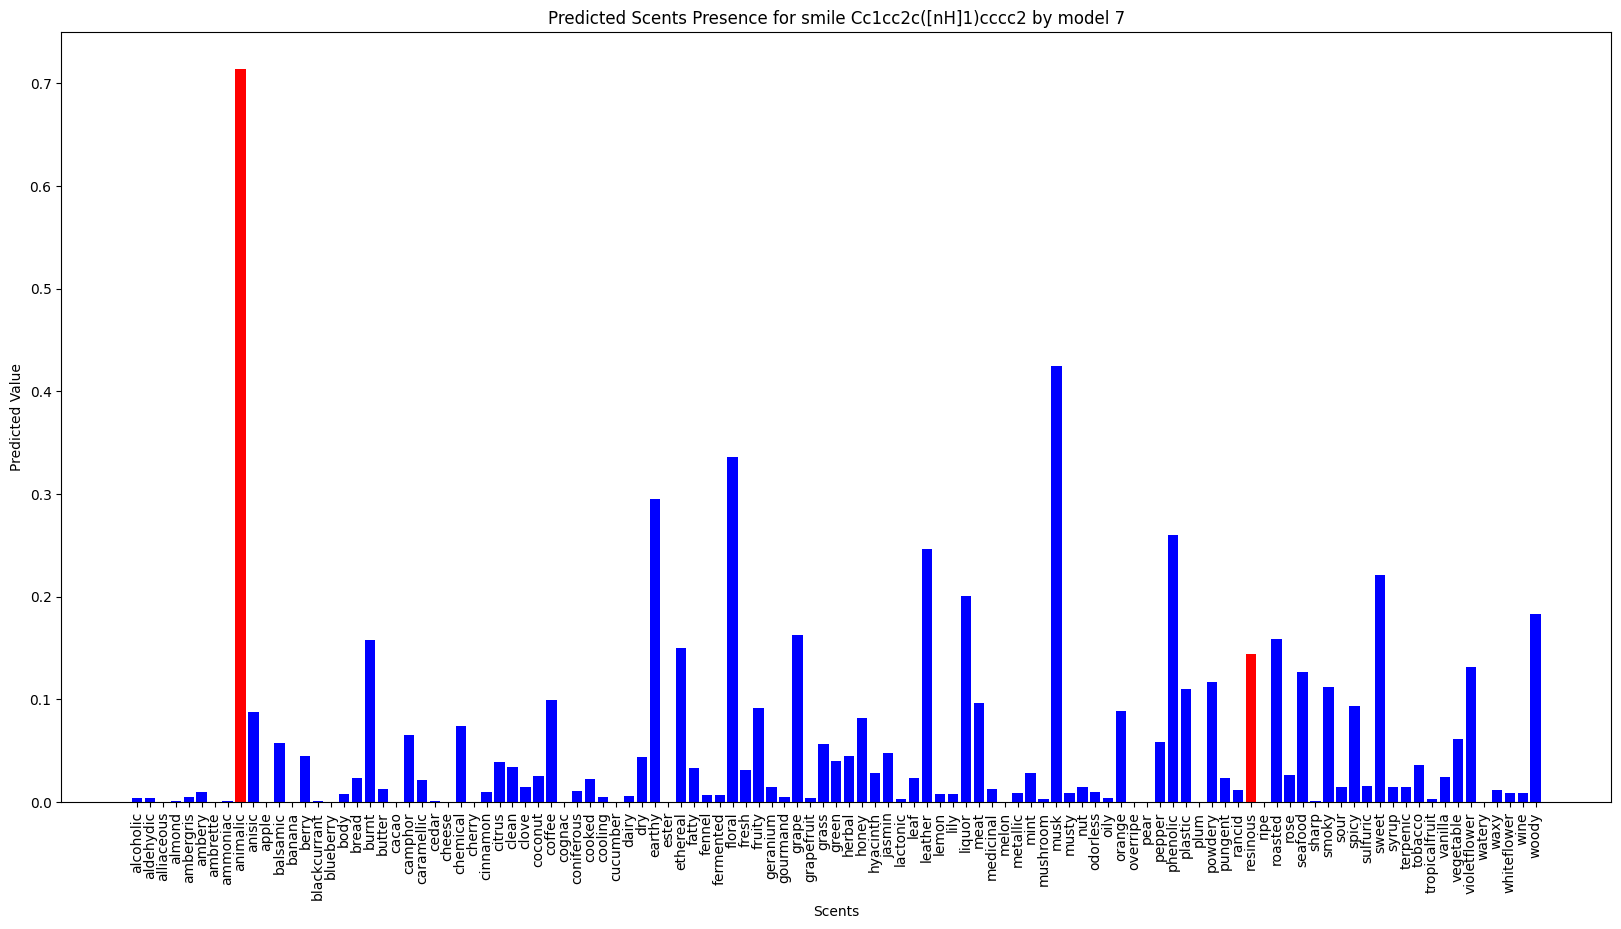

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


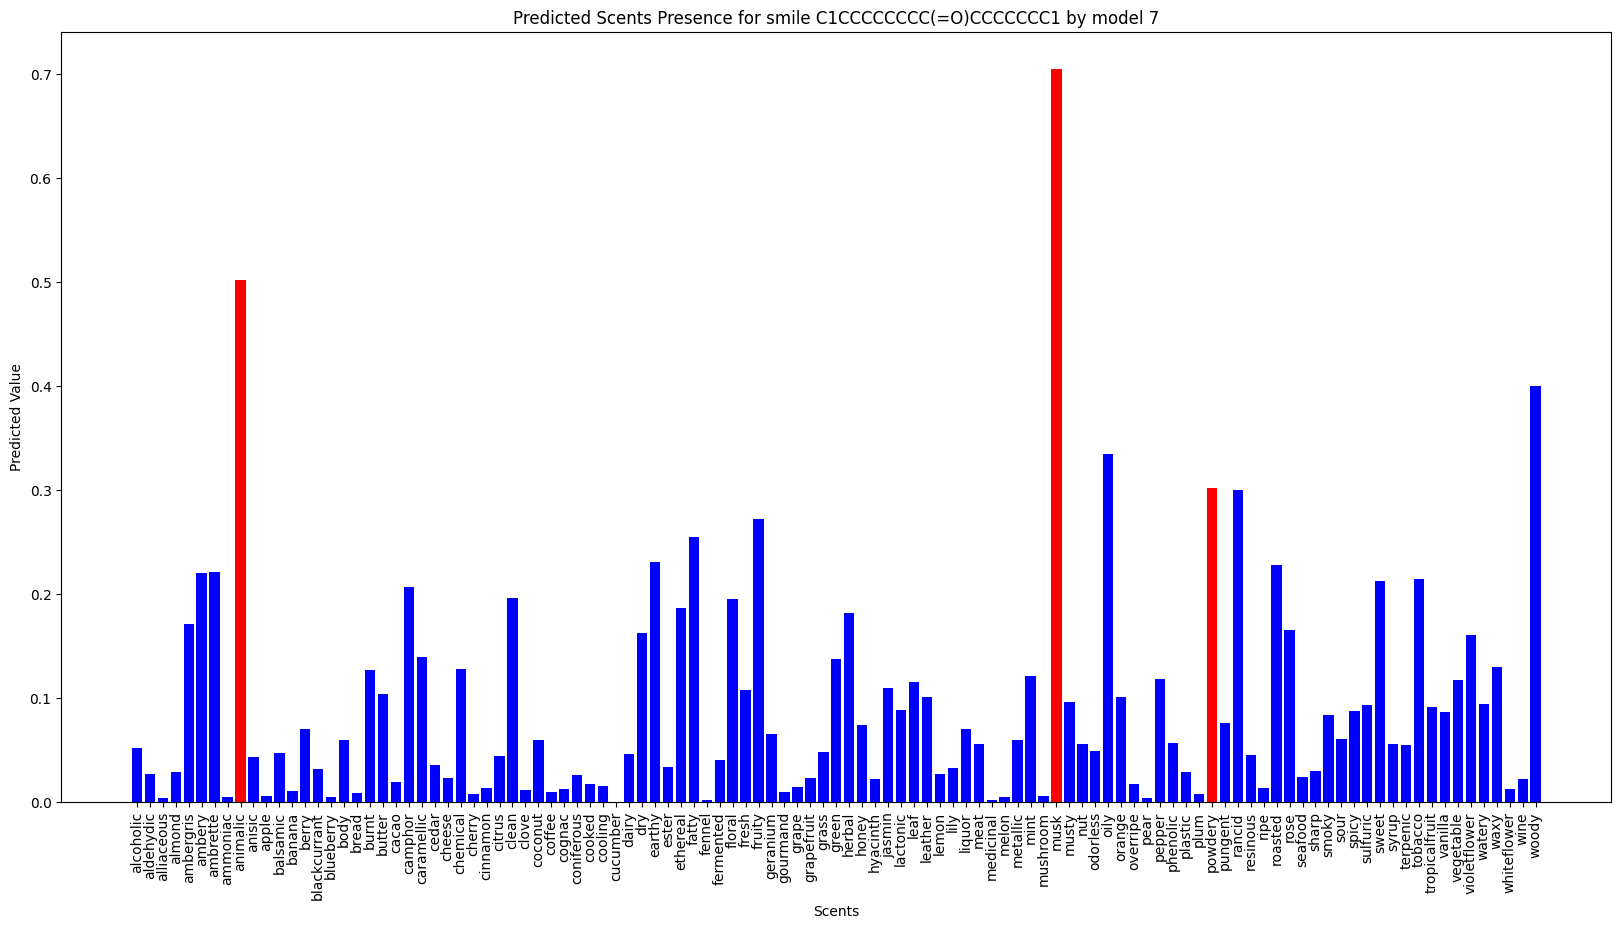

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


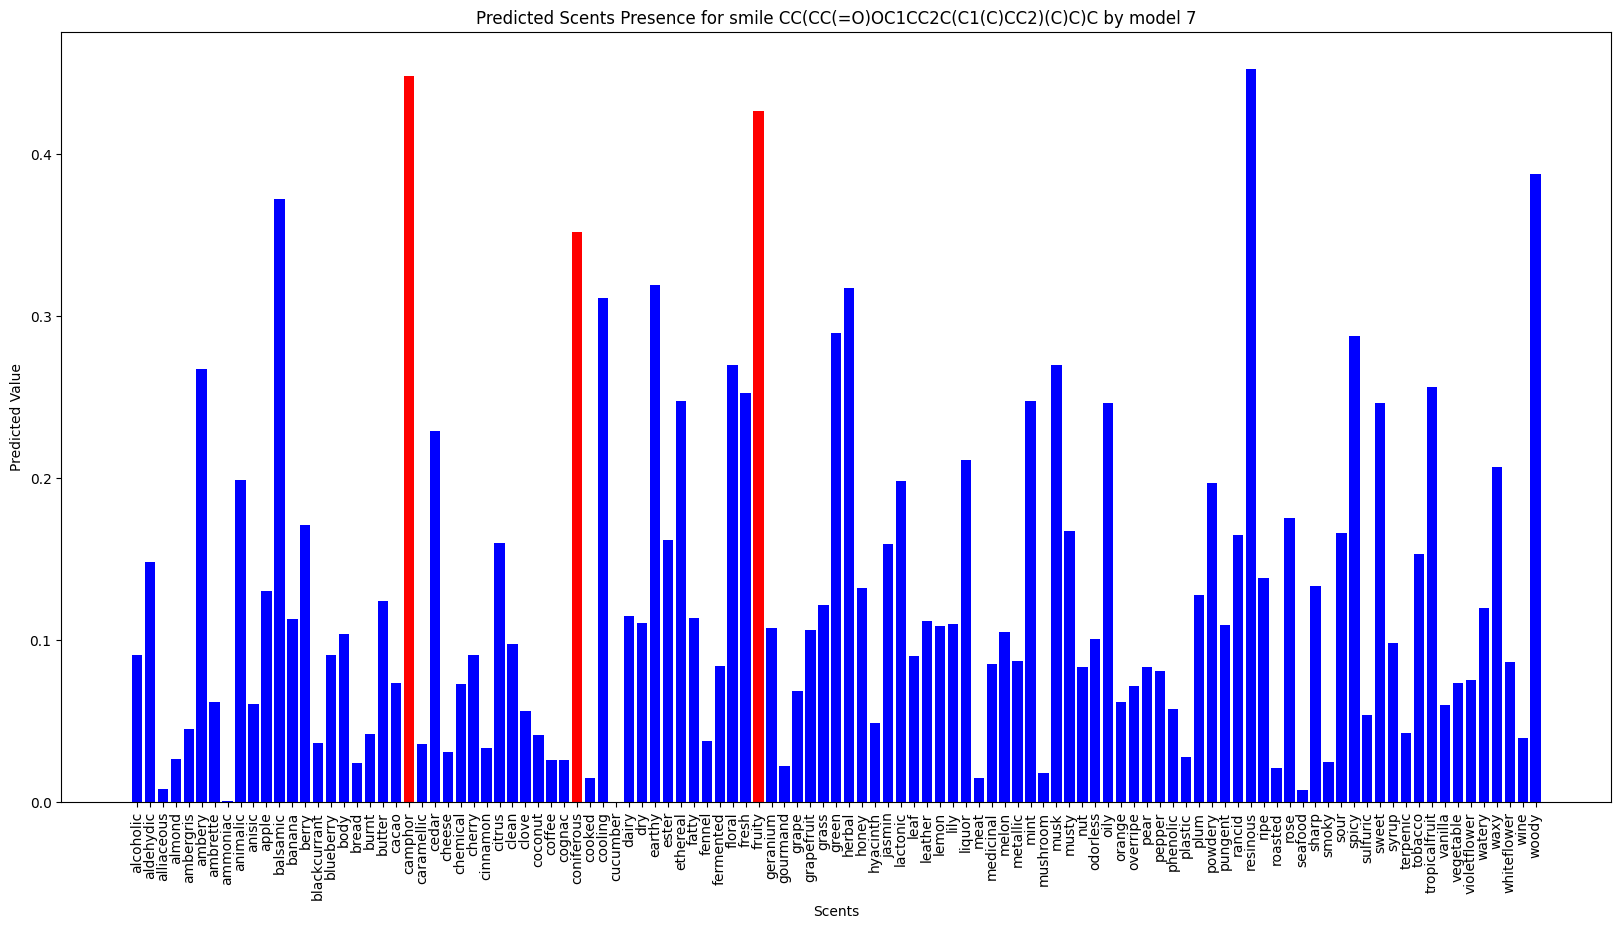

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


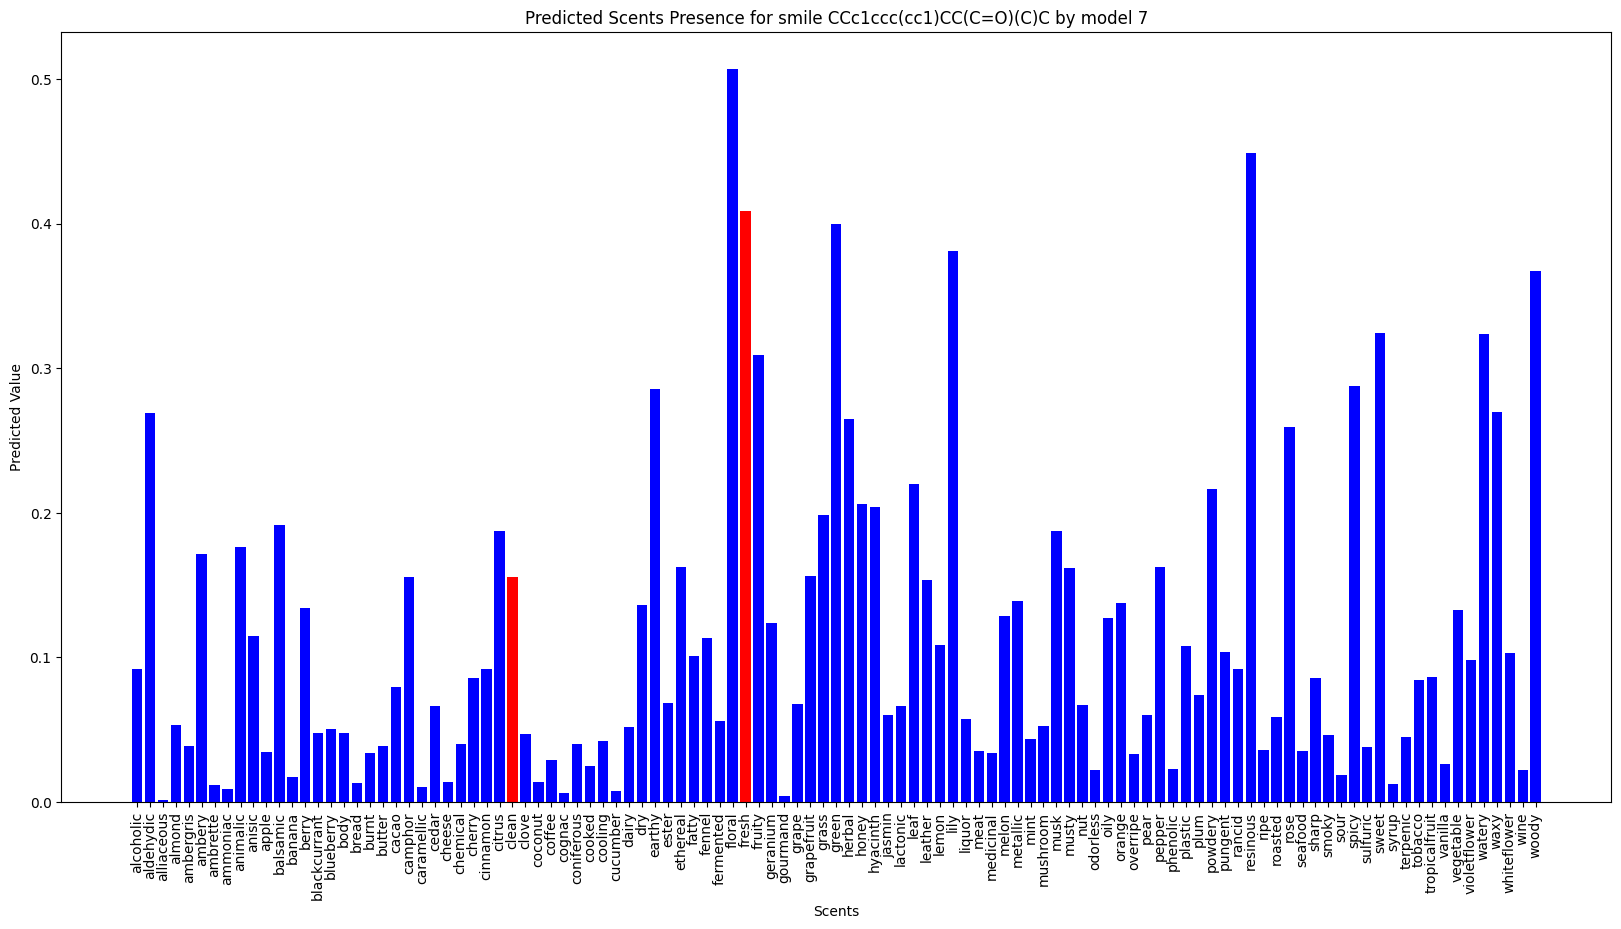

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


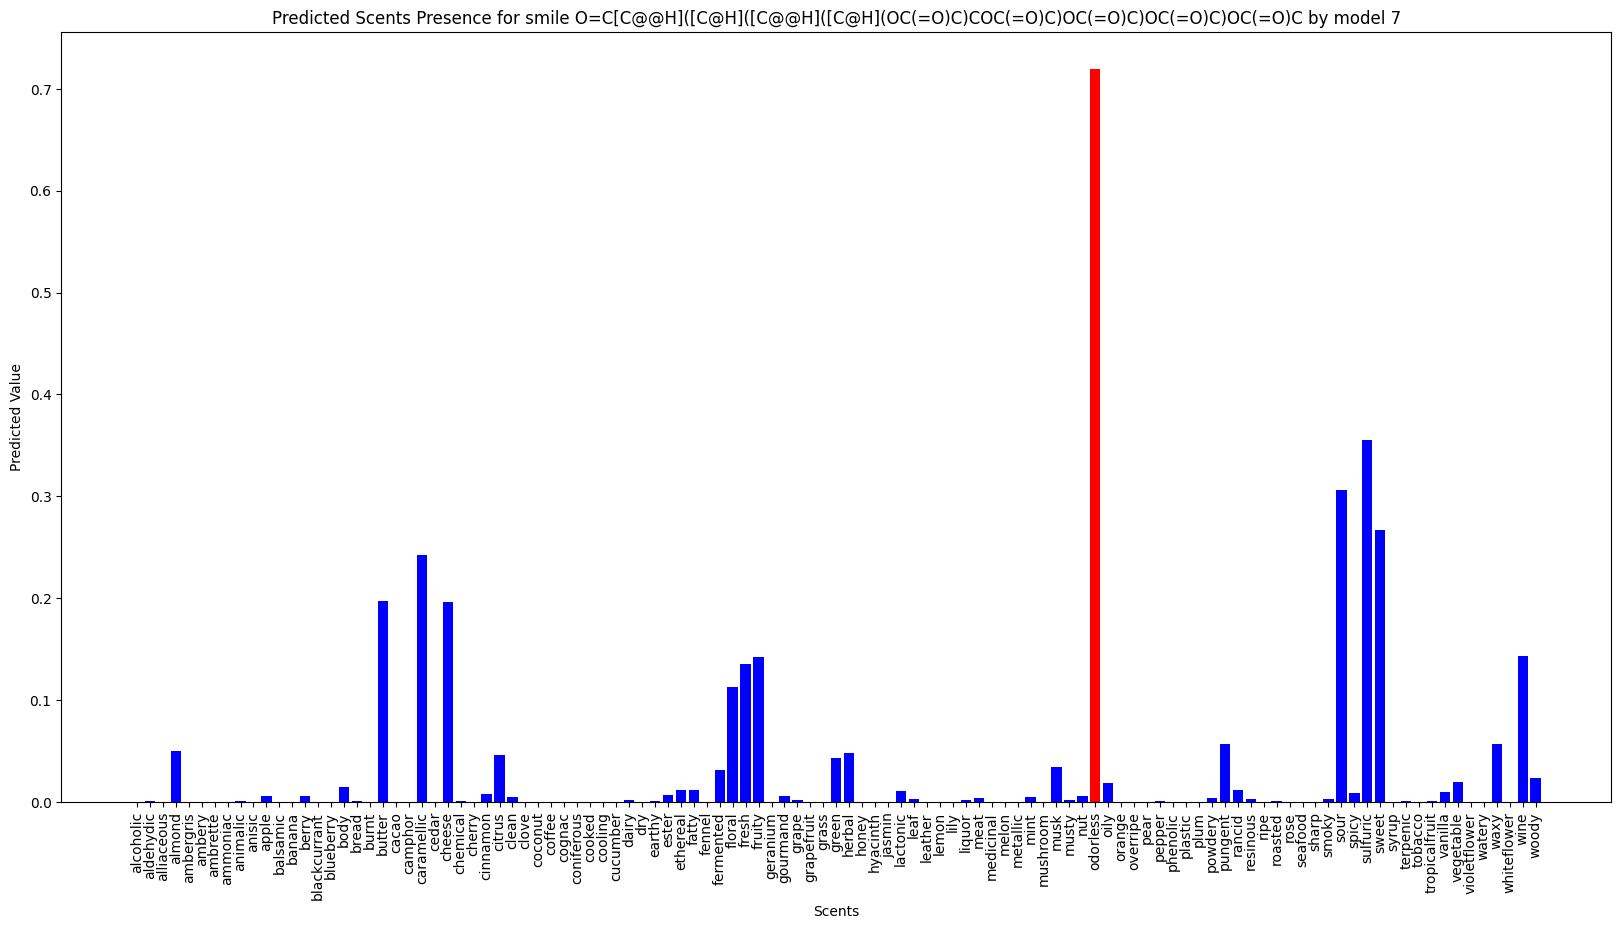

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


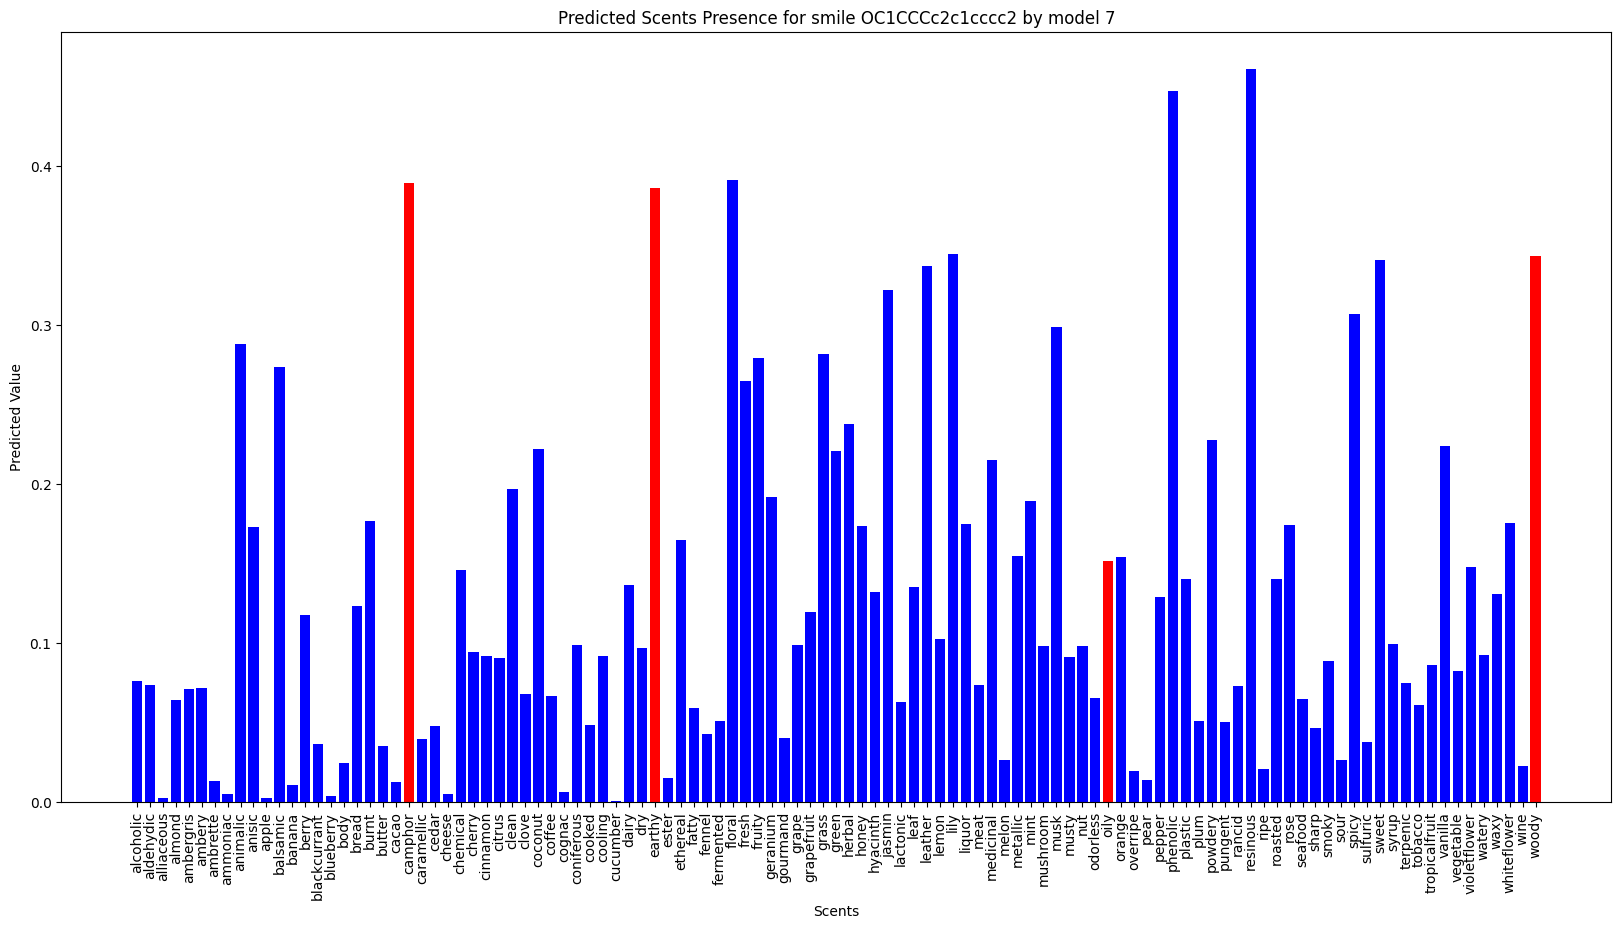

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 8
No0:


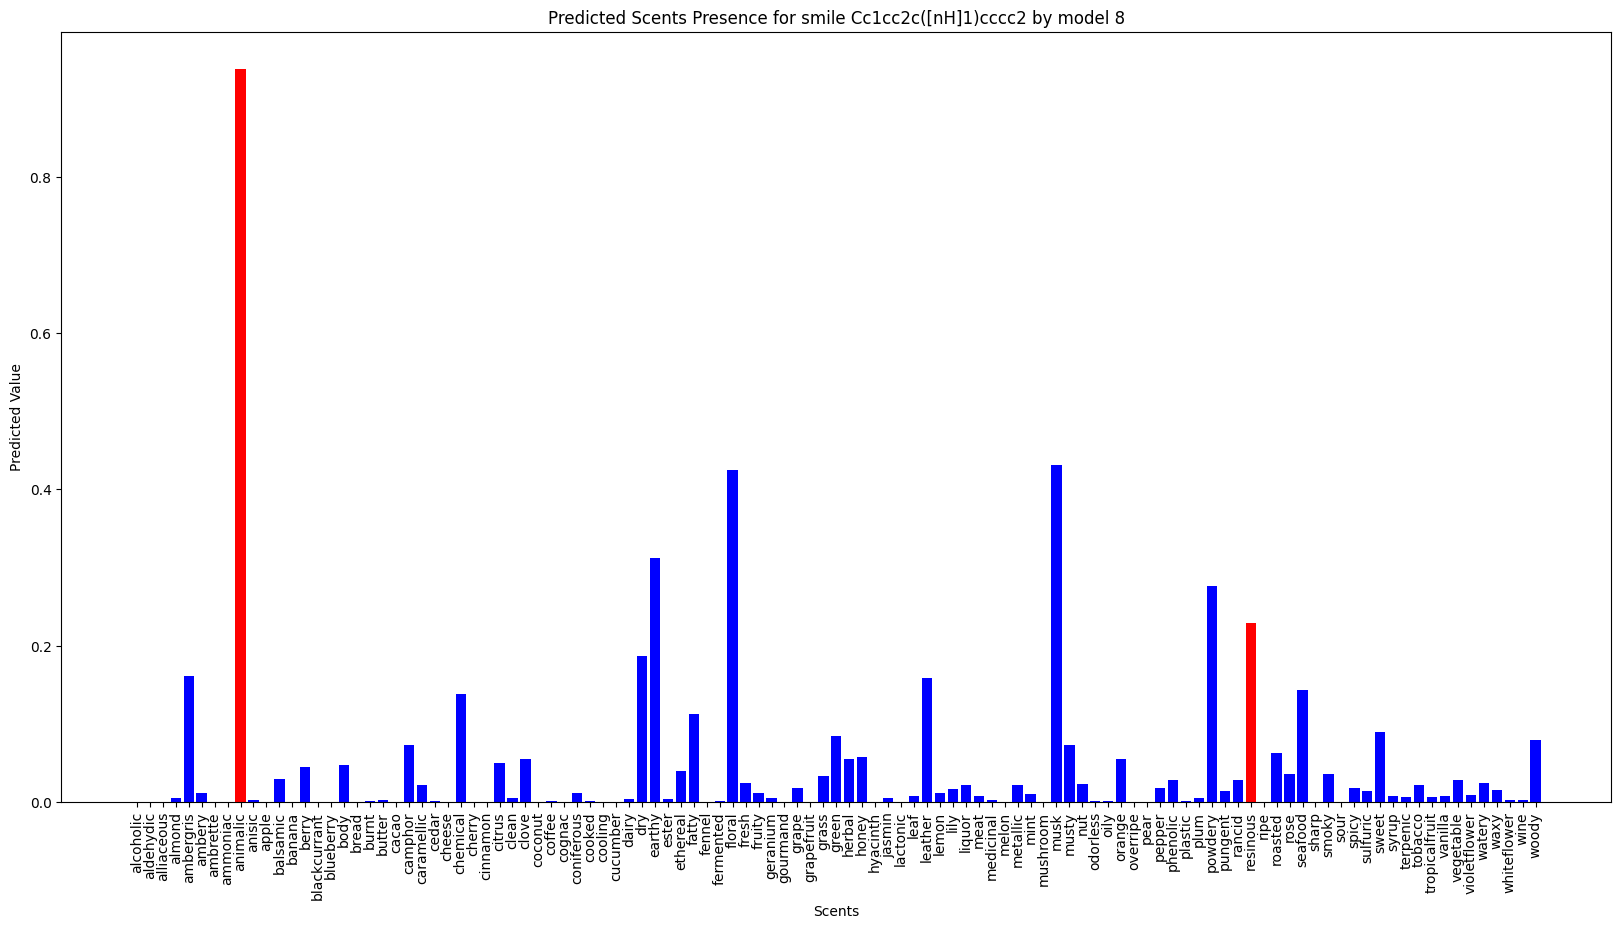

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


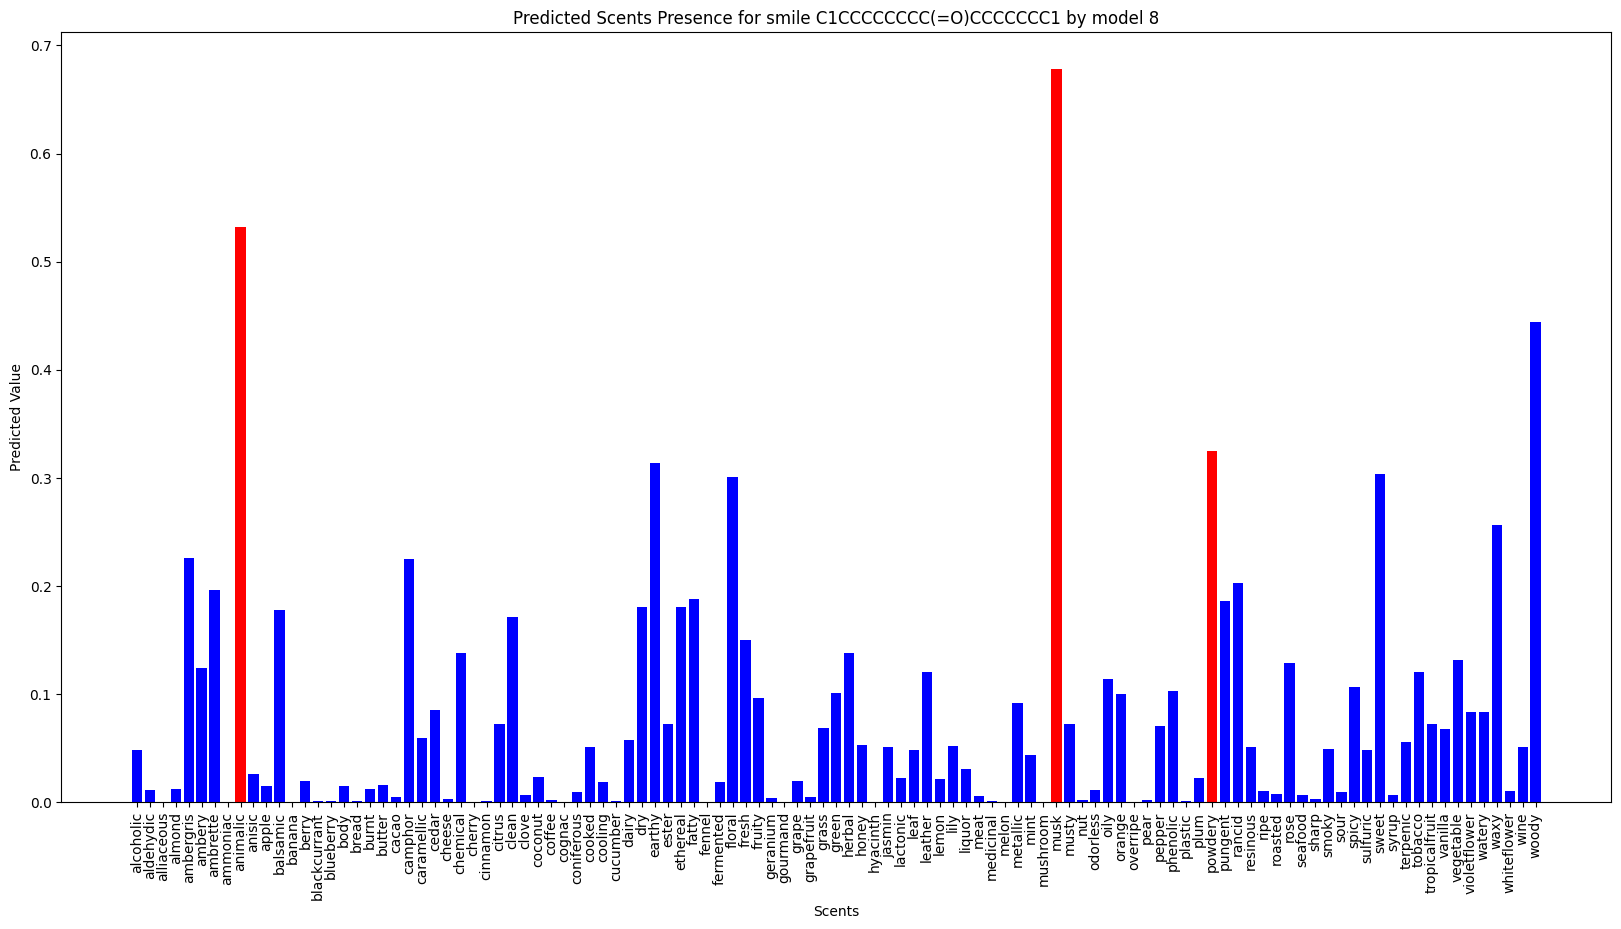

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


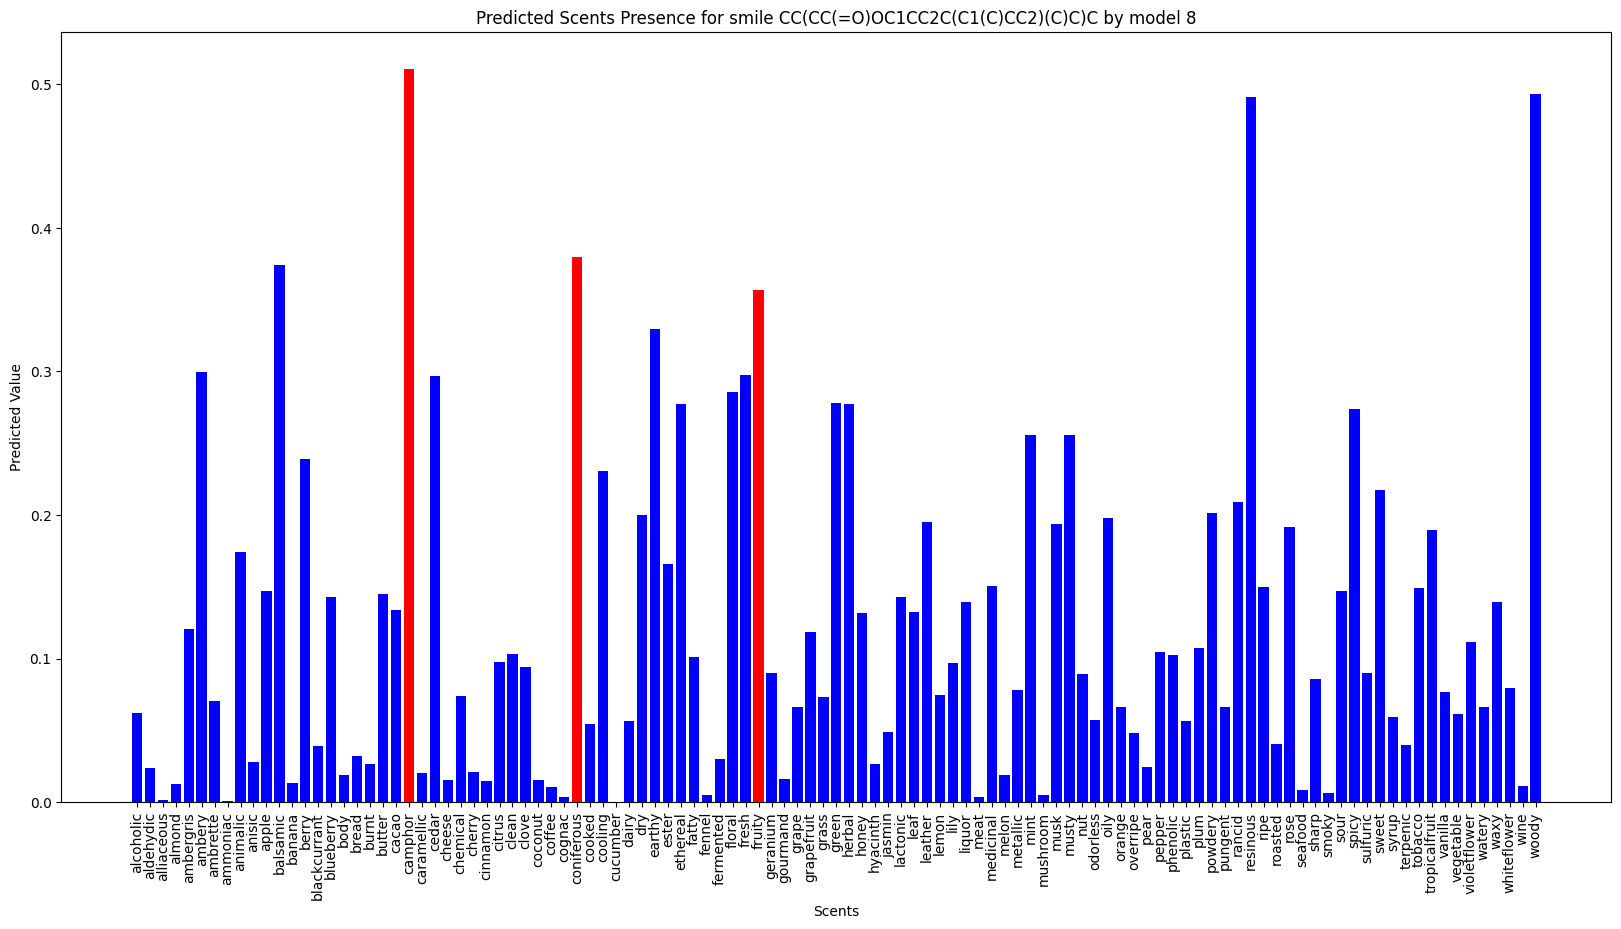

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


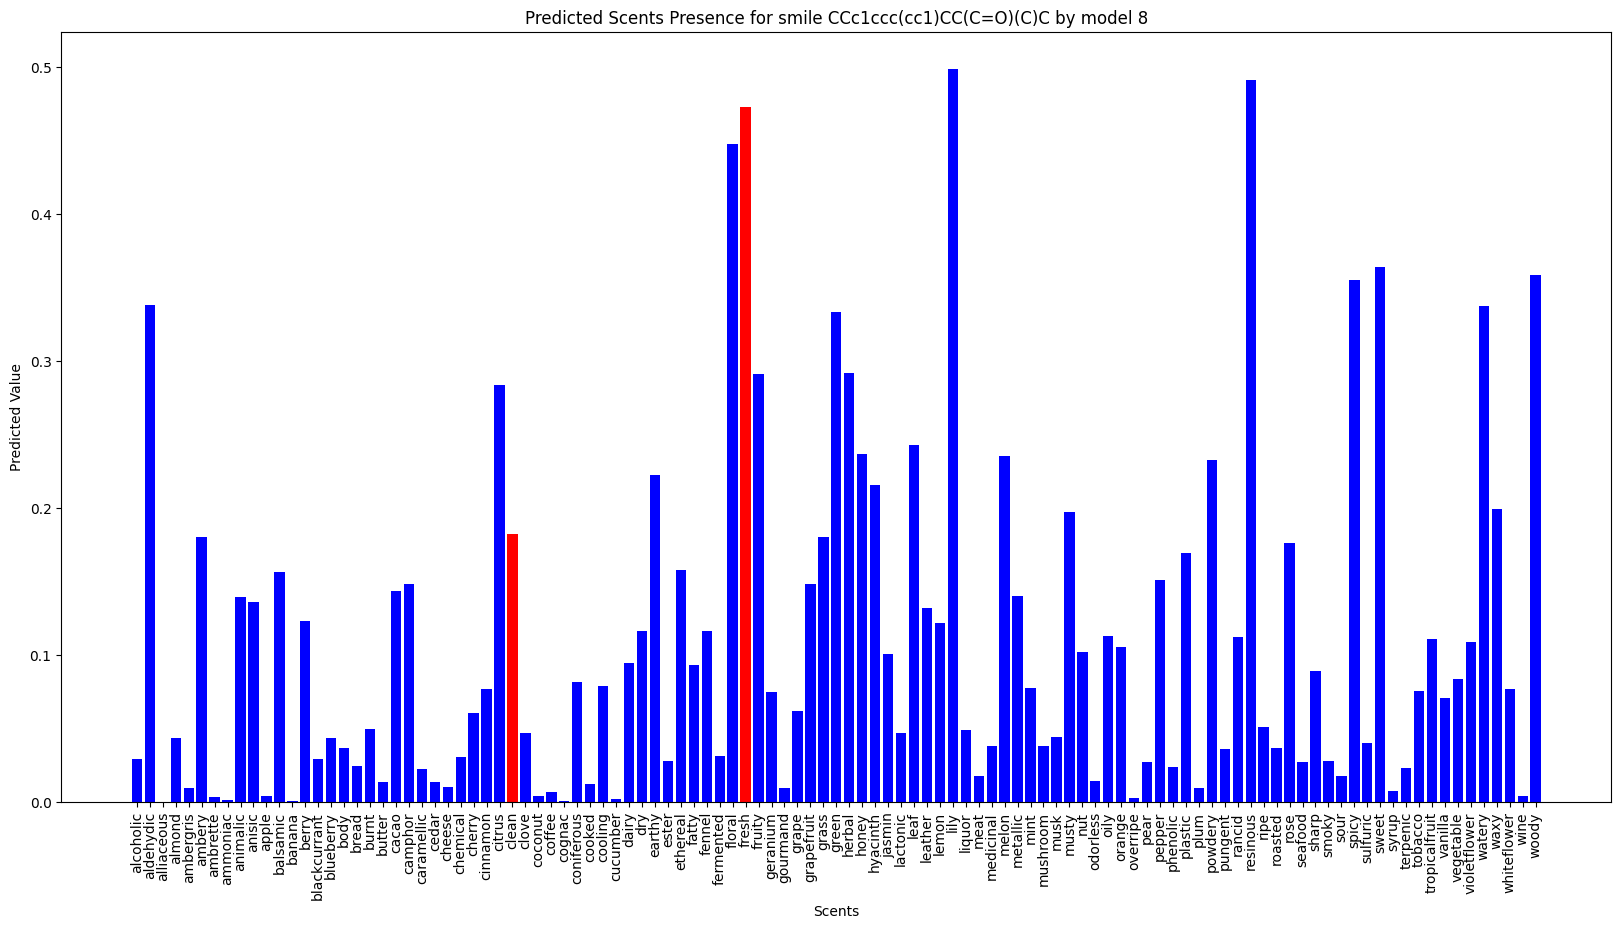

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


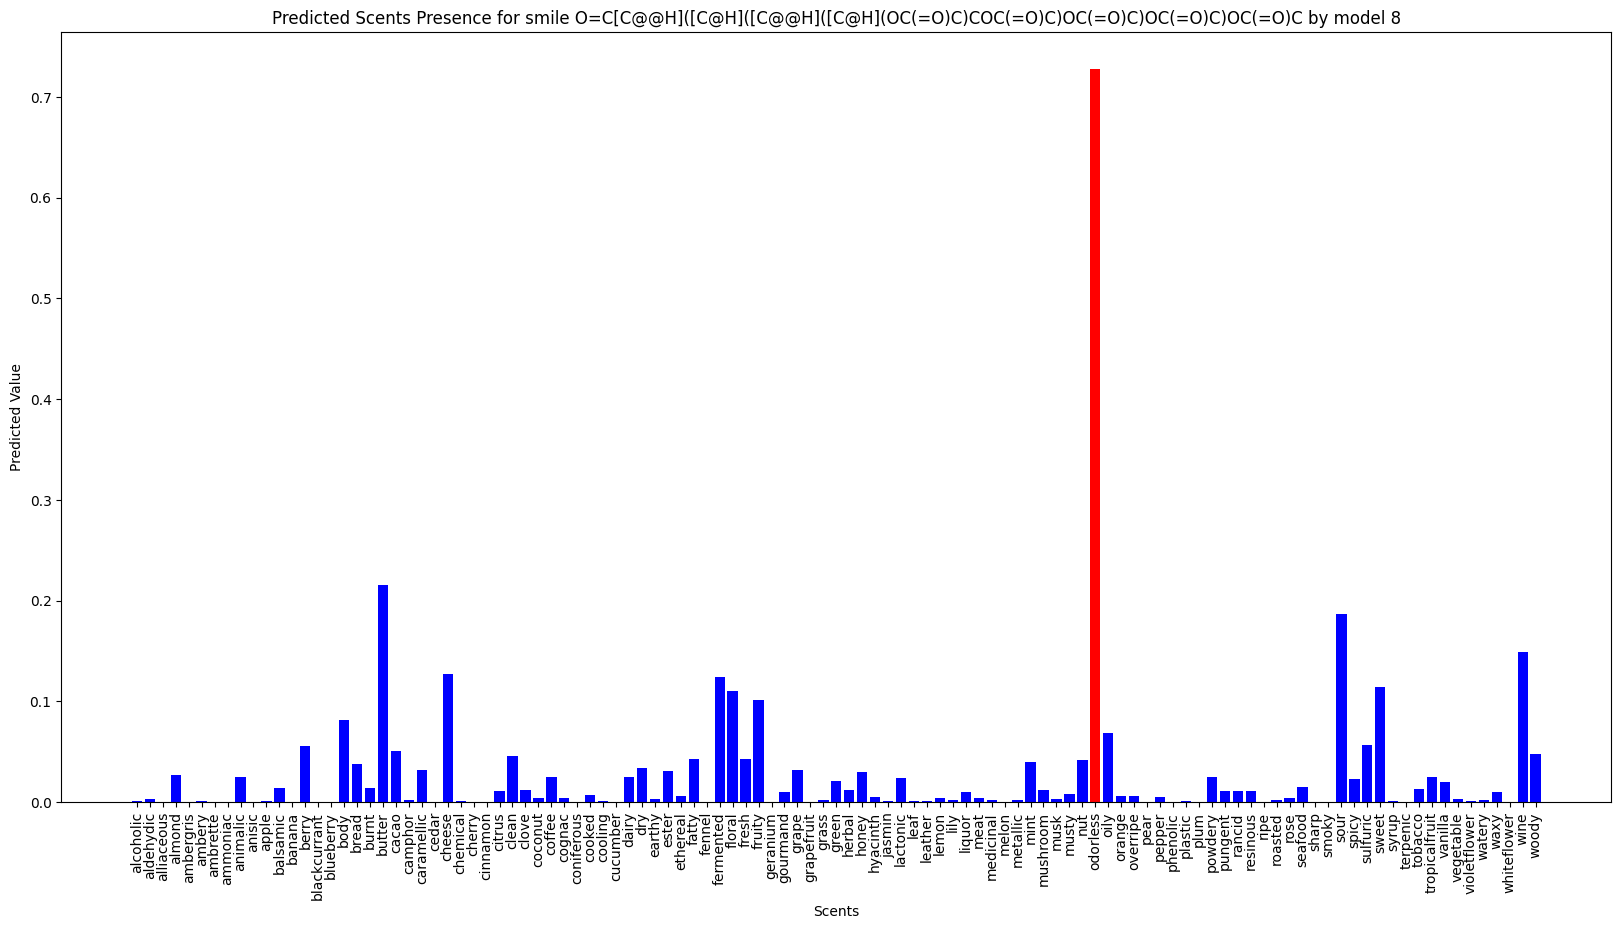

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


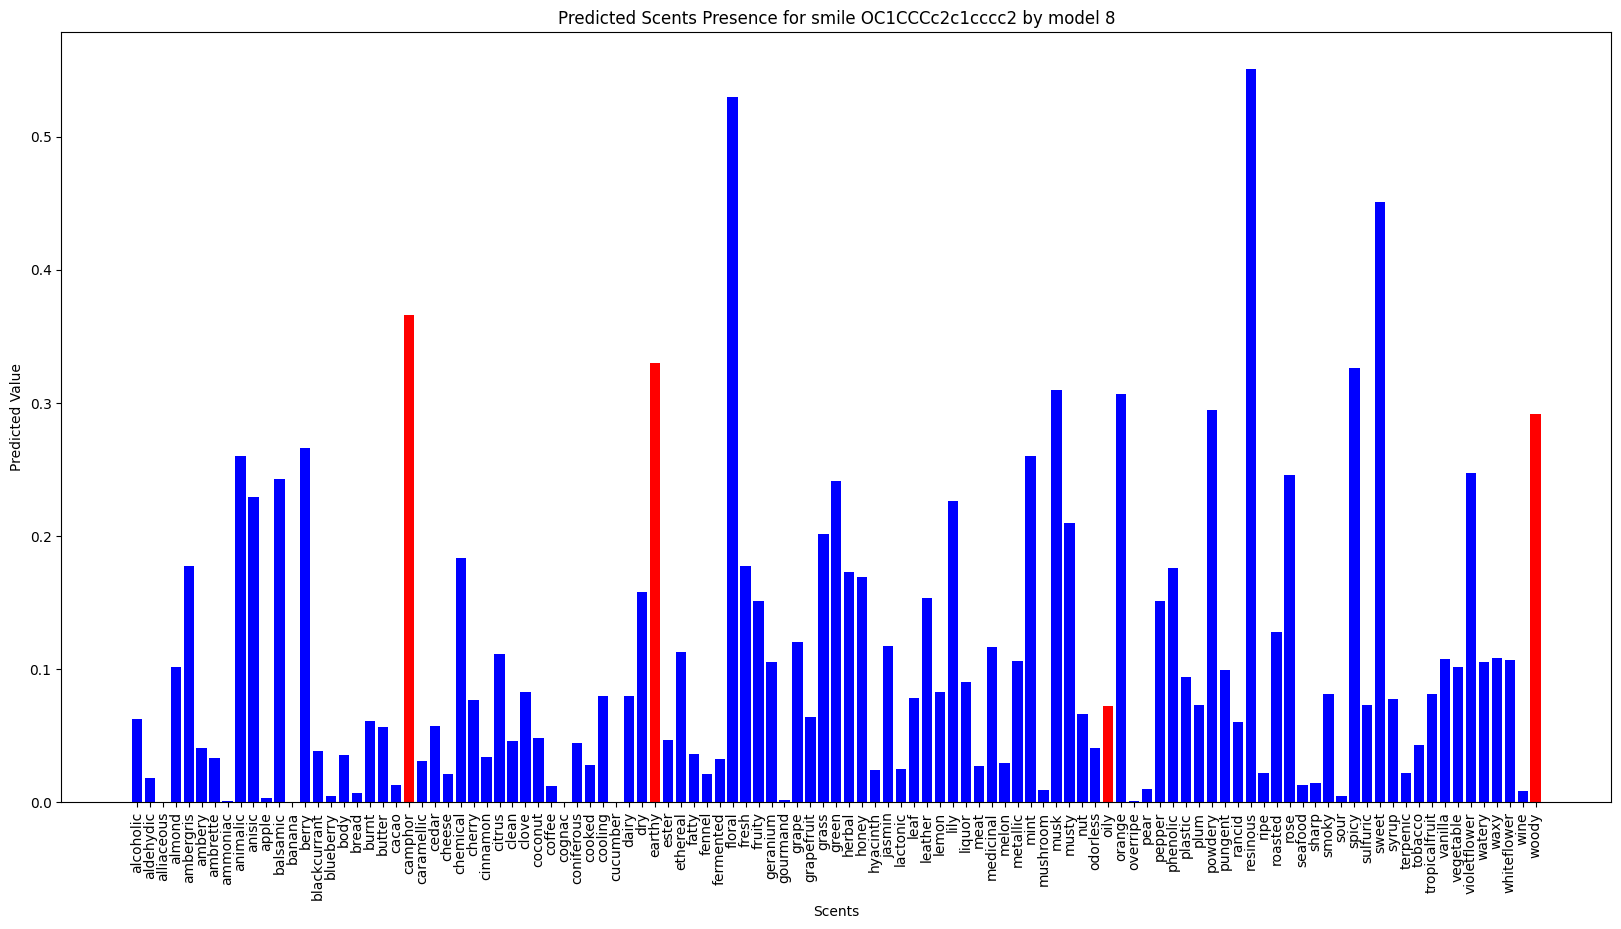

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']

Model 9
No0:


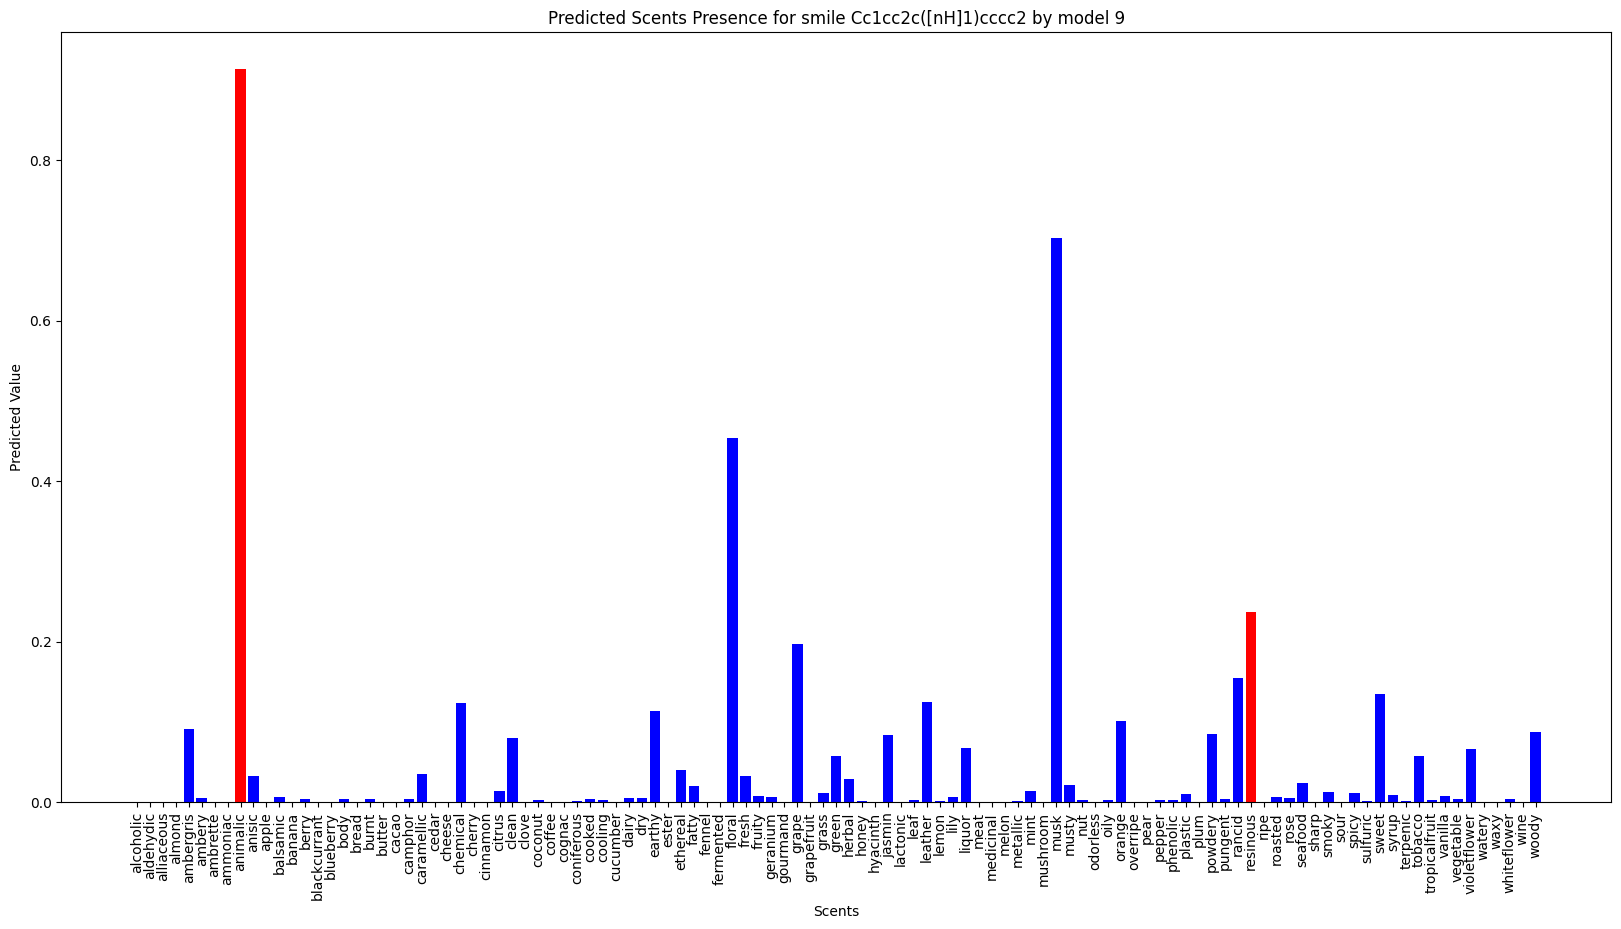

Cc1cc2c([nH]1)cccc2
Expected scents: ['animalic', 'resinous']

No1:


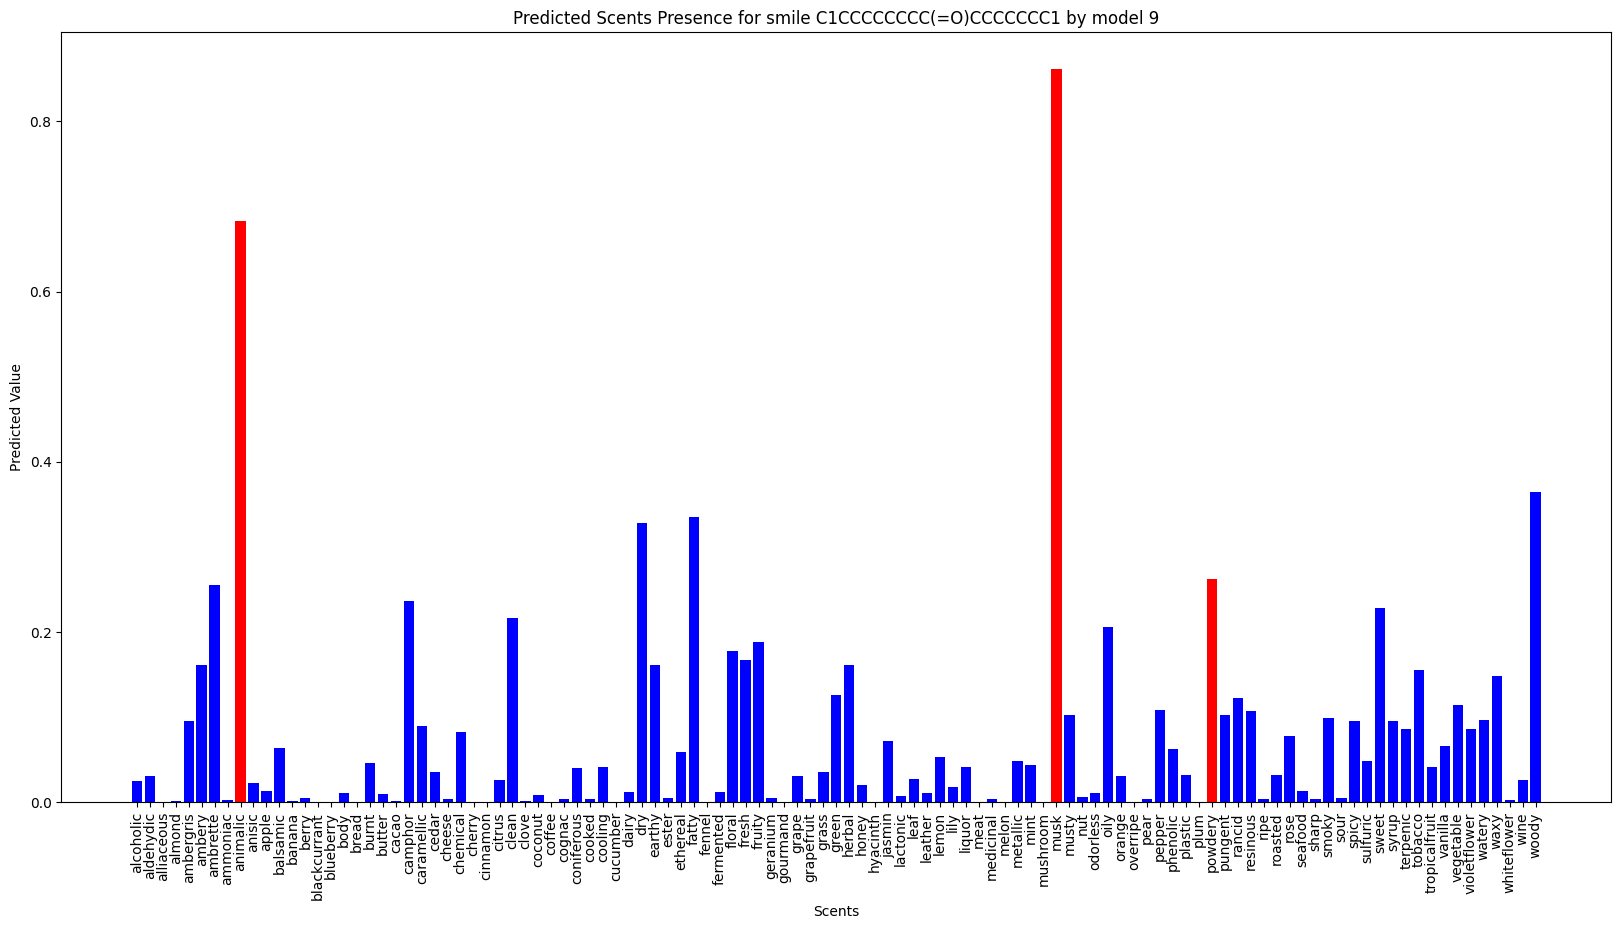

C1CCCCCCCC(=O)CCCCCCC1
Expected scents: ['animalic', 'musk', 'powdery']

No2:


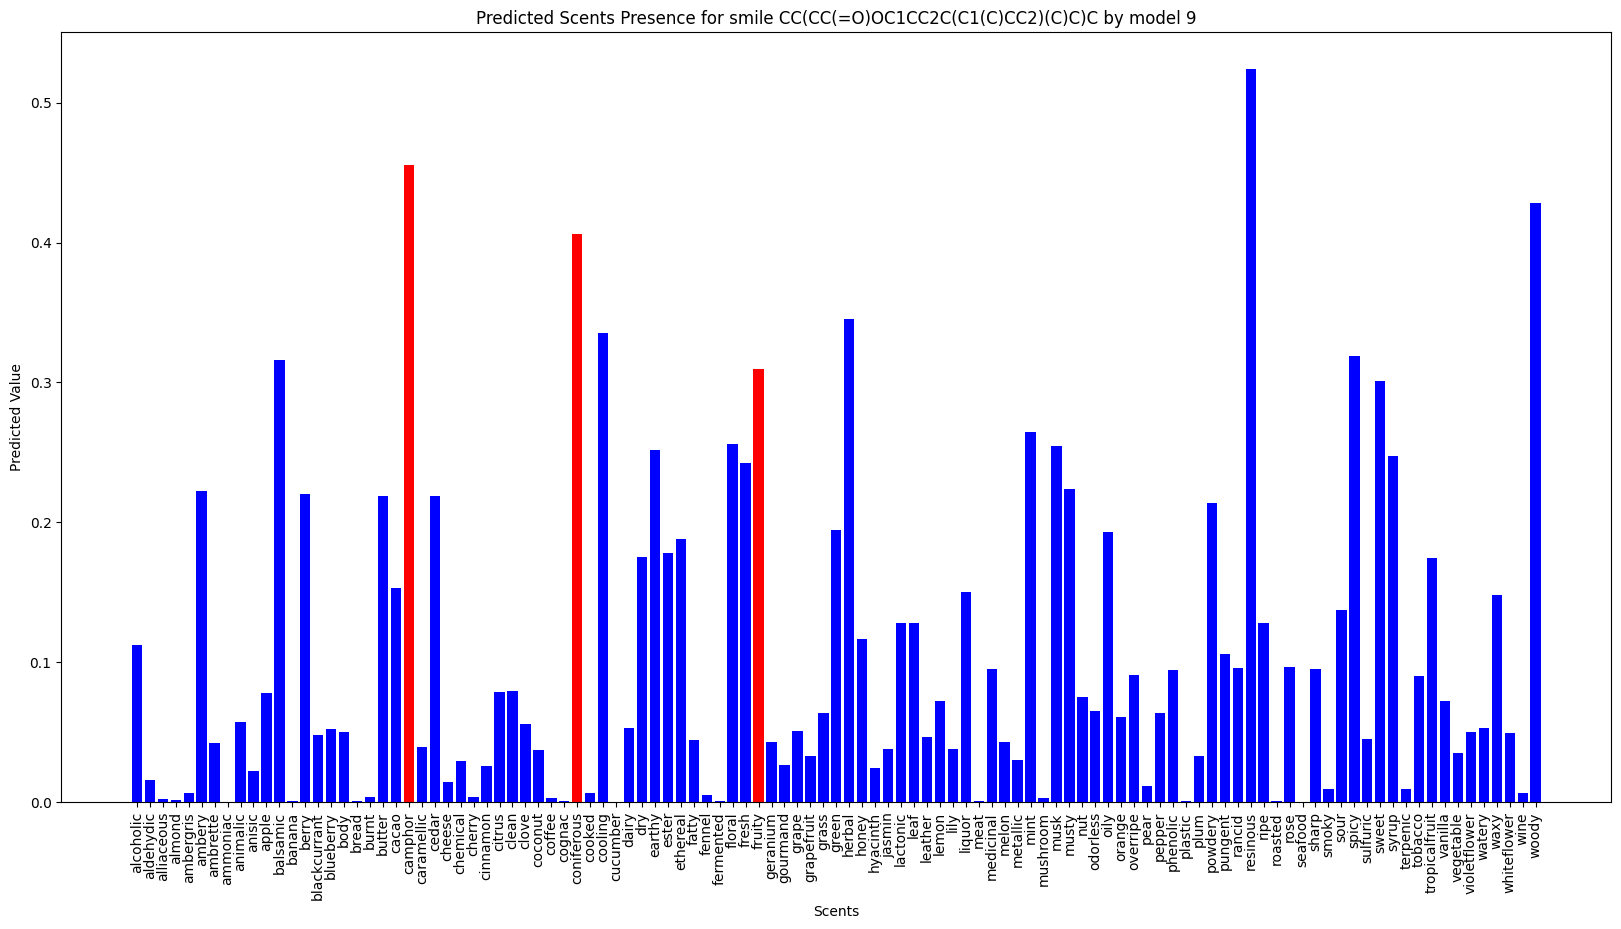

CC(CC(=O)OC1CC2C(C1(C)CC2)(C)C)C
Expected scents: ['camphor', 'coniferous', 'fruity']

No3:


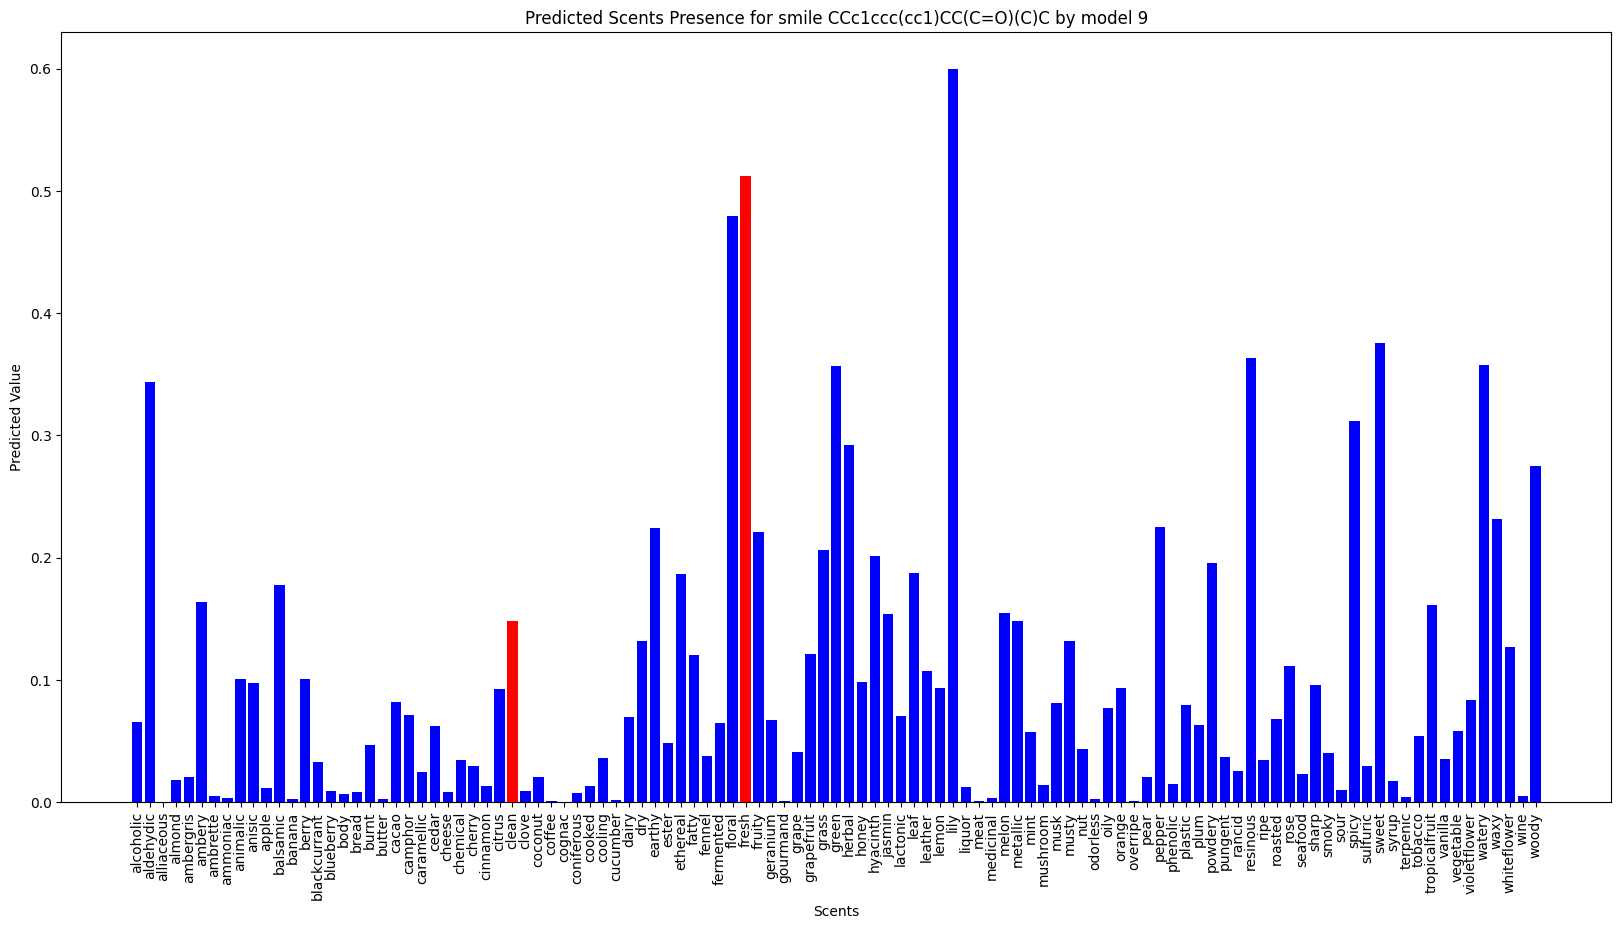

CCc1ccc(cc1)CC(C=O)(C)C
Expected scents: ['clean', 'fresh']

No4:


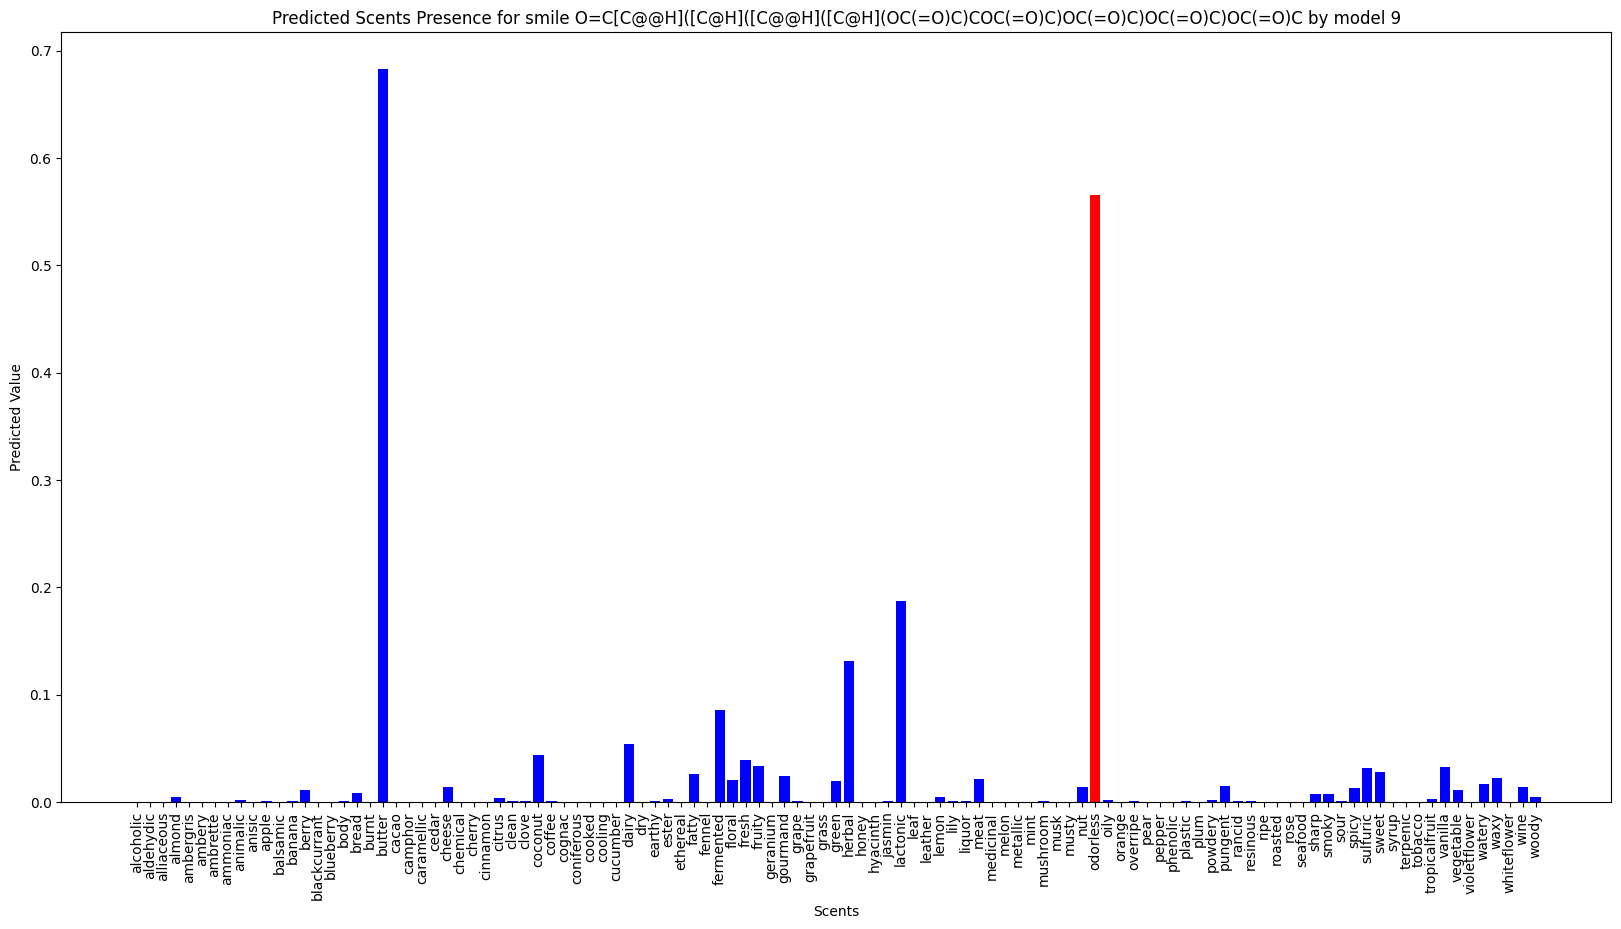

O=C[C@@H]([C@H]([C@@H]([C@H](OC(=O)C)COC(=O)C)OC(=O)C)OC(=O)C)OC(=O)C
Expected scents: ['odorless']

No5:


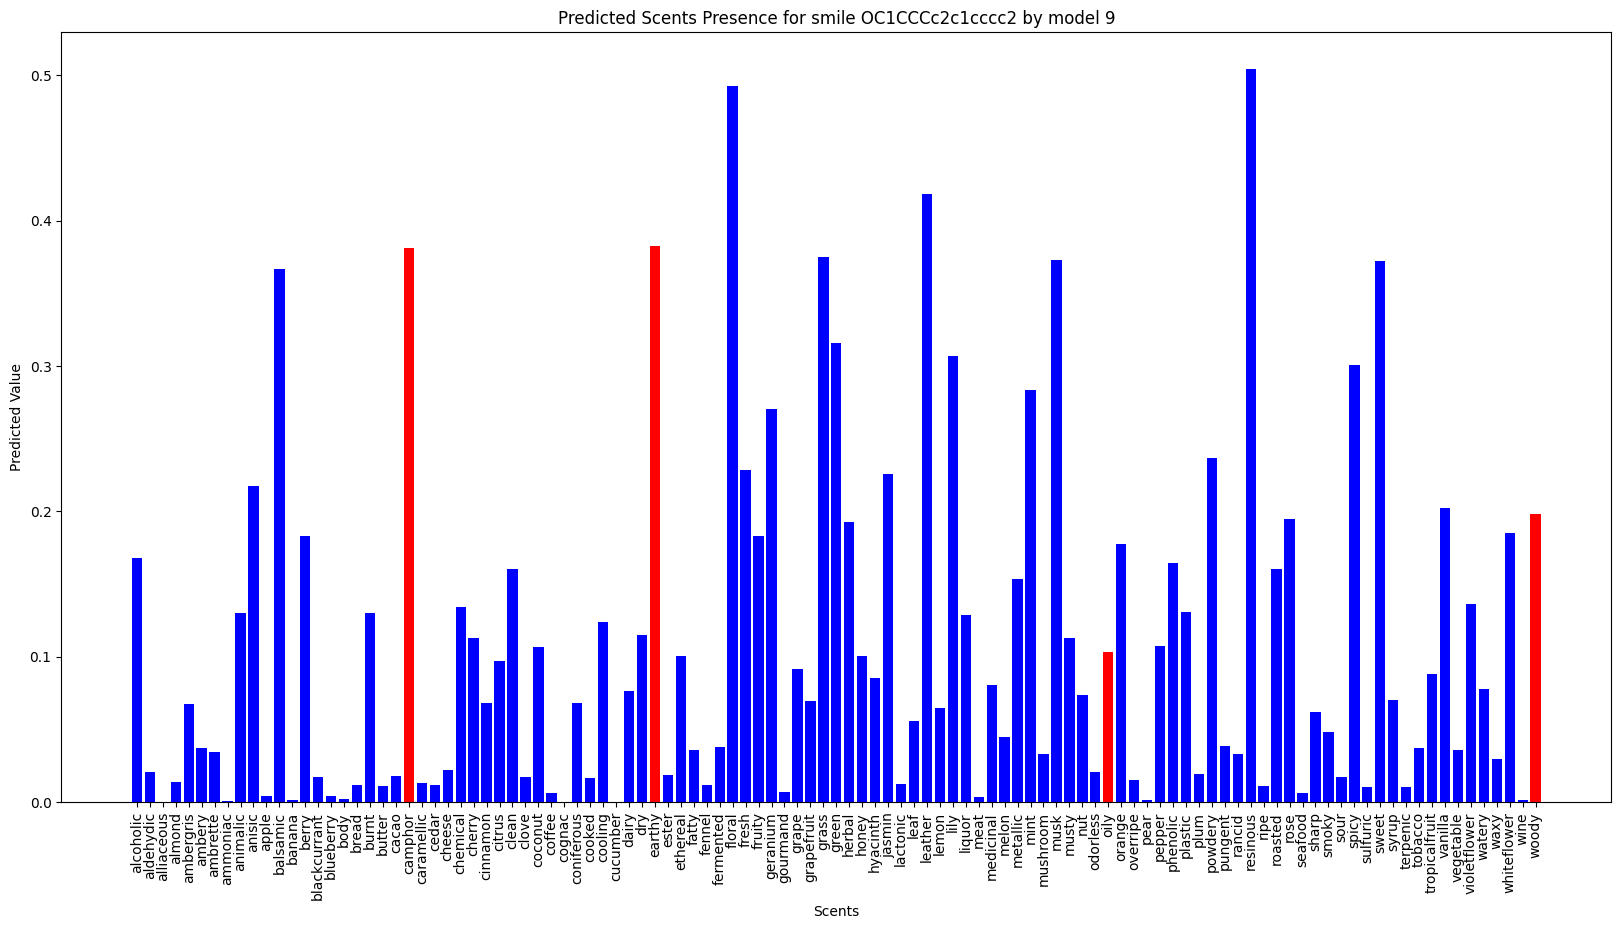

OC1CCCc2c1cccc2
Expected scents: ['camphor', 'earthy', 'oily', 'woody']



In [ ]:
c=0
for model in models:
  c+=1
  print("Model",c)
  count=0
  for i in range(test_inputs.shape[0]):

    count+=1

    print(f"No{i}:")
    output = model.predict( tf.reshape(test_inputs[i], (1, -1)), verbose=0) # generate the output

    # Labels for each scent (replace with actual scent names)
    scents = unique_classes_series

    # Create a bar plot
    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    expected_scents = output_to_scent(test_outputs[i])

    # Plot each bar individually
    for j in range(len(scents)):
        color = 'red' if scents[j] in expected_scents else 'blue'  # Red for real scents, blue otherwise
        plt.bar(scents[j], output[0][j], color=color)

    # Adding labels and title
    plt.xlabel('Scents')
    plt.ylabel('Predicted Value')
    plt.title('Predicted Scents Presence for smile ' + test_smiles[i] + " by model " + str(c))

    # Rotate labels on X-axis for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

    print(test_smiles[i])
    print("Expected scents:",output_to_scent(test_outputs[i]))
    print()

    if count > 5:
      break
  print("===============================================================================================")

## Compute the custom metric, final evaluation

This is a metric that compares each top 3 prediction to the real scents and gives the % of matches between the prediction and the real values. It takes the average for each model. It uses our custom `compare_results` similarity metric.

Higher the value, the better the model performs

In [ ]:
c=0
for model in models:
  c+=1
  # global metric
  sum_similarity = 0

  count = 0
  for i in range(test_inputs.shape[0]):

    #print(f"No {i+1}:")
    #print(test_smiles[i])

    # probability for each scent
    output = model.predict(tf.reshape(test_inputs[i],(1, -1)), verbose=0) # generate the output

    # list of expected scents
    expected_scents = output_to_scent(test_outputs[i])

    # Labels for each scent (replace with actual scent names)
    scents = unique_classes_series

    # top 3 scents of the received output
    top3 = top3_scents(output)

    #print(f"Received smells: {top3} vs {expected_scents}")

    # compute the metric
    similarity = compare_results(top3, expected_scents)

    #print("Similarity:",similarity)

    sum_similarity += similarity

    count += 1

  metric = sum_similarity/count

  #print("======================================================")
  print("Overall similarity for model",c,":", metric)


Overall similarity for model 1 : 0.3932506887052348
Overall similarity for model 2 : 0.382231404958678
Overall similarity for model 3 : 0.3825757575757581
Overall similarity for model 4 : 0.3794765840220389
Overall similarity for model 5 : 0.3753443526170804
Overall similarity for model 6 : 0.37568870523416037
Overall similarity for model 7 : 0.39359504132231476
Overall similarity for model 8 : 0.39221763085399497
Overall similarity for model 9 : 0.3794765840220394
